In [1]:
import pygsti
import numpy as np
from scipy.linalg import expm
from pygsti.circuits import Circuit
from matplotlib import pyplot as plt
from pygsti.processors import QuditProcessorSpec

# target model def

In [2]:
# Gell-Mann matrices
gellmann_matrices = [
    np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]]),
    np.array([[0, 1, 0], [1, 0, 0], [0, 0, 0]]),
    np.array([[0, -1j, 0], [1j, 0, 0], [0, 0, 0]]),
    np.array([[1, 0, 0], [0, -1, 0], [0, 0, 0]]),
    np.array([[0, 0, 1], [0, 0, 0], [1, 0, 0]]),
    np.array([[0, 0, -1j], [0, 0, 0], [1j, 0, 0]]),
    np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0]]),
    np.array([[0, 0, 0], [0, 0, -1j], [0, 1j, 0]]),
    np.array([[1, 0, 0], [0, 1, 0], [0, 0, -2]])
]

gellmann_8_12 = np.array([[-2, 0, 0], [0, 1, 0], [0, 0, 1]])

In [3]:
# unitary models 
# we ignore axis error 
def modelX01(theta, gamma):
    return expm(-(1j/2)*((np.pi/2 + theta)*gellmann_matrices[1] + gamma*gellmann_matrices[8]))

def modelZ01():
    return np.diag([np.exp(-1j*np.pi/4), 1, 1])

def modelZ12():
    return  np.diag([1, 1, np.exp(-1j*np.pi/4)])

X12_gen = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0]])

def modelX12(theta):
    return expm(-(1j/2)*((np.pi/2 + theta)*X12_gen))

def modelCZ(phis):
    return np.diag([1]+[np.exp(-1j*phi) for phi in phis])



In [4]:
X01

NameError: name 'X01' is not defined

In [733]:
Z01

array([[0.70710678-0.70710678j, 0.        +0.j        ,
        0.        +0.j        ],
       [0.        +0.j        , 1.        +0.j        ,
        0.        +0.j        ],
       [0.        +0.j        , 0.        +0.j        ,
        1.        +0.j        ]])

In [734]:
def plot_real_and_imag_parts(mat, title):
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))
    axs[0].imshow(np.real(mat), cmap='viridis', interpolation='nearest')
    axs[0].set_title('Real part')
    axs[1].imshow(np.imag(mat), cmap='viridis', interpolation='nearest')
    axs[1].set_title('Imaginary part')
    fig.suptitle(title)
    # add colorbars
    plt.colorbar(axs[0].imshow(np.real(mat), cmap='viridis', interpolation='nearest'), ax=axs[0])
    plt.colorbar(axs[1].imshow(np.imag(mat), cmap='viridis', interpolation='nearest'), ax=axs[1])
    plt.show()

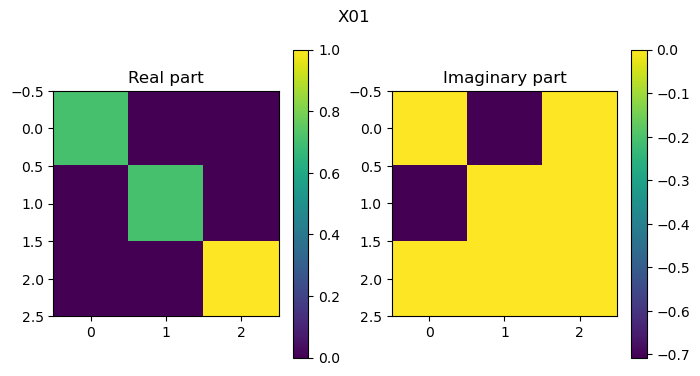

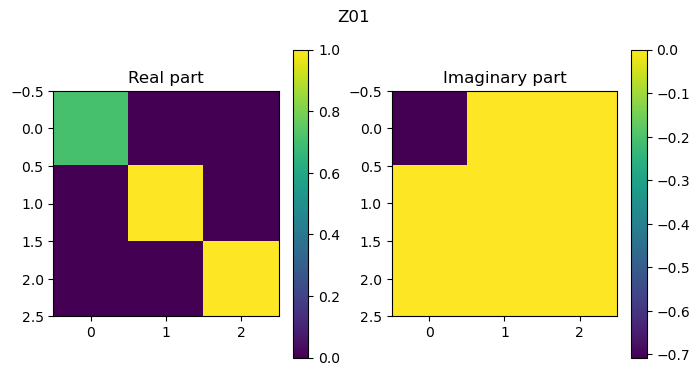

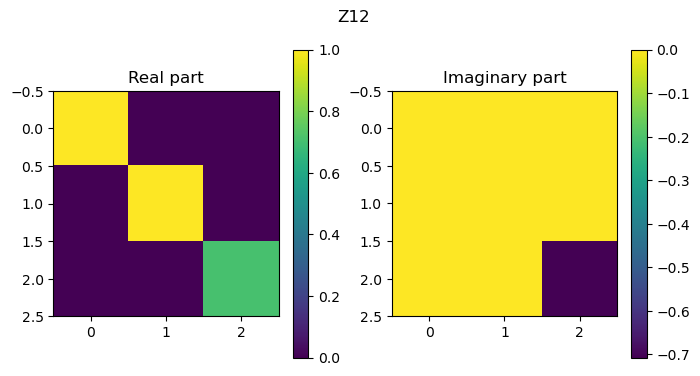

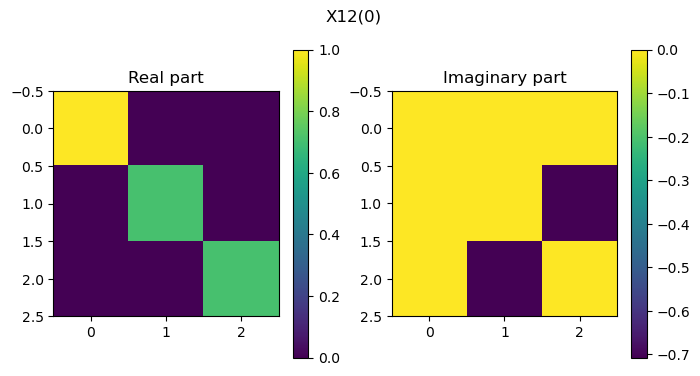

In [735]:
plot_real_and_imag_parts(modelX01(0, 0), 'X01')
plot_real_and_imag_parts(modelZ01(), 'Z01')
plot_real_and_imag_parts(modelZ12(), 'Z12')
plot_real_and_imag_parts(modelX12(0), 'X12(0)')

In [5]:
Z01 = modelZ01()
X01 = modelX01(0, 0)
Z12 = modelZ12()
X12 = modelX12(0)

Y01 = Z01@Z01@X01@Z01
Y12 = Z12@Z12@X12@Z12

plot_real_and_imag_parts(Y01, 'Y01')
plot_real_and_imag_parts(Y12, 'Y12')

NameError: name 'plot_real_and_imag_parts' is not defined

In [6]:
# observe that the inverse of these gates require a Zpi rotation on the pair that is not the target
Gx01_4 = np.linalg.matrix_power(X01, 4)
Gz01_4 = np.linalg.matrix_power(Z01, 4)
Gz12_4 = np.linalg.matrix_power(Z12, 4)
Gx12_4 = np.linalg.matrix_power(X12, 4)

plot_real_and_imag_parts(Gx01_4, 'X01^4')
plot_real_and_imag_parts(Gz01_4, 'Z01^4')
plot_real_and_imag_parts(Gz12_4, 'Z12^4')
plot_real_and_imag_parts(Gx12_4, 'X12^4')

NameError: name 'plot_real_and_imag_parts' is not defined

In [7]:
# observe that the inverse of these gates actually require 8 rotations
Gx01_4_Z12pi = np.linalg.matrix_power(X01, 8)
Gz01_4_Z12pi = np.linalg.matrix_power(Z01, 8)
Gz12_4_Z01pi = np.linalg.matrix_power(Z12, 8) 
Gx12_4_Z01pi = np.linalg.matrix_power(X12, 8)

plot_real_and_imag_parts(Gx01_4_Z12pi, 'Gx01^8')
plot_real_and_imag_parts(Gz01_4_Z12pi, 'Gz01^8')
plot_real_and_imag_parts(Gz12_4_Z01pi, 'Gz12^8')
plot_real_and_imag_parts(Gx12_4_Z01pi, 'Gx12^8')

NameError: name 'plot_real_and_imag_parts' is not defined

In [8]:
rho0vec = np.asarray([1, 0, 0])
Y01@Y12@X01@X01@rho0vec

array([-1.66533454e-16+0.5j       , -8.32667268e-17-0.5j       ,
       -1.57009246e-16+0.70710678j])

In [9]:
rho0vec = np.asarray([1, 0, 0])
Y01@X12@X12@X12@X01@X01@rho0vec

array([ 0.00000000e+00-0.5j, -8.32667268e-17+0.5j, -7.07106781e-01+0.j ])

In [10]:
rho0vec = np.asarray([1, 0, 0])
rho00= np.kron(rho0vec, rho0vec)

E0vec = np.asarray([1, 0, 0])
E1vec = np.asarray([0, 1, 0])
E2vec = np.asarray([0, 0, 1])

E00 = np.kron(E0vec, E0vec)
E01 = np.kron(E0vec, E1vec)
E02 = np.kron(E0vec, E2vec)
E10 = np.kron(E1vec, E0vec)
E11 = np.kron(E1vec, E1vec)
E12 = np.kron(E1vec, E2vec)
E20 = np.kron(E2vec, E0vec)
E21 = np.kron(E2vec, E1vec)
E22 = np.kron(E2vec, E2vec)

povm_dict = {'00' : E00, '01' : E01, '02' : E02, '10' : E10, '11' : E11, '12' : E12, '20' : E20, '21' : E21, '22' : E22}

phis_target = np.array([0, 0, 0, -2*np.pi/3, -4*np.pi/3, 0, -2*np.pi/3, -4*np.pi/3])
gate_names = ['Gx_01_Q1', 'Gx_12_Q1', 'Gz_01_Q1', 'Gz_12_Q1', 'Gx_01_Q2', 'Gx_12_Q2', 'Gz_01_Q2', 'Gz_12_Q2', 'Gcz']
target_unitary_mapping = {
    'Gx_01_Q1': modelX01(0,0), 
    'Gx_12_Q1': modelX12(0), 
    'Gz_01_Q1': modelZ01(), 
    'Gz_12_Q1': modelZ12(),
    'Gx_01_Q2': modelX01(0,0),
    'Gx_12_Q2': modelX12(0),
    'Gz_01_Q2': modelZ01(),
    'Gz_12_Q2': modelZ12(),
    'Gcz': modelCZ(phis_target)
}
availability = {
    'Gx_01_Q1': [('Q1', )], 
    'Gx_12_Q1': [('Q1', )], 
    'Gz_01_Q1': [('Q1', )], 
    'Gz_12_Q1': [('Q1', )], 
    'Gx_01_Q2': [('Q2', )], 
    'Gx_12_Q2': [('Q2', )], 
    'Gz_01_Q2': [('Q2', )], 
    'Gz_12_Q2': [('Q2', )], 
    'Gcz': [('Q1', 'Q2')]
}



pspec = QuditProcessorSpec(['Q1', 'Q2'], qudit_udims=[3, 3], gate_names=gate_names,
                    nonstd_gate_unitaries=target_unitary_mapping,
                    prep_names = ['rho0'], povm_names = ['Mdefault'], 
                    nonstd_preps = {'rho0': rho00}, nonstd_povms = {'Mdefault': povm_dict}, 
                    availability=availability
                    )

In [11]:
target_model = pygsti.models.modelconstruction.create_explicit_model(pspec, 
                                                              ideal_gate_type='full TP', 
                                                              ideal_spam_type='full pure', 
                                                              basis='gm')

# Circuit construction

In [12]:
prep_dict = {
    '00' : ([]), 
}

meas_dict = {
    '00' : ([]),
}

gate_dict = {
    'G_CZ' : ([('Gcz', 'Q1', 'Q2')]),
    'G_X01' : ([('G_X01(Q1)', 'Q1')]),
    'G_Z01' : ([('G_Z01(Q1)', 'Q1')]),
    'G_X12' : ([('G_X12(Q1)', 'Q1')]),
    'G_Z12' : ([('G_Z12(Q1)', 'Q1')]),
    'G_X01' : ([('G_X01(Q2)', 'Q2')]),
    'G_Z01' : ([('G_Z01(Q2)', 'Q2')]),
    'G_X12' : ([('G_X12(Q2)', 'Q2')]),
    'G_Z12' : ([('G_Z12(Q2)', 'Q2')]),
}

def make_circuit(gate, prep_label, meas_label, depth):
    prep_circ = prep_dict[prep_label]
    meas_circ = meas_dict[meas_label]
    return Circuit(['rho0'] + prep_circ + [gate]*depth + meas_circ + ['Mdefault'], line_labels=['Q1', 'Q2'])

In [13]:
# simulate a circuit under the target model 

circ = make_circuit(('Gx_01_Q2', 'Q2'), '00', '00', 2)
print(circ)

target_model.probabilities(circ)

Qubit Q1 ---|rho0|-|        |-|        |-|Mdefault|---
Qubit Q2 ---|rho0|-|Gx_01_Q2|-|Gx_01_Q2|-|Mdefault|---



OutcomeLabelDict([(('00',), -1.6479873021779667e-16),
                  (('01',), 0.9999999999999997),
                  (('02',), -1.4051260155412137e-16),
                  (('10',), -1.0581813203458523e-16),
                  (('11',), -3.9898639947466563e-17),
                  (('12',), -2.480654570646834e-16),
                  (('20',), -1.0928757898653885e-16),
                  (('21',), -1.43982048506075e-16),
                  (('22',), -1.6653345369377348e-16)])

# Error model definitions

In [14]:
def parse_error_vector(x):
    info = {
        'single_qutrit': {
            'Q1': {
                'X01' : x[0],
                'phase': x[1],
                'X12' : x[2], 
            },
            'Q2': {
                'X01' : x[3],
                'phase': x[4],
                'X12' : x[5],
            }
        },
        'two_qutrit': {
            'phi1': x[6],
            'phi2': x[7],
            'phi3': x[8],
            'phi4': x[9],
            'phi5': x[10],
            'phi6': x[11],
            'phi7': x[12],
            'phi8': x[13]
        }  
    }
    return info

def random_error_vector(single_qutrit_rates, two_qutrit_rates):
    q1_vec = np.random.multivariate_normal(np.zeros(3), np.eye(3)*single_qutrit_rates)
    q2_vec = np.random.multivariate_normal(np.zeros(3), np.eye(3)*single_qutrit_rates)
    two_qubit_vec = np.random.multivariate_normal(np.zeros(8), np.eye(8)*two_qutrit_rates)
    return np.concatenate((q1_vec, q2_vec, two_qubit_vec))


In [15]:
from pygsti.tools import unitary_to_std_process_mx
from pygsti.modelmembers.operations import EmbeddedOp, FullArbitraryOp

In [16]:
from pygsti.baseobjs import ExplicitStateSpace
from pygsti.models import ExplicitOpModel
from pygsti.models.modelconstruction import create_spam_vector
from pygsti.modelmembers.povms import UnconstrainedPOVM, FullPOVMEffect
from pygsti.modelmembers.states import FullState
from pygsti.tools import change_basis
from pygsti.baseobjs import Basis


def make_model(error_vector, single_qutrit_depol, two_qutrit_depol):
    
    # Parse error vector
    errors = parse_error_vector(error_vector)
    x01_Q1 = errors['single_qutrit']['Q1']['X01']
    x12_Q1 = errors['single_qutrit']['Q1']['X12']
    x01_Q2 = errors['single_qutrit']['Q2']['X01']
    x12_Q2 = errors['single_qutrit']['Q2']['X12']
    
    phase_Q1 = errors['single_qutrit']['Q1']['phase']
    phase_Q2 = errors['single_qutrit']['Q2']['phase']

    phi1 = errors['two_qutrit']['phi1']
    phi2 = errors['two_qutrit']['phi2']
    phi3 = errors['two_qutrit']['phi3']
    phi4 = errors['two_qutrit']['phi4']
    phi5 = errors['two_qutrit']['phi5']
    phi6 = errors['two_qutrit']['phi6']
    phi7 = errors['two_qutrit']['phi7']
    phi8 = errors['two_qutrit']['phi8']
    phis = [phi1, phi2, phi3, phi4, phi5, phi6, phi7, phi8]

    # Define single qutrit unitaries
    X01_Q1_unitary = modelX01(x01_Q1, phase_Q1)
    Z01_Q1_unitary = modelZ01()
    X12_Q1_unitary = modelX12(x12_Q1)
    Z12_Q1_unitary = modelZ12()

    X01_Q2_unitary = modelX01(x01_Q2, phase_Q2)
    Z01_Q2_unitary = modelZ01()
    X12_Q2_unitary = modelX12(x12_Q2)
    Z12_Q2_unitary = modelZ12()

    # Define two qutrit unitary
    phis_target = np.array([0, 0, 0, -2*np.pi/3, -4*np.pi/3, 0, -2*np.pi/3, -4*np.pi/3])
    CZ_unitary = modelCZ(np.array(phis) + phis_target)

    target_unitary_mapping = {
        'Gx_01_Q1': X01_Q1_unitary,
        'Gx_12_Q1': X12_Q1_unitary,
        'Gz_01_Q1': Z01_Q1_unitary,
        'Gz_12_Q1': Z12_Q1_unitary,
        'Gx_01_Q2': X01_Q2_unitary,
        'Gx_12_Q2': X12_Q2_unitary,
        'Gz_01_Q2': Z01_Q2_unitary,
        'Gz_12_Q2': Z12_Q2_unitary,
        'Gcz': CZ_unitary
    }

    rho0vec = np.asarray([1, 0, 0])
    rho00= np.kron(rho0vec, rho0vec)

    E0vec = np.asarray([1, 0, 0])
    E1vec = np.asarray([0, 1, 0])
    E2vec = np.asarray([0, 0, 1])

    E00 = np.kron(E0vec, E0vec)
    E01 = np.kron(E0vec, E1vec)
    E02 = np.kron(E0vec, E2vec)
    E10 = np.kron(E1vec, E0vec)
    E11 = np.kron(E1vec, E1vec)
    E12 = np.kron(E1vec, E2vec)
    E20 = np.kron(E2vec, E0vec)
    E21 = np.kron(E2vec, E1vec)
    E22 = np.kron(E2vec, E2vec)

    povm_dict = {'00' : E00, '01' : E01, '02' : E02, '10' : E10, '11' : E11, '12' : E12, '20' : E20, '21' : E21, '22' : E22}

    
    gate_names = ['Gx_01_Q1', 'Gx_12_Q1', 'Gz_01_Q1', 'Gz_12_Q1', 'Gx_01_Q2', 'Gx_12_Q2', 'Gz_01_Q2', 'Gz_12_Q2', 'Gcz']
    availability = {
        'Gx_01_Q1': [('Q1', )], 
        'Gx_12_Q1': [('Q1', )], 
        'Gz_01_Q1': [('Q1', )], 
        'Gz_12_Q1': [('Q1', )], 
        'Gx_01_Q2': [('Q2', )], 
        'Gx_12_Q2': [('Q2', )], 
        'Gz_01_Q2': [('Q2', )], 
        'Gz_12_Q2': [('Q2', )], 
        'Gcz': [('Q1', 'Q2')]
    }

    # define the processor spec
    pspec = QuditProcessorSpec(['Q1', 'Q2'], qudit_udims=[3, 3], gate_names=gate_names,
                    nonstd_gate_unitaries=target_unitary_mapping,
                    prep_names = ['rho0'], povm_names = ['Mdefault'],
                    nonstd_preps = {'rho0': rho00}, nonstd_povms = {'Mdefault': povm_dict},
                    availability=availability
                    )
    model = pygsti.models.modelconstruction.create_explicit_model(pspec,ideal_gate_type='full TP', ideal_spam_type='full pure', basis='gm')

    # add depolarizing noise
    model.operations[('Gx_01_Q1', 'Q1')].depolarize(single_qutrit_depol)
    model.operations[('Gz_01_Q1', 'Q1')].depolarize(single_qutrit_depol)
    model.operations[('Gx_12_Q1', 'Q1')].depolarize(single_qutrit_depol)
    model.operations[('Gz_12_Q1', 'Q1')].depolarize(single_qutrit_depol)
    model.operations[('Gx_01_Q2', 'Q2')].depolarize(single_qutrit_depol)
    model.operations[('Gz_01_Q2', 'Q2')].depolarize(single_qutrit_depol)
    model.operations[('Gx_12_Q2', 'Q2')].depolarize(single_qutrit_depol)
    model.operations[('Gz_12_Q2', 'Q2')].depolarize(single_qutrit_depol)
    model.operations[('Gcz', 'Q1', 'Q2')].depolarize(two_qutrit_depol)

    return model


    # # Define single qutrit gates
    # X01_Q1_unitary = unitary_to_std_process_mx(modelX01(x01_Q1, phase01_Q1))
    # Z01_Q1_unitary = unitary_to_std_process_mx(modelZ01())
    # X12_Q1_unitary = unitary_to_std_process_mx(modelX12(x12_Q1, phase12_Q1))
    # Z12_Q1_unitary = unitary_to_std_process_mx(modelZ12())

    # X01_Q1_gate = FullArbitraryOp(X01_Q1_unitary, evotype='densitymx', basis='gm')
    # Z01_Q1_gate = FullArbitraryOp(Z01_Q1_unitary, evotype='densitymx', basis='gm')
    # X12_Q1_gate = FullArbitraryOp(X12_Q1_unitary, evotype='densitymx', basis='gm')
    # Z12_Q1_gate = FullArbitraryOp(Z12_Q1_unitary, evotype='densitymx', basis='gm')

    # X01_Q1_gate.depolarize(single_qutrit_depol)
    # Z01_Q1_gate.depolarize(single_qutrit_depol)
    # X12_Q1_gate.depolarize(single_qutrit_depol)
    # Z12_Q1_gate.depolarize(single_qutrit_depol)

    # X01_Q2_unitary = unitary_to_std_process_mx(modelX01(x01_Q2, phase01_Q2))
    # Z01_Q2_unitary = unitary_to_st_inv + circ_X12_Q1_inv + [('Gx_01_Q1', 'Q1')]*6d_process_mx(modelZ01())
    # X12_Q2_unitary = unitary_to_std_process_mx(modelX12(x12_Q2, phase12_Q2))
    # Z12_Q2_unitary = unitary_to_std_process_mx(modelZ12())


    # X01_Q2_gate = FullArbitraryOp(X01_Q1_unitary, evotype='densitymx', basis='gm')
    # Z01_Q2_gate = FullArbitraryOp(Z01_Q1_unitary, evotype='densitymx', basis='gm')
    # X12_Q2_gate = FullArbitraryOp(X12_Q1_unitary, evotype='densitymx', basis='gm')
    # Z12_Q2_gate = FullArbitraryOp(Z12_Q1_unitary, evotype='densitymx', basis='gm')
                               
    # X01_Q2_gate.depolarize(single_qutrit_depol)
    # Z01_Q2_gate.depolarize(single_qutrit_depol)
    # X12_Q2_gate.depolarize(single_qutrit_depol)
    # Z12_Q2_gate.depolarize(single_qutrit_depol)

    # # Define two qutrit gates
    # CZ_unitary = unitary_to_std_process_mx(modelCZ(phis))
    # CZ_mat = change_basis(CZ_unitary, 'std', 'gm')
    # CZ = FullArbitraryOp(CZ_mat, evotype='densitymx', basis='gm')
    # CZ.depolarize(two_qutrit_depol)

    # # Add gates to model
    # joint_state_space = model.state_space
    # model.operations[('Gx_01', 'Q1')] = X01_Q1_gate
    # model.operations[('Gz_01', 'Q1')] = Z01_Q1_gate
    # model.operations[('Gx_12', 'Q1')] = X12_Q1_gate
    # model.operations[('Gz_12', 'Q1')] = Z12_Q1_gate
    # model.operations[('Gx_01', 'Q2')] = X01_Q2_gate
    # model.operations[('Gz_01', 'Q2')] = Z01_Q2_gate
    # model.operations[('Gx_12', 'Q2')] = X12_Q2_gate
    # model.operations[('Gz_12', 'Q2')] = Z12_Q2_gate

    # model.operations['Gcz'] = CZ

    # return model

In [17]:
def plot_outcome_dist_2qt(outcomes, target=None, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    # keys a
    keys = ['00', '01', '02', '10', '11', '12', '20', '21', '22']
    vals = np.zeros(9)
    if target is not None:
        tag_vals = np.zeros(9)
        for idx, key in enumerate(keys):
            if key in target:
                tag_vals[idx] = target[key]
    for idx, key in enumerate(keys):
        if key in outcomes:
            vals[idx] = outcomes[key]
    if target is None:
        ax.bar(keys, vals)
    else:
        ax.bar(keys, vals, label='Simulated', alpha=0.5)
        ax.bar(keys, tag_vals, label='Target', alpha=0.5)
        ax.legend()

Qubit Q1 ---|rho0|-|Gx_01_Q1|-|Gx_01_Q1|-|Gx_01_Q1|-|Gx_01_Q1|-|Gx_01_Q1|-|Gx_01_Q1|-|Gx_01_Q1|-|Gx_01_Q1|-|Gx_01_Q1|-|Gx_01_Q1|-|Gx_01_Q1|-|Mdefault|---
Qubit Q2 ---|rho0|-|        |-|        |-|        |-|        |-|        |-|        |-|        |-|        |-|        |-|        |-|        |-|Mdefault|---

OutcomeLabelDict([(('00',), 0.2927006537218351), (('01',), 0.07624326710111083), (('02',), 0.0762432671011109), (('10',), 0.17359647657038657), (('11',), 0.07624326710111076), (('12',), 0.07624326710111087), (('20',), 0.07624326710111082), (('21',), 0.0762432671011107), (('22',), 0.07624326710111076)])


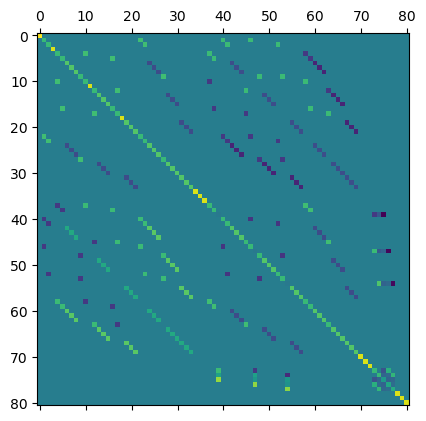

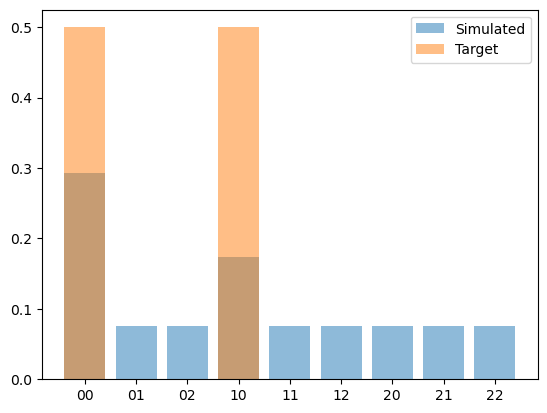

In [18]:
x = random_error_vector(0.1, 0.1)
model = make_model(x, 0.1, 0.1)
plt.matshow(model[(('Gx_01_Q1', 'Q1'))].to_dense().real)
circ = make_circuit(('Gx_01_Q1', 'Q1'), '00', '00', 11)
print(circ)
probs = model.probabilities(circ)
target_probs = target_model.probabilities(circ)
print(probs)
plot_outcome_dist_2qt(probs, target_probs)

# Single qutrit RPE

In [19]:
circ_Y01_Q1 = [('Gz_01_Q1', 'Q1')] + [('Gx_01_Q1', 'Q1')] + [('Gz_01_Q1', 'Q1')]*3
circ_Y12_Q1 = [('Gz_12_Q1', 'Q1')] + [('Gx_12_Q1', 'Q1')] + [('Gz_12_Q1', 'Q1')]*3

circ_X01_Q1_inv = [('Gx_01_Q1', 'Q1')]*7
circ_X12_Q1_inv = [('Gx_12_Q1', 'Q1')]*7
circ_Y01_Q1_inv = circ_Y01_Q1*7
circ_Y12_Q1_inv = circ_Y12_Q1*7

fiducial_prep_dict = {
    'id' : [],
    'X01_Q1_cos_prep': [], 
    'X01_Q1_sin_prep': [], 
    'X12_Q1_cos_prep': [('Gx_01_Q1', 'Q1'), ('Gx_01_Q1', 'Q1')],
    'X12_Q1_sin_prep': [('Gx_01_Q1', 'Q1'), ('Gx_01_Q1', 'Q1')],
    'phase_Q1_cos_prep': [('Gx_01_Q1', 'Q1'), ('Gx_01_Q1', 'Q1')] + [('Gx_12_Q1', 'Q1')] + circ_Y01_Q1,
    'phase_Q1_sin_prep': [('Gx_01_Q1', 'Q1'), ('Gx_01_Q1', 'Q1')] + [('Gx_12_Q1', 'Q1')] + circ_Y01_Q1,
}

fiducial_meas_dict = {
    'id' : [],
    'X01_Q1_cos_meas': [], 
    'X01_Q1_sin_meas': [('Gx_01_Q1', 'Q1'),],
    'X12_Q1_cos_meas': [],
    'X12_Q1_sin_meas': [('Gx_12_Q1', 'Q1'),],
    'phase_Q1_cos_meas': circ_Y01_Q1_inv + circ_X12_Q1_inv + [('Gx_01_Q1', 'Q1')]*6,
    'phase_Q1_sin_meas': circ_Y01_Q1_inv + circ_Y12_Q1_inv + [('Gx_01_Q1', 'Q1')]*6, 
}

In [20]:
def make_rpe_circuit(gate, prep_label, meas_label, depth):
    prep_circ = fiducial_prep_dict[prep_label]
    meas_circ = fiducial_meas_dict[meas_label]
    return Circuit(['rho0'] + prep_circ + gate*depth + meas_circ + ['Mdefault'], line_labels=['Q1', 'Q2'])

In [21]:
circ = fiducial_prep_dict['phase_Q1_cos_prep'] + ['Mdefault']
print(circ)
target_model.probabilities(circ)


[('Gx_01_Q1', 'Q1'), ('Gx_01_Q1', 'Q1'), ('Gx_12_Q1', 'Q1'), ('Gz_01_Q1', 'Q1'), ('Gx_01_Q1', 'Q1'), ('Gz_01_Q1', 'Q1'), ('Gz_01_Q1', 'Q1'), ('Gz_01_Q1', 'Q1'), 'Mdefault']


OutcomeLabelDict([(('00',), 0.2499999999999995),
                  (('01',), -2.0296264668928643e-16),
                  (('02',), -1.5439038936193583e-16),
                  (('10',), 0.24999999999999967),
                  (('11',), -9.540979117872439e-17),
                  (('12',), -2.1337098754514727e-16),
                  (('20',), 0.49999999999999933),
                  (('21',), -3.4867941867133823e-16),
                  (('22',), -2.0816681711721685e-16)])

In [22]:
circ = fiducial_prep_dict['phase_Q1_cos_prep'] + fiducial_meas_dict['phase_Q1_cos_meas'] +['Mdefault']
print(circ)
print(target_model.probabilities(circ))
print(model.probabilities(circ))


[('Gx_01_Q1', 'Q1'), ('Gx_01_Q1', 'Q1'), ('Gx_12_Q1', 'Q1'), ('Gz_01_Q1', 'Q1'), ('Gx_01_Q1', 'Q1'), ('Gz_01_Q1', 'Q1'), ('Gz_01_Q1', 'Q1'), ('Gz_01_Q1', 'Q1'), ('Gz_01_Q1', 'Q1'), ('Gx_01_Q1', 'Q1'), ('Gz_01_Q1', 'Q1'), ('Gz_01_Q1', 'Q1'), ('Gz_01_Q1', 'Q1'), ('Gz_01_Q1', 'Q1'), ('Gx_01_Q1', 'Q1'), ('Gz_01_Q1', 'Q1'), ('Gz_01_Q1', 'Q1'), ('Gz_01_Q1', 'Q1'), ('Gz_01_Q1', 'Q1'), ('Gx_01_Q1', 'Q1'), ('Gz_01_Q1', 'Q1'), ('Gz_01_Q1', 'Q1'), ('Gz_01_Q1', 'Q1'), ('Gz_01_Q1', 'Q1'), ('Gx_01_Q1', 'Q1'), ('Gz_01_Q1', 'Q1'), ('Gz_01_Q1', 'Q1'), ('Gz_01_Q1', 'Q1'), ('Gz_01_Q1', 'Q1'), ('Gx_01_Q1', 'Q1'), ('Gz_01_Q1', 'Q1'), ('Gz_01_Q1', 'Q1'), ('Gz_01_Q1', 'Q1'), ('Gz_01_Q1', 'Q1'), ('Gx_01_Q1', 'Q1'), ('Gz_01_Q1', 'Q1'), ('Gz_01_Q1', 'Q1'), ('Gz_01_Q1', 'Q1'), ('Gz_01_Q1', 'Q1'), ('Gx_01_Q1', 'Q1'), ('Gz_01_Q1', 'Q1'), ('Gz_01_Q1', 'Q1'), ('Gz_01_Q1', 'Q1'), ('Gx_12_Q1', 'Q1'), ('Gx_12_Q1', 'Q1'), ('Gx_12_Q1', 'Q1'), ('Gx_12_Q1', 'Q1'), ('Gx_12_Q1', 'Q1'), ('Gx_12_Q1', 'Q1'), ('Gx_12_Q1', 'Q1'),

In [23]:
def make_single_qutrit_rpe_edesign_Q1(depths):
    circuits = {
        'X01' : {'cos': [], 'sin': []},
        'X01' : {'cos': [], 'sin': []},
        'X12' : {'cos': [], 'sin': []},
        'X12' : {'cos': [], 'sin': []},
        'phase' : {'cos': [], 'sin': []},
        'phase' : {'cos': [], 'sin': []},
    }
    for depth in depths:
        circuits['X01']['cos'].append(make_rpe_circuit([('Gx_01_Q1', 'Q1')], 'X01_Q1_cos_prep', 'X01_Q1_cos_meas', depth))
        circuits['X01']['sin'].append(make_rpe_circuit([('Gx_01_Q1', 'Q1')], 'X01_Q1_sin_prep', 'X01_Q1_sin_meas', depth))
        circuits['X12']['cos'].append(make_rpe_circuit([('Gx_12_Q1', 'Q1')], 'X12_Q1_cos_prep', 'X12_Q1_cos_meas', depth))
        circuits['X12']['sin'].append(make_rpe_circuit([('Gx_12_Q1', 'Q1')], 'X12_Q1_sin_prep', 'X12_Q1_sin_meas', depth))
        circuits['phase']['cos'].append(make_rpe_circuit([('Gx_01_Q1', 'Q1')]*8, 'phase_Q1_cos_prep', 'phase_Q1_cos_meas', depth))
        circuits['phase']['sin'].append(make_rpe_circuit([('Gx_01_Q1', 'Q1')]*8, 'phase_Q1_sin_prep', 'phase_Q1_sin_meas', depth))
    return circuits
        
def edesign_to_circuit_list(edesign):
    circuits = []
    for etype in edesign.keys():
        for mtype in edesign[etype].keys():
            for circuit in edesign[etype][mtype]:
                circuits.append(circuit)
    return pygsti.tools.remove_duplicates(circuits)


In [24]:
import pygsti

In [25]:
from quapack.pyRPE import RobustPhaseEstimation
from quapack.pyRPE.quantum import Q as _rpeQ

def estimate_phase_from_dataset(ds, cos_circs, cos_outcome0s, cos_outcome1s, sin_circs, sin_outcome0s, sin_outcome1s, depths):
    experiment = _rpeQ()
    for idx, d in enumerate(depths):
        if d == 0:
            continue
        cos_0_counts = sum([ds[cos_circs[idx]].counts[ci] for ci in cos_outcome0s])
        cos_1_counts = sum([ds[cos_circs[idx]].counts[ci] for ci in cos_outcome1s])
        sin_0_counts = sum([ds[sin_circs[idx]].counts[ci] for ci in sin_outcome0s])
        sin_1_counts = sum([ds[sin_circs[idx]].counts[ci] for ci in sin_outcome1s])
        experiment.process_cos(d, (int(cos_0_counts), int(cos_1_counts)))
        experiment.process_sin(d, (int(sin_0_counts), int(sin_1_counts)))
    analysis = RobustPhaseEstimation(experiment)
    last_good_generation = analysis.check_unif_local(historical=True)
    estimates = analysis.angle_estimates
    return estimates, last_good_generation

In [26]:
x = random_error_vector(0.001, 0.001)
model = make_model(x, 0.00, 0.00)
depths = [2**i for i in range(10)]
edesign = make_single_qutrit_rpe_edesign_Q1(depths)
circ_list = edesign_to_circuit_list(edesign)
ds = pygsti.data.simulate_data(model, circ_list, num_samples=1000, seed=2021)

In [27]:
def rectify_phase (phase):
    """for the interval [-pi, pi]"""
    return (phase + np.pi) % (2*np.pi) - np.pi

In [28]:
# x01 overrot
phase_estimates, lgg = estimate_phase_from_dataset(ds, edesign['X01']['cos'], ['00'], ['10'], edesign['X01']['sin'], ['00'], ['10'], depths)
last_good_x01_q1_phase = phase_estimates[lgg]
phase_error = -last_good_x01_q1_phase - np.pi/2
rectified_phase_error = rectify_phase(phase_error)
x01_q1_overrot_estimate = rectified_phase_error
print(rectified_phase_error, lgg)

0.04006521321337875 9


In [29]:
# x12 overrot
phase_estimates, lgg = estimate_phase_from_dataset(ds, edesign['X12']['cos'], ['10'], ['20'], edesign['X12']['sin'], ['10'], ['20'], depths)
print(phase_estimates)
last_good_x12_q1_phase = phase_estimates[lgg]
phase_error = -last_good_x12_q1_phase - np.pi/2
rectified_phase_error = rectify_phase(phase_error)
x12_q1_overrot_estimate = rectified_phase_error
print(x12_q1_overrot_estimate, lgg)

[4.74644395 4.72993443 4.72416562 4.72550515 4.72396164 4.72458098
 4.72456217 4.72515384 4.72469997 4.72472532]
-0.012336340494266018 9


In [30]:
# phase error
phase_estimates, lgg = estimate_phase_from_dataset(ds, edesign['phase']['cos'], ['00'], ['20'], edesign['phase']['sin'], ['00'], ['20'], depths)
last_good_phase_raw = phase_estimates[lgg]
last_good_phase_rectified = rectify_phase(last_good_phase_raw)
phase_error_estimate = (-last_good_phase_rectified + 4*x01_q1_overrot_estimate)/12
print(phase_error_estimate, lgg)



0.033758862399463574 4


In [31]:
x

array([ 0.04012011,  0.03047368, -0.01238606, -0.03331331,  0.02962584,
        0.05804561, -0.00840996, -0.03594707,  0.03221086,  0.06293233,
        0.00958218, -0.03657709,  0.01220092,  0.00803686])

In [32]:
def plot_edesign_probability_from_model_and_target(edesign, depths, model, target_model):
    for etype in edesign.keys():
        fig, ax = plt.subplots(2, len(depths), figsize=(25, 10))
        for m_idx, mtype in enumerate(edesign[etype].keys()):
            for depth_idx, circuit in enumerate(edesign[etype][mtype]):
                probs = model.probabilities(circuit)
                target_probs = target_model.probabilities(circuit)
                plot_outcome_dist_2qt(probs, target_probs, ax[m_idx, depth_idx])
                ax[m_idx, depth_idx].set_title(f'{etype} {mtype} depth {depths[depth_idx]}')
        plt.tight_layout()
        plt.show()
        plt.figure()

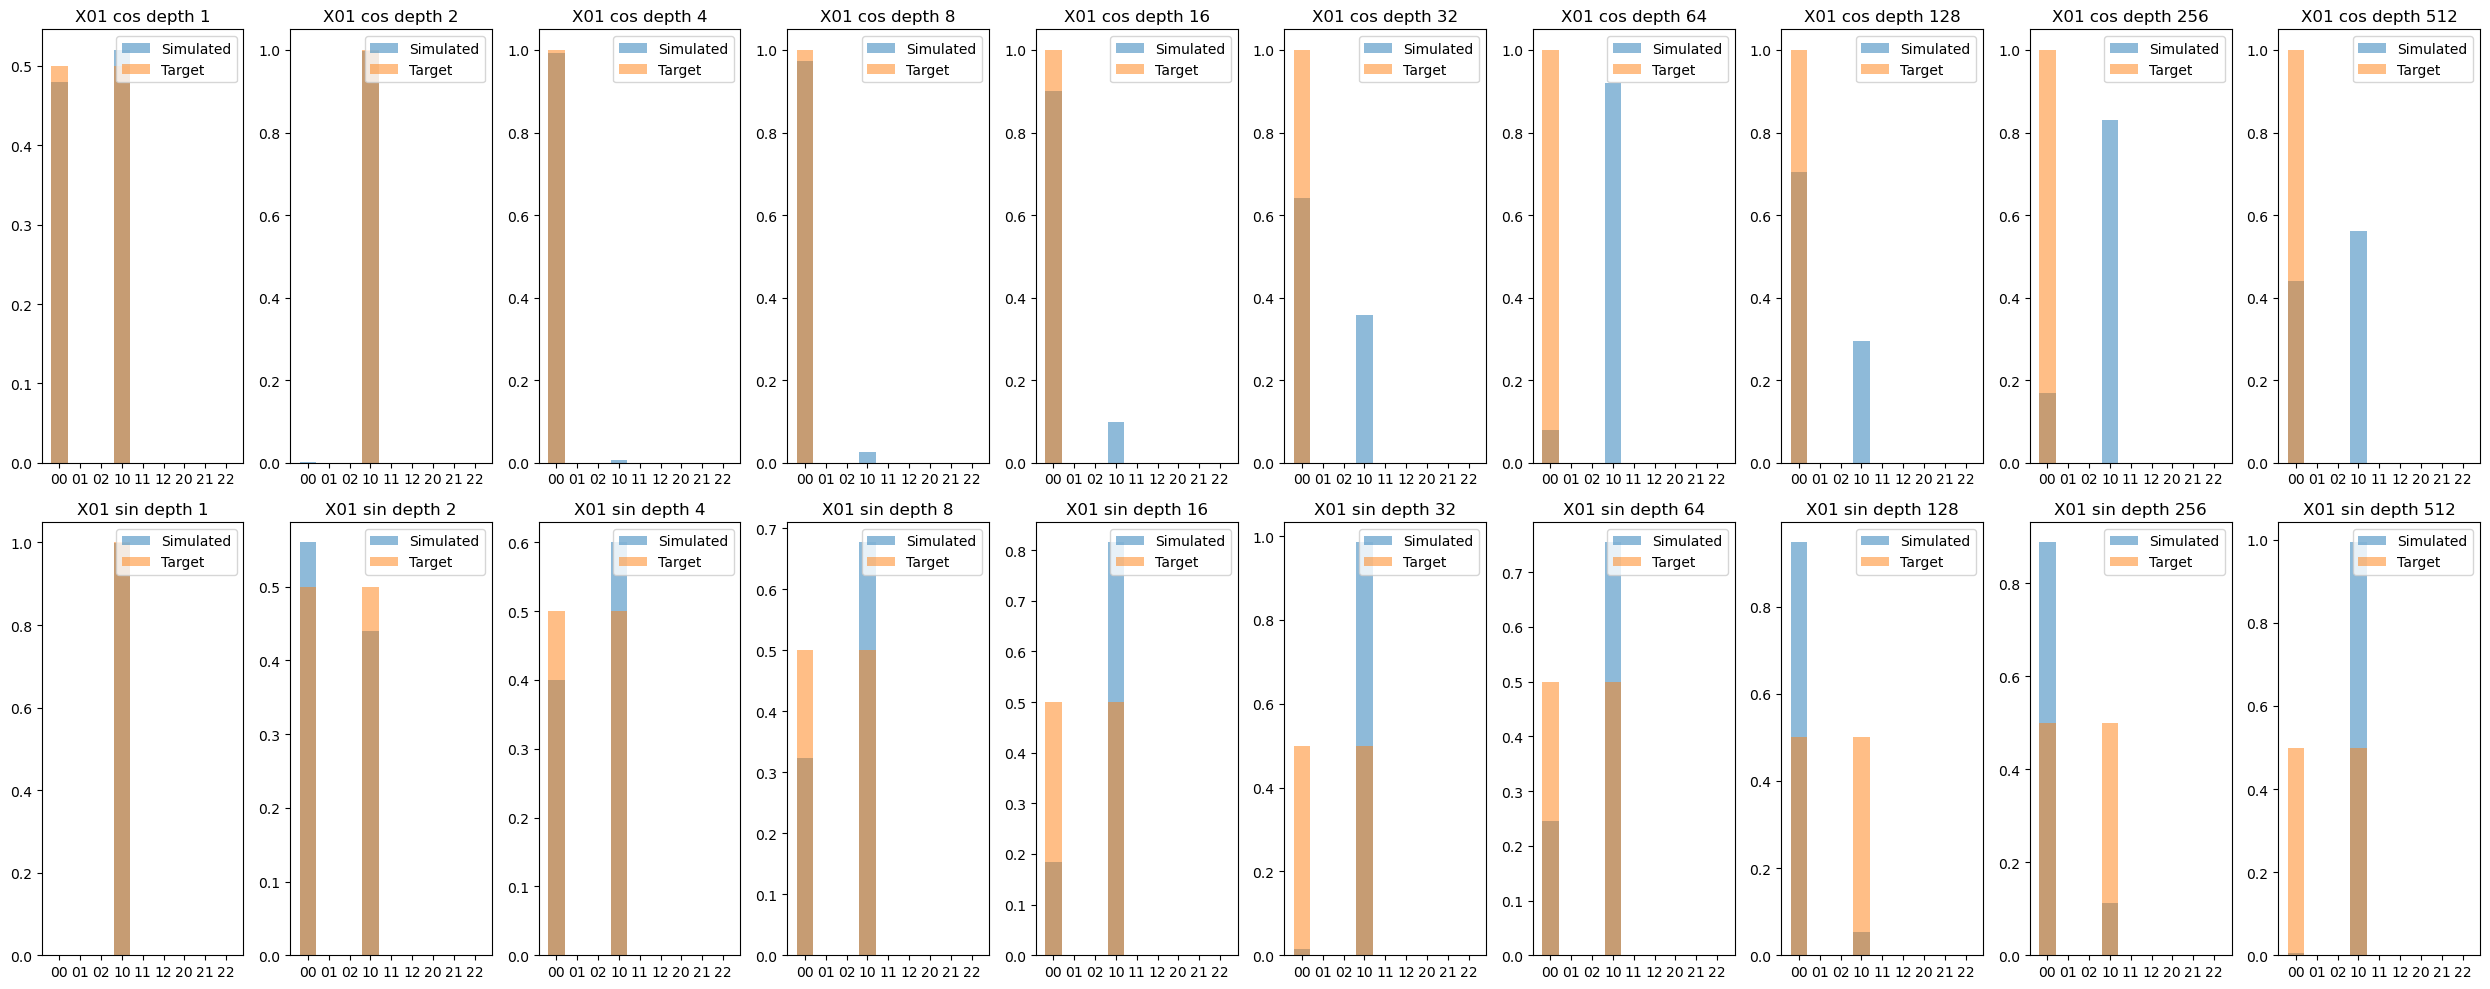

<Figure size 640x480 with 0 Axes>

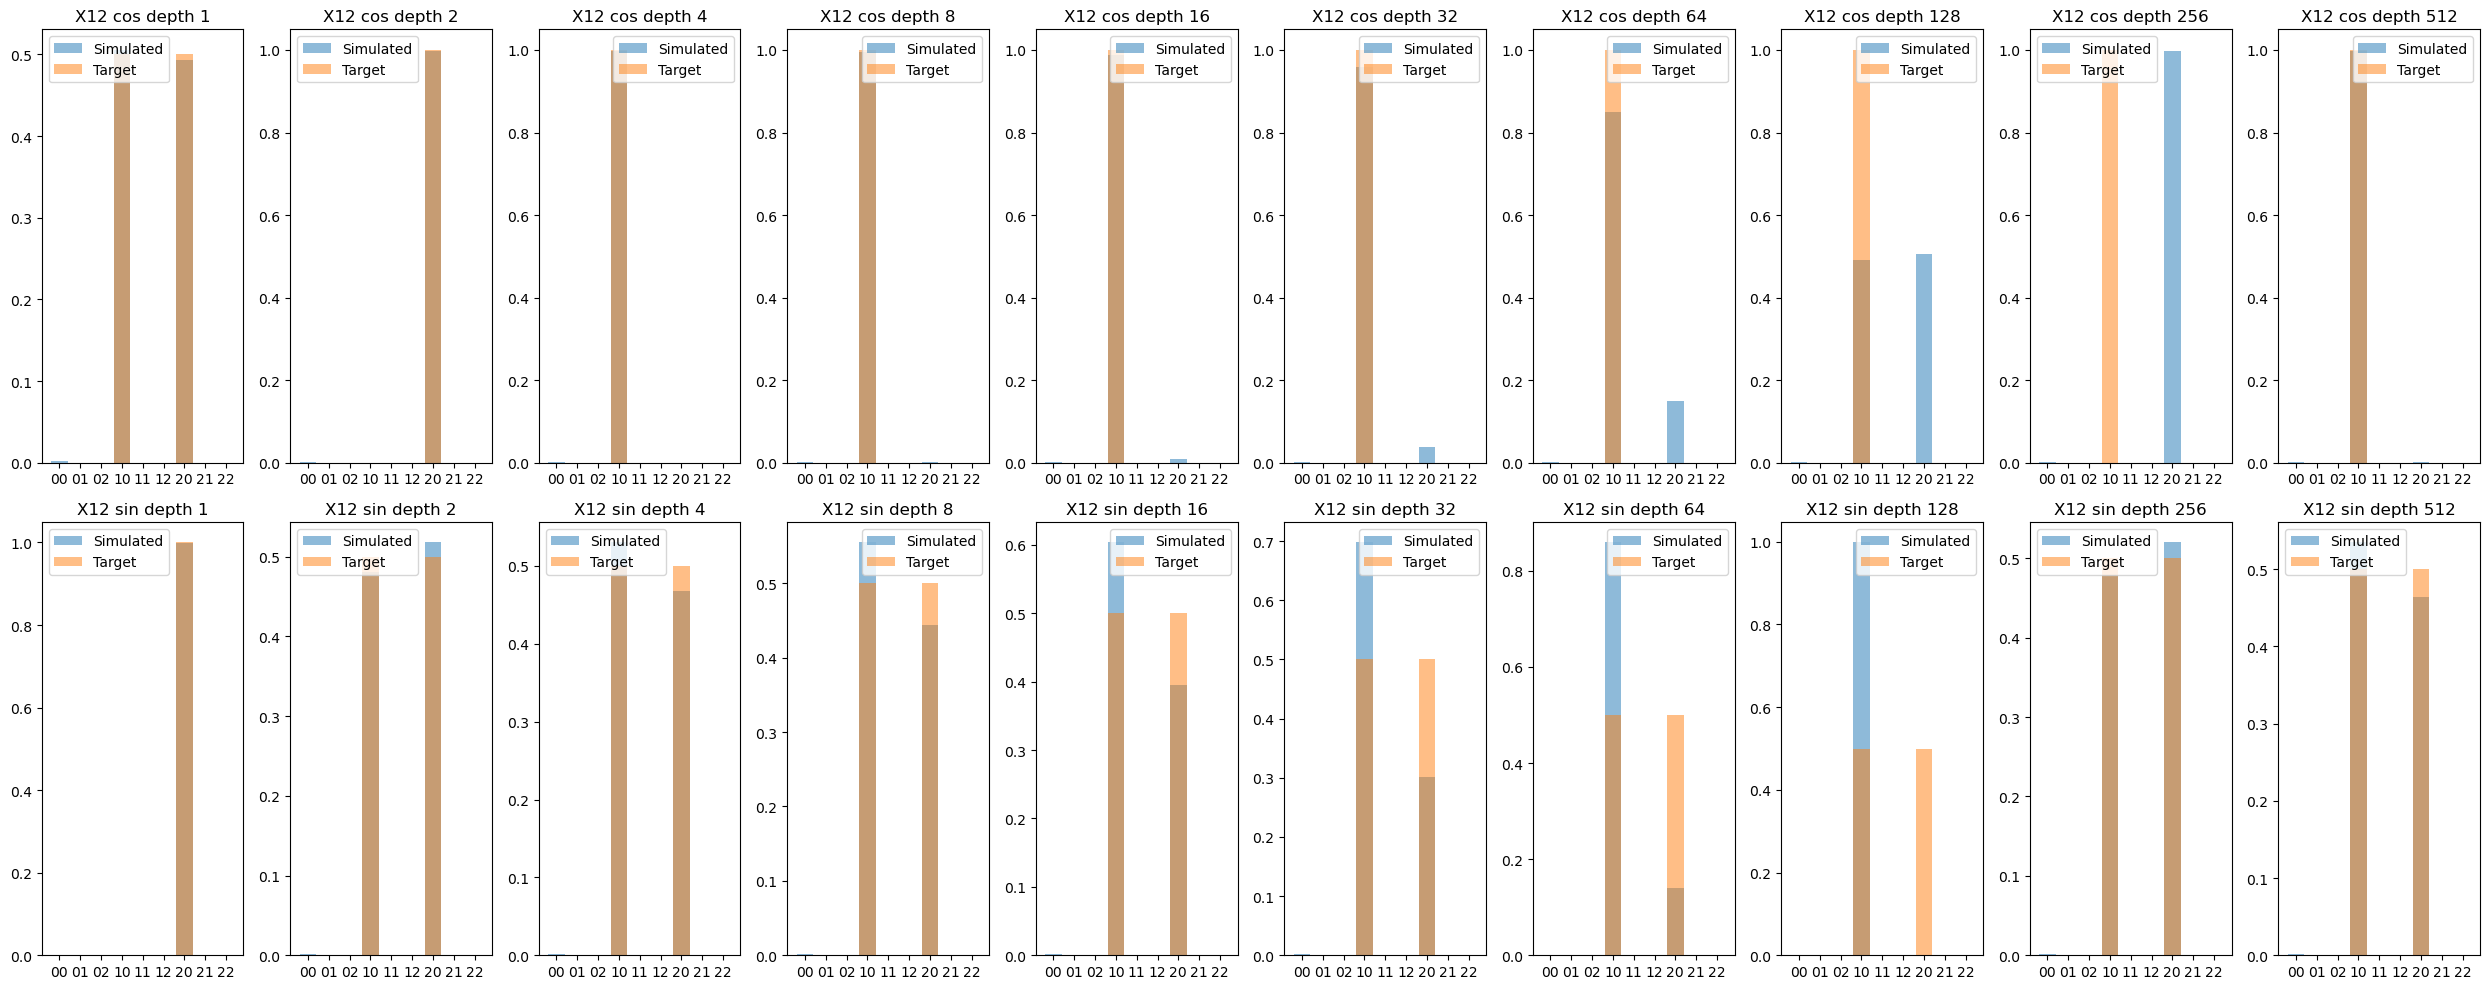

<Figure size 640x480 with 0 Axes>

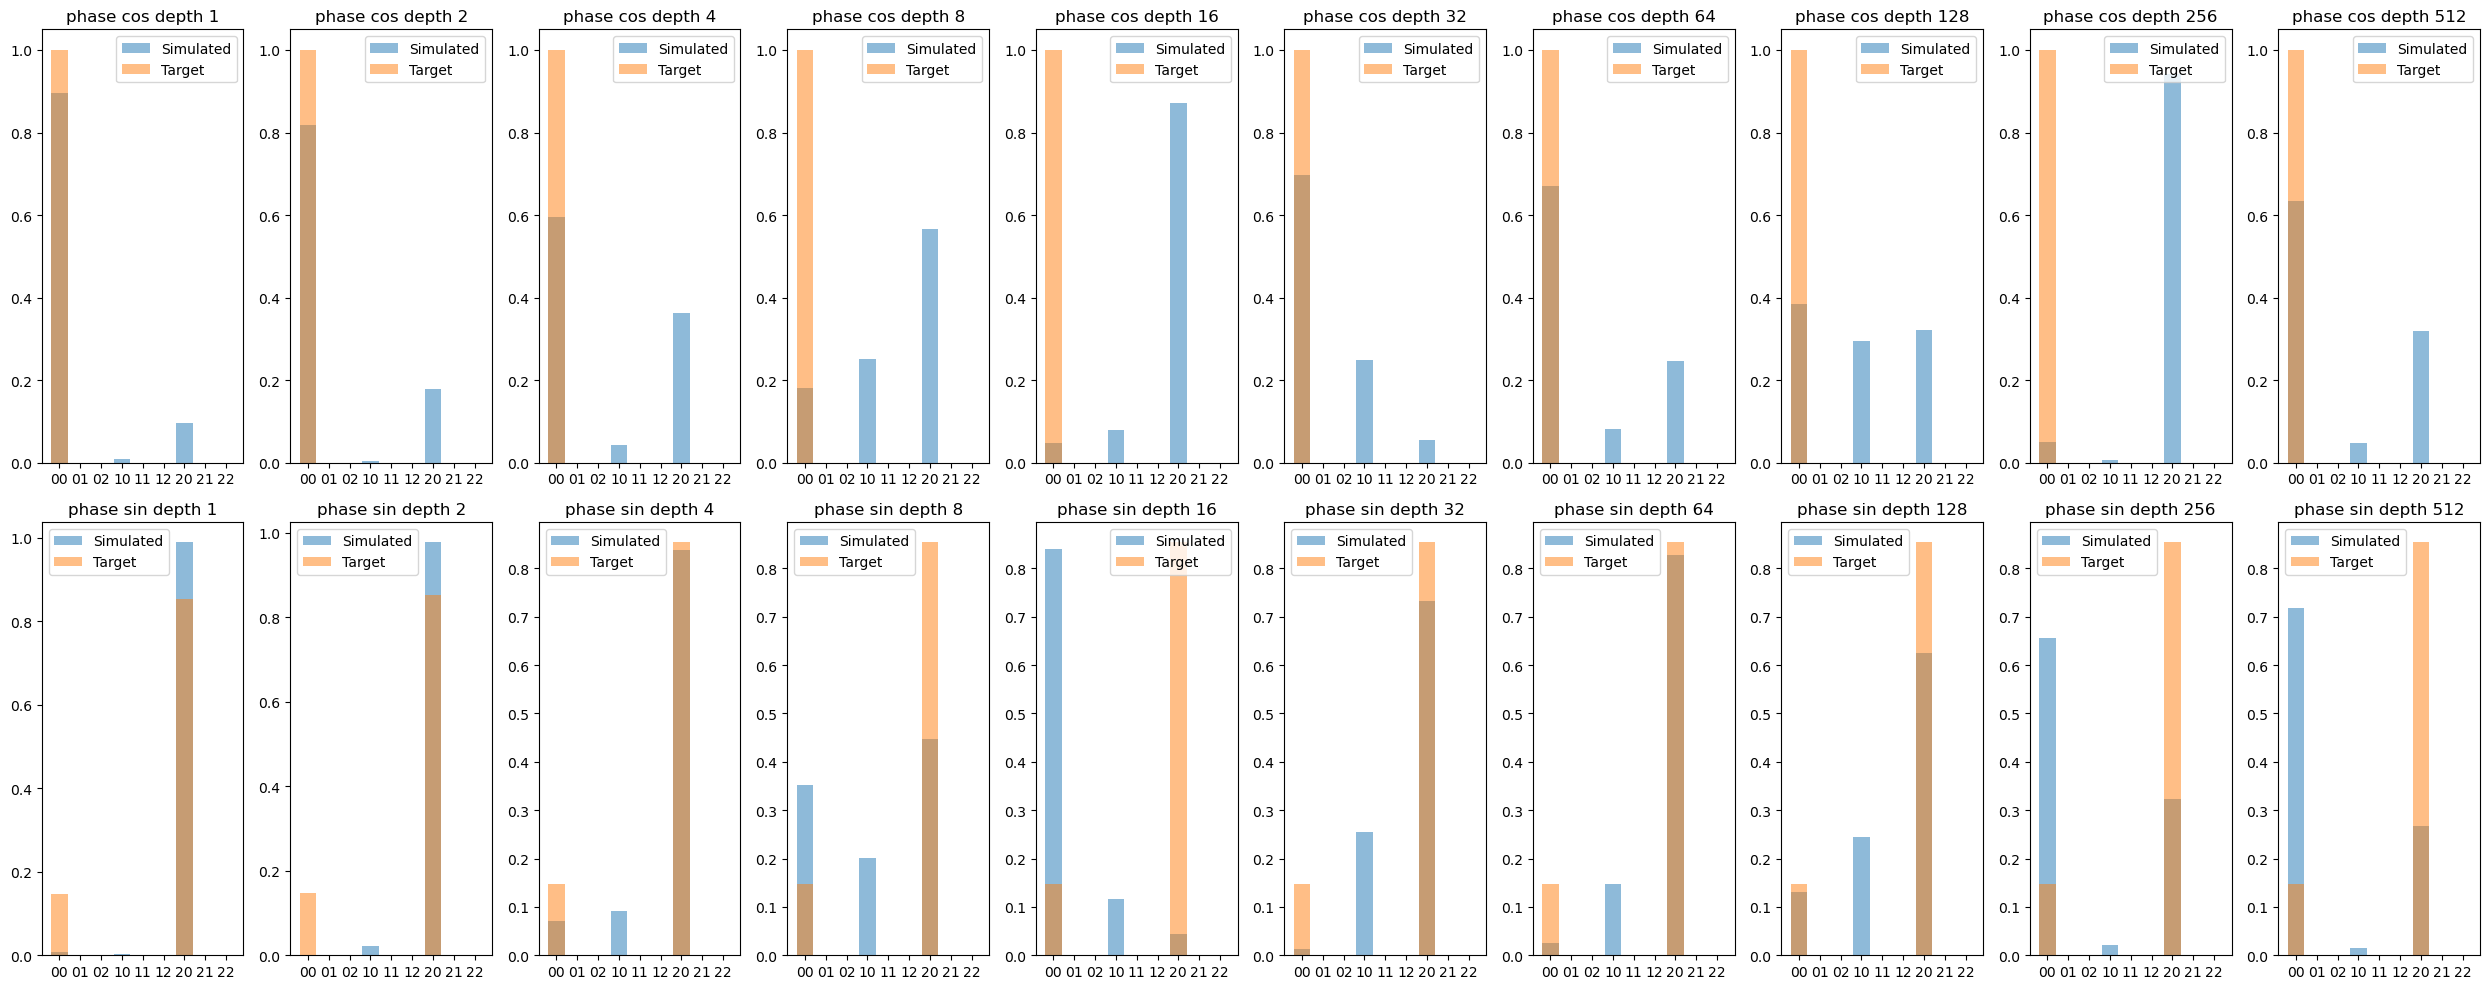

<Figure size 640x480 with 0 Axes>

In [33]:
plot_edesign_probability_from_model_and_target(edesign, depths, model, target_model)

# 2 single-qutrit  

In [787]:
circ_Y01_Q1 = [('Gz_01_Q1', 'Q1')] + [('Gx_01_Q1', 'Q1')] + [('Gz_01_Q1', 'Q1')]*3
circ_Y12_Q1 = [('Gz_12_Q1', 'Q1')] + [('Gx_12_Q1', 'Q1')] + [('Gz_12_Q1', 'Q1')]*3

circ_X01_Q1_inv = [('Gx_01_Q1', 'Q1')]*7
circ_X12_Q1_inv = [('Gx_12_Q1', 'Q1')]*7
circ_Y01_Q1_inv = circ_Y01_Q1*7
circ_Y12_Q1_inv = circ_Y12_Q1*7

def make_Y01_circ(qid):
    return [(f'Gz_01_{qid}', qid), (f'Gx_01_{qid}', qid),] + [(f'Gz_01_{qid}', qid)]*3

def make_Y12_circ(qid):
    return [(f'Gz_12_{qid}', qid), (f'Gx_12_{qid}', qid),] + [(f'Gz_12_{qid}', qid)]*3

def make_X01_inv_circ(qid):
    return [(f'Gx_01_{qid}', qid)]*7

def make_X12_inv_circ(qid):
    return [(f'Gx_12_{qid}', qid)]*7

def make_Y01_inv_circ(qid):
    return make_Y01_circ(qid)*7

def make_Y12_inv_circ(qid):
    return make_Y12_circ(qid)*7

def make_X01_circ(qid):
    return [(f'Gx_01_{qid}', qid),]

def make_X12_circ(qid):
    return [(f'Gx_12_{qid}', qid),]

def make_Z01_circ(qid):
    return [(f'Gz_01_{qid}', qid),]

def make_Z12_circ(qid):
    return [(f'Gz_12_{qid}', qid),]

#================================================================================================
# phi 1
def make_CZphi1_cos_prep(qid1, qid2):
    return make_Y01_circ(qid2)

def make_CZphi1_sin_prep(qid1, qid2):
    return make_Y01_circ(qid2)

def make_CZphi1_cos_meas(qid1, qid2):
    return make_Y01_inv_circ(qid2)

def make_CZphi1_sin_meas(qid1, qid2):
    return make_X01_inv_circ(qid2)
#================================================================================================
# phi 2
def make_CZphi2_cos_prep(qid1, qid2):
    Y01_Q2 = make_Y01_circ(qid2)
    X12_Q2 = make_X12_circ(qid2)
    return  Y01_Q2 + X12_Q2*2

def make_CZphi2_sin_prep(qid1, qid2):
    Y01_Q2 = make_Y01_circ(qid2)
    X12_Q2 = make_X12_circ(qid2)
    return  Y01_Q2 + X12_Q2*2

def make_CZphi2_cos_meas(qid1, qid2):
    Y01_inv_Q2 = make_Y01_inv_circ(qid2)
    X12_Q2 = make_X12_circ(qid2)
    return X12_Q2*6 + Y01_inv_Q2 

def make_CZphi2_sin_meas(qid1, qid2):
    X01_inv_Q2 = make_X01_inv_circ(qid2)
    X12_Q2 = make_X12_circ(qid2)
    return X12_Q2*6 + X01_inv_Q2

#================================================================================================
# phi 3
def make_CZphi3_cos_prep(qid1, qid2):
    Y01_Q2 = make_Y01_circ(qid2)
    X01_Q1 = make_X01_circ(qid1)
    return  Y01_Q2 + X01_Q1*2

def make_CZphi3_sin_prep(qid1, qid2):
    Y01_Q2 = make_Y01_circ(qid2)
    X01_Q1 = make_X01_circ(qid1)
    return  Y01_Q2 + X01_Q1*2

def make_CZphi3_cos_meas(qid1, qid2):
    Y01_inv_Q2 = make_Y01_inv_circ(qid2)
    X01_Q1 = make_X01_circ(qid1)
    return X01_Q1*6 + Y01_inv_Q2

def make_CZphi3_sin_meas(qid1, qid2):
    X01_inv_Q2 = make_X01_inv_circ(qid2)
    X01_Q1 = make_X01_circ(qid1)
    return X01_Q1*6 + X01_inv_Q2

#================================================================================================
# phi 4
def make_CZphi4_cos_prep(qid1, qid2):
    Y01_Q2 = make_Y01_circ(qid2)
    X12_Q2 = make_X12_circ(qid2)
    X01_Q1 = make_X01_circ(qid1)
    return  Y01_Q2 + X12_Q2*2 + X01_Q1*2

def make_CZphi4_sin_prep(qid1, qid2):
    Y01_Q2 = make_Y01_circ(qid2)
    X12_Q2 = make_X12_circ(qid2)
    X01_Q1 = make_X01_circ(qid1)
    return  Y01_Q2 + X12_Q2*2 + X01_Q1*2

def make_CZphi4_cos_meas(qid1, qid2):
    Y01_inv_Q2 = make_Y01_inv_circ(qid2)
    X12_Q2 = make_X12_circ(qid2)
    X01_Q1 = make_X01_circ(qid1)
    return X12_Q2*6 + X01_Q1*6 + Y01_inv_Q2

def make_CZphi4_sin_meas(qid1, qid2):
    X01_inv_Q2 = make_X01_inv_circ(qid2)
    X12_Q2 = make_X12_circ(qid2)
    X01_Q1 = make_X01_circ(qid1)
    return X12_Q2*6 + X01_Q1*6 + X01_inv_Q2

#================================================================================================
# phi 5
def make_CZphi5_cos_prep(qid1, qid2):
    Y01_Q2 = make_Y01_circ(qid2)
    X01_Q1 = make_X01_circ(qid1)
    X12_Q1 = make_X12_circ(qid1)
    return  Y01_Q2 + X01_Q1*2 + X12_Q1*2

def make_CZphi5_sin_prep(qid1, qid2):
    Y01_Q2 = make_Y01_circ(qid2)
    X01_Q1 = make_X01_circ(qid1)
    X12_Q1 = make_X12_circ(qid1)
    return  Y01_Q2 + X01_Q1*2 + X12_Q1*2

def make_CZphi5_cos_meas(qid1, qid2):
    Y01_inv_Q2 = make_Y01_inv_circ(qid2)
    X01_Q1 = make_X01_circ(qid1)
    X12_Q1 = make_X12_circ(qid1)
    return X12_Q1*6 + X01_Q1*6 + Y01_inv_Q2

def make_CZphi5_sin_meas(qid1, qid2):
    X01_inv_Q2 = make_X01_inv_circ(qid2)
    X01_Q1 = make_X01_circ(qid1)
    X12_Q1 = make_X12_circ(qid1)
    return X12_Q1*6 + X01_Q1*6 + X01_inv_Q2

#================================================================================================
# phi 6
def make_CZphi6_cos_prep(qid1, qid2):
    Y01_Q2 = make_Y01_circ(qid2)
    X12_Q2 = make_X12_circ(qid2)
    X01_Q1 = make_X01_circ(qid1)
    X12_Q1 = make_X12_circ(qid1)
    return  Y01_Q2 + X12_Q2*2 + X01_Q1*2 + X12_Q1*2

def make_CZphi6_sin_prep(qid1, qid2):
    Y01_Q2 = make_Y01_circ(qid2)
    X12_Q2 = make_X12_circ(qid2)
    X01_Q1 = make_X01_circ(qid1)
    X12_Q1 = make_X12_circ(qid1)
    return  Y01_Q2 + X12_Q2*2 + X01_Q1*2 + X12_Q1*2

def make_CZphi6_cos_meas(qid1, qid2):
    Y01_inv_Q2 = make_Y01_inv_circ(qid2)
    X12_Q2 = make_X12_circ(qid2)
    X01_Q1 = make_X01_circ(qid1)
    X12_Q1 = make_X12_circ(qid1)
    return X12_Q1*6 + X01_Q1*6 + X12_Q2*6 + Y01_inv_Q2

def make_CZphi6_sin_meas(qid1, qid2):
    X01_inv_Q2 = make_X01_inv_circ(qid2)
    X12_Q2 = make_X12_circ(qid2)
    X01_Q1 = make_X01_circ(qid1)
    X12_Q1 = make_X12_circ(qid1)
    return X12_Q1*6 + X01_Q1*6 + X12_Q2*6 + X01_inv_Q2

#================================================================================================
# phi 7
def make_CZphi7_cos_prep(qid1, qid2):
    Y01_Q1 = make_Y01_circ(qid1)
    X01_Q2 = make_X01_circ(qid2)
    return Y01_Q1 + X01_Q2*2

def make_CZphi7_sin_prep(qid1, qid2):
    Y01_Q1 = make_Y01_circ(qid1)
    X01_Q2 = make_X01_circ(qid2)
    return Y01_Q1 + X01_Q2*2

def make_CZphi7_cos_meas(qid1, qid2):
    Y01_inv_Q1 = make_Y01_inv_circ(qid1)
    X01_Q2 = make_X01_circ(qid2)
    return X01_Q2*6 + Y01_inv_Q1

def make_CZphi7_sin_meas(qid1, qid2):
    X01_inv_Q1 = make_X01_inv_circ(qid1)
    X01_Q2 = make_X01_circ(qid2)
    return X01_Q2*6 + X01_inv_Q1

#================================================================================================

# phi 8
def make_CZphi8_cos_prep(qid1, qid2):
    Y01_Q1 = make_Y01_circ(qid1)
    X12_Q1 = make_X12_circ(qid1)
    X01_Q2 = make_X01_circ(qid2)
    return Y01_Q1 + X12_Q1*2 + X01_Q2*2

def make_CZphi8_sin_prep(qid1, qid2):
    Y01_Q1 = make_Y01_circ(qid1)
    X12_Q1 = make_X12_circ(qid1)
    X01_Q2 = make_X01_circ(qid2)
    return Y01_Q1 + X12_Q1*2 + X01_Q2*2

def make_CZphi8_cos_meas(qid1, qid2):
    Y01_inv_Q1 = make_Y01_inv_circ(qid1)
    X12_Q1 = make_X12_circ(qid1)
    X01_Q2 = make_X01_circ(qid2)
    return X01_Q2*6 + X12_Q1*6 + Y01_inv_Q1

def make_CZphi8_sin_meas(qid1, qid2):
    X01_inv_Q1 = make_X01_inv_circ(qid1)
    X12_Q1 = make_X12_circ(qid1)
    X01_Q2 = make_X01_circ(qid2)
    return X01_Q2*6 + X12_Q1*6 + X01_inv_Q1

def make_1qt_fiducials(qid):
    
    prep_dict = {
        'id' : [],
        'X01_cos_prep': [], 
        'X01_sin_prep': [], 
        'X12_cos_prep': [(f'Gx_01_{qid}', qid), (f'Gx_01_{qid}', qid)],
        'X12_sin_prep': [(f'Gx_01_{qid}', qid), (f'Gx_01_{qid}', qid)],
        'phase_cos_prep': [(f'Gx_01_{qid}', qid), (f'Gx_01_{qid}', qid)] + [(f'Gx_12_{qid}', qid)] + make_Y01_circ(qid),
        'phase_sin_prep': [(f'Gx_01_{qid}', qid), (f'Gx_01_{qid}', qid)] + [(f'Gx_12_{qid}', qid)] + make_Y01_circ(qid),
    }

    meas_dict = {
        'id' : [],
        'X01_cos_meas': [], 
        'X01_sin_meas': [(f'Gx_01_{qid}', qid),],
        'X12_cos_meas': [],
        'X12_sin_meas': [(f'Gx_12_{qid}', qid),],
        'phase_cos_meas': make_Y01_inv_circ(qid) + make_X12_inv_circ(qid) + [(f'Gx_01_{qid}', qid)]*6,
        'phase_sin_meas': make_Y01_inv_circ(qid) + make_Y12_inv_circ(qid) + [(f'Gx_01_{qid}', qid)]*6, 
    }
    return prep_dict, meas_dict

def make_cz_fiducials(qids):
    qid1, qid2 = qids
    prep_dict = {
        'id' : [],
        'phi1_cos_prep': make_CZphi1_cos_prep(qid1, qid2), 
        'phi1_sin_prep': make_CZphi1_sin_prep(qid1, qid2),
        'phi2_cos_prep': make_CZphi2_cos_prep(qid1, qid2),
        'phi2_sin_prep': make_CZphi2_sin_prep(qid1, qid2),
        'phi3_cos_prep': make_CZphi3_cos_prep(qid1, qid2),
        'phi3_sin_prep': make_CZphi3_sin_prep(qid1, qid2),
        'phi4_cos_prep': make_CZphi4_cos_prep(qid1, qid2),
        'phi4_sin_prep': make_CZphi4_sin_prep(qid1, qid2),
        'phi5_cos_prep': make_CZphi5_cos_prep(qid1, qid2),
        'phi5_sin_prep': make_CZphi5_sin_prep(qid1, qid2),
        'phi6_cos_prep': make_CZphi6_cos_prep(qid1, qid2),
        'phi6_sin_prep': make_CZphi6_sin_prep(qid1, qid2),
        'phi7_cos_prep': make_CZphi7_cos_prep(qid1, qid2),
        'phi7_sin_prep': make_CZphi7_sin_prep(qid1, qid2),
        'phi8_cos_prep': make_CZphi8_cos_prep(qid1, qid2),
        'phi8_sin_prep': make_CZphi8_sin_prep(qid1, qid2),
    }
    meas_dict = {
        'id' : [],
        'phi1_cos_meas': make_CZphi1_cos_meas(qid1, qid2), 
        'phi1_sin_meas': make_CZphi1_sin_meas(qid1, qid2),
        'phi2_cos_meas': make_CZphi2_cos_meas(qid1, qid2),
        'phi2_sin_meas': make_CZphi2_sin_meas(qid1, qid2),
        'phi3_cos_meas': make_CZphi3_cos_meas(qid1, qid2),
        'phi3_sin_meas': make_CZphi3_sin_meas(qid1, qid2),
        'phi4_cos_meas': make_CZphi4_cos_meas(qid1, qid2),
        'phi4_sin_meas': make_CZphi4_sin_meas(qid1, qid2),
        'phi5_cos_meas': make_CZphi5_cos_meas(qid1, qid2),
        'phi5_sin_meas': make_CZphi5_sin_meas(qid1, qid2),
        'phi6_cos_meas': make_CZphi6_cos_meas(qid1, qid2),
        'phi6_sin_meas': make_CZphi6_sin_meas(qid1, qid2),
        'phi7_cos_meas': make_CZphi7_cos_meas(qid1, qid2),
        'phi7_sin_meas': make_CZphi7_sin_meas(qid1, qid2),
        'phi8_cos_meas': make_CZphi8_cos_meas(qid1, qid2),
        'phi8_sin_meas': make_CZphi8_sin_meas(qid1, qid2),
    }
    return prep_dict, meas_dict

In [788]:
def make_rpe_circuit(gate, prep_circ, meas_circ, depth):
    return Circuit(['rho0'] + prep_circ + gate*depth + meas_circ + ['Mdefault'], line_labels=['Q1', 'Q2'])

def make_two_qutrit_rpe_edesign_nocz(qids, depths):

    # make circuit dict
    circuit_dict = { qid : {
        'X01' : {'cos': [], 'sin': []},
        'X01' : {'cos': [], 'sin': []},
        'X12' : {'cos': [], 'sin': []},
        'X12' : {'cos': [], 'sin': []},
        'phase' : {'cos': [], 'sin': []},
        'phase' : {'cos': [], 'sin': []},
    } for qid in qids}

    # make fiducials
    fid_prep_dict = {
        qid : make_1qt_fiducials(qid)[0] for qid in qids
    } 
    fid_meas_dict = {
        qid : make_1qt_fiducials(qid)[1] for qid in qids
    } 

    

    for qid in qids:
        for depth in depths:
            circuit_dict[qid]['X01']['cos'].append(make_rpe_circuit([(f'Gx_01_{qid}', qid)], fid_prep_dict[qid]['X01_cos_prep'], fid_meas_dict[qid]['X01_cos_meas'], depth))
            circuit_dict[qid]['X01']['sin'].append(make_rpe_circuit([(f'Gx_01_{qid}', qid)], fid_prep_dict[qid]['X01_sin_prep'], fid_meas_dict[qid]['X01_sin_meas'], depth))
            circuit_dict[qid]['X12']['cos'].append(make_rpe_circuit([(f'Gx_12_{qid}', qid)], fid_prep_dict[qid]['X12_cos_prep'], fid_meas_dict[qid]['X12_cos_meas'], depth))
            circuit_dict[qid]['X12']['sin'].append(make_rpe_circuit([(f'Gx_12_{qid}', qid)], fid_prep_dict[qid]['X12_sin_prep'], fid_meas_dict[qid]['X12_sin_meas'], depth))
            circuit_dict[qid]['phase']['cos'].append(make_rpe_circuit([(f'Gx_01_{qid}', qid)]*8, fid_prep_dict[qid]['phase_cos_prep'], fid_meas_dict[qid]['phase_cos_meas'], depth))
            circuit_dict[qid]['phase']['sin'].append(make_rpe_circuit([(f'Gx_01_{qid}', qid)]*8, fid_prep_dict[qid]['phase_sin_prep'], fid_meas_dict[qid]['phase_sin_meas'], depth))
            
    
    return circuit_dict

def edesign_to_circuit_list(edesign):
    circuits = []
    for qid in edesign.keys():
        for etype in edesign[qid].keys():
            for mtype in edesign[qid][etype].keys():
                for circuit in edesign[qid][etype][mtype]:
                    circuits.append(circuit)
    return pygsti.tools.remove_duplicates(circuits)


def make_two_qutrit_rpe_edesign(qids, depths):
    # make circuit dict
    circuit_dict = { qid : {
        'X01' : {'cos': [], 'sin': []},
        'X01' : {'cos': [], 'sin': []},
        'X12' : {'cos': [], 'sin': []},
        'X12' : {'cos': [], 'sin': []},
        'phase' : {'cos': [], 'sin': []},
        'phase' : {'cos': [], 'sin': []},
    } for qid in qids} | {
        'CZ' : {
            'phi1' : {'cos': [], 'sin': []},
            'phi2' : {'cos': [], 'sin': []},
            'phi3' : {'cos': [], 'sin': []},
            'phi4' : {'cos': [], 'sin': []},
            'phi5' : {'cos': [], 'sin': []},
            'phi6' : {'cos': [], 'sin': []},
            'phi7' : {'cos': [], 'sin': []},
            'phi8' : {'cos': [], 'sin': []},
        }
    }
    # make fiducials
    fid_prep_dict = {
        qid : make_1qt_fiducials(qid)[0] for qid in qids
    }| { 'CZ' : make_cz_fiducials(qids)[0]}
    fid_meas_dict = {
        qid : make_1qt_fiducials(qid)[1] for qid in qids
    }| { 'CZ' : make_cz_fiducials(qids)[1]}

    # single qutrits 
    for qid in qids:
        for depth in depths:
            circuit_dict[qid]['X01']['cos'].append(make_rpe_circuit([(f'Gx_01_{qid}', qid)], fid_prep_dict[qid]['X01_cos_prep'], fid_meas_dict[qid]['X01_cos_meas'], depth))
            circuit_dict[qid]['X01']['sin'].append(make_rpe_circuit([(f'Gx_01_{qid}', qid)], fid_prep_dict[qid]['X01_sin_prep'], fid_meas_dict[qid]['X01_sin_meas'], depth))
            circuit_dict[qid]['X12']['cos'].append(make_rpe_circuit([(f'Gx_12_{qid}', qid)], fid_prep_dict[qid]['X12_cos_prep'], fid_meas_dict[qid]['X12_cos_meas'], depth))
            circuit_dict[qid]['X12']['sin'].append(make_rpe_circuit([(f'Gx_12_{qid}', qid)], fid_prep_dict[qid]['X12_sin_prep'], fid_meas_dict[qid]['X12_sin_meas'], depth))
            circuit_dict[qid]['phase']['cos'].append(make_rpe_circuit([(f'Gx_01_{qid}', qid)]*8, fid_prep_dict[qid]['phase_cos_prep'], fid_meas_dict[qid]['phase_cos_meas'], depth))
            circuit_dict[qid]['phase']['sin'].append(make_rpe_circuit([(f'Gx_01_{qid}', qid)]*8, fid_prep_dict[qid]['phase_sin_prep'], fid_meas_dict[qid]['phase_sin_meas'], depth))

    # CZ
    for depth in depths: 
        circuit_dict['CZ']['phi1']['cos'].append(make_rpe_circuit([('Gcz', 'Q1', 'Q2')], fid_prep_dict['CZ']['phi1_cos_prep'], fid_meas_dict['CZ']['phi1_cos_meas'], depth))
        circuit_dict['CZ']['phi1']['sin'].append(make_rpe_circuit([('Gcz', 'Q1', 'Q2')], fid_prep_dict['CZ']['phi1_sin_prep'], fid_meas_dict['CZ']['phi1_sin_meas'], depth))
        circuit_dict['CZ']['phi2']['cos'].append(make_rpe_circuit([('Gcz', 'Q1', 'Q2')], fid_prep_dict['CZ']['phi2_cos_prep'], fid_meas_dict['CZ']['phi2_cos_meas'], depth))
        circuit_dict['CZ']['phi2']['sin'].append(make_rpe_circuit([('Gcz', 'Q1', 'Q2')], fid_prep_dict['CZ']['phi2_sin_prep'], fid_meas_dict['CZ']['phi2_sin_meas'], depth))
        circuit_dict['CZ']['phi3']['cos'].append(make_rpe_circuit([('Gcz', 'Q1', 'Q2')], fid_prep_dict['CZ']['phi3_cos_prep'], fid_meas_dict['CZ']['phi3_cos_meas'], depth))
        circuit_dict['CZ']['phi3']['sin'].append(make_rpe_circuit([('Gcz', 'Q1', 'Q2')], fid_prep_dict['CZ']['phi3_sin_prep'], fid_meas_dict['CZ']['phi3_sin_meas'], depth))
        circuit_dict['CZ']['phi4']['cos'].append(make_rpe_circuit([('Gcz', 'Q1', 'Q2')], fid_prep_dict['CZ']['phi4_cos_prep'], fid_meas_dict['CZ']['phi4_cos_meas'], depth))
        circuit_dict['CZ']['phi4']['sin'].append(make_rpe_circuit([('Gcz', 'Q1', 'Q2')], fid_prep_dict['CZ']['phi4_sin_prep'], fid_meas_dict['CZ']['phi4_sin_meas'], depth))
        circuit_dict['CZ']['phi5']['cos'].append(make_rpe_circuit([('Gcz', 'Q1', 'Q2')], fid_prep_dict['CZ']['phi5_cos_prep'], fid_meas_dict['CZ']['phi5_cos_meas'], depth))
        circuit_dict['CZ']['phi5']['sin'].append(make_rpe_circuit([('Gcz', 'Q1', 'Q2')], fid_prep_dict['CZ']['phi5_sin_prep'], fid_meas_dict['CZ']['phi5_sin_meas'], depth))
        circuit_dict['CZ']['phi6']['cos'].append(make_rpe_circuit([('Gcz', 'Q1', 'Q2')], fid_prep_dict['CZ']['phi6_cos_prep'], fid_meas_dict['CZ']['phi6_cos_meas'], depth))
        circuit_dict['CZ']['phi6']['sin'].append(make_rpe_circuit([('Gcz', 'Q1', 'Q2')], fid_prep_dict['CZ']['phi6_sin_prep'], fid_meas_dict['CZ']['phi6_sin_meas'], depth))
        circuit_dict['CZ']['phi7']['cos'].append(make_rpe_circuit([('Gcz', 'Q1', 'Q2')], fid_prep_dict['CZ']['phi7_cos_prep'], fid_meas_dict['CZ']['phi7_cos_meas'], depth))
        circuit_dict['CZ']['phi7']['sin'].append(make_rpe_circuit([('Gcz', 'Q1', 'Q2')], fid_prep_dict['CZ']['phi7_sin_prep'], fid_meas_dict['CZ']['phi7_sin_meas'], depth))
        circuit_dict['CZ']['phi8']['cos'].append(make_rpe_circuit([('Gcz', 'Q1', 'Q2')], fid_prep_dict['CZ']['phi8_cos_prep'], fid_meas_dict['CZ']['phi8_cos_meas'], depth))
        circuit_dict['CZ']['phi8']['sin'].append(make_rpe_circuit([('Gcz', 'Q1', 'Q2')], fid_prep_dict['CZ']['phi8_sin_prep'], fid_meas_dict['CZ']['phi8_sin_meas'], depth))
        
    
    return circuit_dict

def edesign_to_circuit_list(edesign):
    circuits = []
    for key in edesign.keys():
        for etype in edesign[key].keys():
            for mtype in edesign[key][etype].keys():
                for circuit in edesign[key][etype][mtype]:
                    circuits.append(circuit)
    return pygsti.tools.remove_duplicates(circuits)

In [796]:
def rectify_phase(phase):
    """
    Ensure a phase is in the range (-pi, pi]
    """
    return (phase + np.pi) % (2*np.pi) - np.pi

def unwrap_phase_pair(estimate, reference):
    """
    Unwrap a phase estimate to a reference phase
    """
    # ensure the reference is in the range (-pi, pi]
    reference = rectify_phase(reference)

    unwrapped_phase = (estimate - reference) % (2*np.pi) + reference

    if unwrapped_phase - reference > np.pi:
        unwrapped_phase -= 2*np.pi
    elif unwrapped_phase - reference <= -np.pi:
        unwrapped_phase += 2*np.pi

    return unwrapped_phase

def estimate_raw_single_qutrit_phases_from_pygsti_dataset(dataset, edesign, depths, verbose=False):
    raw_estimates = {}
    last_good_gens = {}
    
    # X01 overrotation on Q1
    try:
        phase_estimates, lgg = estimate_phase_from_dataset(dataset, edesign['Q1']['X01']['cos'], ['00'], ['10'], edesign['Q1']['X01']['sin'], ['00'], ['10'], depths)
        raw_estimates['x01_q1_overrot'] = phase_estimates
        last_good_gens['x01_q1_overrot'] = lgg
        if verbose:
            print('x01_q1_overrot success')
            print(f'x01_q1_overrot estimate: {phase_estimates[lgg]}')
            print('last good generation: ', lgg)
    except:
        raw_estimates['x01_q1_overrot'] = None
        last_good_gens['x01_q1_overrot'] = None
        print('x01_q1_overrot failed')

    # X12 overrotation on Q1
    try:
        phase_estimates, lgg = estimate_phase_from_dataset(dataset, edesign['Q1']['X12']['cos'], ['10'], ['20'], edesign['Q1']['X12']['sin'], ['10'], ['20'], depths)
        raw_estimates['x12_q1_overrot'] = phase_estimates
        last_good_gens['x12_q1_overrot'] = lgg
        if verbose:
            print('x12_q1_overrot success')
            print(f'x12_q1_overrot estimate: {phase_estimates[lgg]}')
            print('last good generation: ', lgg)
    except:
        raw_estimates['x12_q1_overrot'] = None
        last_good_gens['x12_q1_overrot'] = None
        print('x12_q1_overrot failed')

    # phase error on Q1
    try:
        phase_estimates, lgg = estimate_phase_from_dataset(dataset, edesign['Q1']['phase']['cos'], ['00'], ['20'], edesign['Q1']['phase']['sin'], ['00'], ['20'], depths)
        raw_estimates['phase_q1_error'] = phase_estimates
        last_good_gens['phase_q1_error'] = lgg
        if verbose:
            print('phase_q1_error success')
            print(f'phase_q1_error estimate: {phase_estimates[lgg]}')
            print('last good generation: ', lgg)
    except:
        raw_estimates['phase_q1_error'] = None
        last_good_gens['phase_q1_error'] = None
        print('phase_q1_error failed')

    # X01 overrotation on Q2
    try:
        phase_estimates, lgg = estimate_phase_from_dataset(dataset, edesign['Q2']['X01']['cos'], ['00'], ['01'], edesign['Q2']['X01']['sin'], ['00'], ['01'], depths)
        raw_estimates['x01_q2_overrot'] = phase_estimates
        last_good_gens['x01_q2_overrot'] = lgg
        if verbose:
            print('x01_q2_overrot success')
            print(f'x01_q2_overrot estimate: {phase_estimates[lgg]}')
            print('last good generation: ', lgg)
    except:
        raw_estimates['x01_q2_overrot'] = None
        last_good_gens['x01_q2_overrot'] = None
        print('x01_q2_overrot failed')

    # X12 overrotation on Q2
    try:
        phase_estimates, lgg = estimate_phase_from_dataset(dataset, edesign['Q2']['X12']['cos'], ['01'], ['02'], edesign['Q2']['X12']['sin'], ['01'], ['02'], depths)
        raw_estimates['x12_q2_overrot'] = phase_estimates
        last_good_gens['x12_q2_overrot'] = lgg
        if verbose:
            print('x12_q2_overrot success')
            print(f'x12_q2_overrot estimate: {phase_estimates[lgg]}')
            print('last good generation: ', lgg)
    except:
        raw_estimates['x12_q2_overrot'] = None
        last_good_gens['x12_q2_overrot'] = None
        print('x12_q2_overrot failed')

    # phase error on Q2
    try:
        phase_estimates, lgg = estimate_phase_from_dataset(dataset, edesign['Q2']['phase']['cos'], ['00'], ['20'], edesign['Q2']['phase']['sin'], ['00'], ['20'], depths)
        raw_estimates['phase_q2_error'] = phase_estimates
        last_good_gens['phase_q2_error'] = lgg
        if verbose:
            print('phase_q2_error success')
            print(f'phase_q2_error estimate: {phase_estimates[lgg]}')
            print('last good generation: ', lgg)
    except:
        raw_estimates['phase_q2_error'] = None
        last_good_gens['phase_q2_error'] = None
        print('phase_q2_error failed')
    #     last_good_x12_q1_phase = phase_estimates[lgg]
    #     phase_error = -last_good_x12_q1_phase - np.pi/2
    #     rectified_phase_error = rectify_phase(phase_error)
    #     x12_q1_overrot_estimate = rectified_phase_error
    #     estimates['x12_q1_overrot'] = x12_q1_overrot_estimate
    #     last_good_gens['x12_q1_overrot'] = lgg
    # except:
    #     estimates['x12_q1_overrot'] = None
    #     last_good_gens['x12_q1_overrot'] = None
    #     print('x12_q1_overrot failed')

    # # X01 overrotation on Q2
    # try:
    #     phase_estimates, lgg = estimate_phase_from_dataset(dataset, edesign['Q2']['X01']['cos'], ['00'], ['01'], edesign['Q2']['X01']['sin'], ['00'], ['01'], depths)
    #     last_good_x01_q2_phase = phase_estimates[lgg]
    #     phase_error = -last_good_x01_q2_phase - np.pi/2
    #     rectified_phase_error = rectify_phase(phase_error)
    #     x01_q2_overrot_estimate = rectified_phase_error
    #     estimates['x01_q2_overrot'] = x01_q2_overrot_estimate
    #     last_good_gens['x01_q2_overrot'] = lgg
    # except:
    #     estimates['x01_q2_overrot'] = None
    #     last_good_gens['x01_q2_overrot'] = None
    #     print('x01_q1_overrot failed')

    # # X12 overrotation on Q2
    # try:
    #     phase_estimates, lgg = estimate_phase_from_dataset(dataset, edesign['Q2']['X12']['cos'], ['01'], ['02'], edesign['Q2']['X12']['sin'], ['01'], ['02'], depths)
    #     last_good_x12_q2_phase = phase_estimates[lgg]
    #     phase_error = -last_good_x12_q2_phase - np.pi/2
    #     rectified_phase_error = rectify_phase(phase_error)
    #     x12_q2_overrot_estimate = rectified_phase_error
    #     estimates['x12_q2_overrot'] = x12_q2_overrot_estimate
    #     last_good_gens['x12_q2_overrot'] = lgg
    # except:
    #     estimates['x12_q2_overrot'] = None
    #     last_good_gens['x12_q2_overrot'] = None
    #     print('x12_q1_overrot failed')

    # # phase error on Q1
    # try:
    #     phase_estimates, lgg = estimate_phase_from_dataset(dataset, edesign['Q1']['phase']['cos'], ['00'], ['20'], edesign['Q1']['phase']['sin'], ['00'], ['20'], depths)
    #     last_good_phase_raw = phase_estimates[lgg]
    #     last_good_phase_rectified = rectify_phase(last_good_phase_raw)
    #     phase_error_estimate = (-last_good_phase_rectified + 4*x01_q1_overrot_estimate)/12
    #     estimates['phase_q1_error'] = phase_error_estimate
    #     last_good_gens['phase_q1_error'] = lgg
    # except:
    #     estimates['phase_q1_error'] = None
    #     last_good_gens['phase_q1_error'] = None
    #     print('phase_q1_error failed')

    # # phase error on Q2
    # try:
    #     phase_estimates, lgg = estimate_phase_from_dataset(dataset, edesign['Q2']['phase']['cos'], ['00'], ['20'], edesign['Q2']['phase']['sin'], ['00'], ['20'], depths)
    #     last_good_phase_raw = phase_estimates[lgg]
    #     last_good_phase_rectified = rectify_phase(last_good_phase_raw)
    #     phase_error_estimate = (-last_good_phase_rectified + 4*x01_q2_overrot_estimate)/12
    #     estimates['phase_q2_error'] = phase_error_estimate
    #     last_good_gens['phase_q2_error'] = lgg
    # except:
    #     estimates['phase_q2_error'] = None
    #     last_good_gens['phase_q2_error'] = None
    #     print('phase_q2_error failed')

    return raw_estimates, last_good_gens

def estimate_all_phases_from_pygsti_dataset(dataset, edesign, depths, verbose=False):
    raw_estimates, last_good_gens = estimate_raw_single_qutrit_phases_from_pygsti_dataset(dataset, edesign, depths, verbose=verbose)
    
    # add the CZ phases
    try:
        phase_estimates, lgg = estimate_phase_from_dataset(dataset, edesign['CZ']['phi1']['cos'], ['00'], ['01'], edesign['CZ']['phi1']['sin'], ['00'], ['01'], depths)
        raw_estimates['CZ_phi1'] = phase_estimates
        last_good_gens['CZ_phi1'] = lgg
        if verbose:
            print(f'CZ_phi1: {last_good_phase_raw}')
            print(f'Last good generation: {lgg+1} of {len(depths)}')
    except:
        raw_estimates['CZ_phi1'] = None
        last_good_gens['CZ_phi1'] = None
        print('CZ_phi1 failed')

    try:
        phase_estimates, lgg = estimate_phase_from_dataset(dataset, edesign['CZ']['phi2']['cos'], ['00'], ['01'], edesign['CZ']['phi2']['sin'], ['00'], ['01'], depths)
        raw_estimates['CZ_phi2'] = phase_estimates
        last_good_gens['CZ_phi2'] = lgg
        if verbose:
            print(f'CZ_phi2: {last_good_phase_raw}')
            print(f'Last good generation: {lgg+1} of {len(depths)}')
    except:
        raw_estimates['CZ_phi2'] = None
        last_good_gens['CZ_phi2'] = None
        print('CZ_phi2 failed')

    try: 
        phase_estimates, lgg = estimate_phase_from_dataset(dataset, edesign['CZ']['phi3']['cos'], ['00'], ['01'], edesign['CZ']['phi3']['sin'], ['00'], ['01'], depths)
        raw_estimates['CZ_phi3'] = phase_estimates
        last_good_gens['CZ_phi3'] = lgg
        if verbose:
            print(f'CZ_phi3: {last_good_phase_raw}')
            print(f'Last good generation: {lgg+1} of {len(depths)}')
    except:
        raw_estimates['CZ_phi3'] = None
        last_good_gens['CZ_phi3'] = None
        print('CZ_phi3 failed')

    try:
        phase_estimates, lgg = estimate_phase_from_dataset(dataset, edesign['CZ']['phi4']['cos'], ['00'], ['01'], edesign['CZ']['phi4']['sin'], ['00'], ['01'], depths)
        raw_estimates['CZ_phi4'] = phase_estimates
        last_good_gens['CZ_phi4'] = lgg
        if verbose:
            print(f'CZ_phi4: {last_good_phase_raw}')
            print(f'Last good generation: {lgg+1} of {len(depths)}')
    except:
        raw_estimates['CZ_phi4'] = None
        last_good_gens['CZ_phi4'] = None
        print('CZ_phi4 failed')

    try:
        phase_estimates, lgg = estimate_phase_from_dataset(dataset, edesign['CZ']['phi5']['cos'], ['00'], ['01'], edesign['CZ']['phi5']['sin'], ['00'], ['01'], depths)
        raw_estimates['CZ_phi5'] = phase_estimates
        last_good_gens['CZ_phi5'] = lgg
        if verbose:
            print(f'CZ_phi5: {last_good_phase_raw}')
            print(f'Last good generation: {lgg+1} of {len(depths)}')
    except:
        raw_estimates['CZ_phi5'] = None
        last_good_gens['CZ_phi5'] = None
        print('CZ_phi5 failed')

    try:
        phase_estimates, lgg = estimate_phase_from_dataset(dataset, edesign['CZ']['phi6']['cos'], ['00'], ['01'], edesign['CZ']['phi6']['sin'], ['00'], ['01'], depths)
        raw_estimates['CZ_phi6'] = phase_estimates
        last_good_gens['CZ_phi6'] = lgg
        if verbose:
            print(f'CZ_phi6: {last_good_phase_raw}')
            print(f'Last good generation: {lgg+1} of {len(depths)}')
    except:
        raw_estimates['CZ_phi6'] = None
        last_good_gens['CZ_phi6'] = None
        print('CZ_phi6 failed')

    try:
        phase_estimates, lgg = estimate_phase_from_dataset(dataset, edesign['CZ']['phi7']['cos'], ['00'], ['10'], edesign['CZ']['phi7']['sin'], ['00'], ['10'], depths)
        raw_estimates['CZ_phi7'] = phase_estimates
        last_good_gens['CZ_phi7'] = lgg
        if verbose:
            print(f'CZ_phi7: {last_good_phase_raw}')
            print(f'Last good generation: {lgg+1} of {len(depths)}')
    except:
        raw_estimates['CZ_phi7'] = None
        last_good_gens['CZ_phi7'] = None
        print('CZ_phi7 failed')

    try:
        phase_estimates, lgg = estimate_phase_from_dataset(dataset, edesign['CZ']['phi8']['cos'], ['00'], ['10'], edesign['CZ']['phi8']['sin'], ['00'], ['10'], depths)
        raw_estimates['CZ_phi8'] = phase_estimates
        last_good_gens['CZ_phi8'] = lgg
        if verbose:
            print(f'CZ_phi8: {last_good_phase_raw}')
            print(f'Last good generation: {lgg+1} of {len(depths)}')
    except:
        raw_estimates['CZ_phi8'] = None
        last_good_gens['CZ_phi8'] = None
        print('CZ_phi8 failed')

    return raw_estimates, last_good_gens


def raw_estimates_to_model_estimates(raw_estimates, last_good_gens):
    try: 
        x01_q1_overrot_estimate = -raw_estimates['x01_q1_overrot'][last_good_gens['x01_q1_overrot']] - np.pi/2
        x01_q1_overrot_estimate = rectify_phase(x01_q1_overrot_estimate)
    except:
        x01_q1_overrot_estimate = None

    try:
        x12_q1_overrot_estimate = -raw_estimates['x12_q1_overrot'][last_good_gens['x12_q1_overrot']] - np.pi/2
        x12_q1_overrot_estimate = rectify_phase(x12_q1_overrot_estimate)
    except:
        x12_q1_overrot_estimate = None

    try:
        phase_estimate_lgg_rectified = rectify_phase(raw_estimates['phase_q1_error'][last_good_gens['phase_q1_error']])
        phase_q1_error_estimate = (-phase_estimate_lgg_rectified + 4*x01_q1_overrot_estimate)/12
        phase_q1_error_estimate = rectify_phase(phase_q1_error_estimate)
    except:
        phase_q1_error_estimate = None

    try:
        x01_q2_overrot_estimate = -raw_estimates['x01_q2_overrot'][last_good_gens['x01_q2_overrot']] - np.pi/2
        x01_q2_overrot_estimate = rectify_phase(x01_q2_overrot_estimate)
    except:
        x01_q2_overrot_estimate = None

    try:
        x12_q2_overrot_estimate = -raw_estimates['x12_q2_overrot'][last_good_gens['x12_q2_overrot']] - np.pi/2
        x12_q2_overrot_estimate = rectify_phase(x12_q2_overrot_estimate)
    except:
        x12_q2_overrot_estimate = None

    try: 
        phase_q2_error_estimate = (-raw_estimates['phase_q2_error'][last_good_gens['phase_q2_error']] + 4*x01_q2_overrot_estimate)/12
        phase_q2_error_estimate = rectify_phase(phase_q2_error_estimate)
    except:
        phase_q2_error_estimate = None

    
    cz_phi_keys = ['CZ_phi1', 'CZ_phi2', 'CZ_phi3', 'CZ_phi4', 'CZ_phi5', 'CZ_phi6', 'CZ_phi7', 'CZ_phi8']
    phis = np.zeros(8)
    for i, key in enumerate(cz_phi_keys):
        try:
            phis[i] =raw_estimates[key][last_good_gens[key]]
        except:
            phis[i] = 0
            print(f'{key} failed')
    
    eigvals_from_raw = np.array([
        [1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, -1, 1, 0, 0, 0, 0],
        [0, 0, -1, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, -1, 1, 0],
        [0, 0, 0, 0, 0, -1, 0, 1],
        [-1, 0, 0, 1, 0, 0, 0, 0],
        [-1, 0, 0, 0, 0, 0, 1, 0]
    ])
    eigvals_target = np.array([0, 0, 0, -2*np.pi/3, -4*np.pi/3, 0, -2*np.pi/3, -4*np.pi/3])
    eigvals_target_unwrapped = [rectify_phase(e) for e in eigvals_target]

    model_estimates = np.linalg.inv(eigvals_from_raw) @ phis 

    # unwrap to the target 
    unwrapped_estimates = []
    for estimate, target in zip(model_estimates, eigvals_target_unwrapped):
        unwrapped_estimates.append(unwrap_phase_pair(estimate, target))

    model_error_estimates_final = np.array(unwrapped_estimates) - np.array(eigvals_target_unwrapped)
    
    estimate_dict = {
        'x01_q1_overrot' : x01_q1_overrot_estimate,
        'x12_q1_overrot' : x12_q1_overrot_estimate,
        'phase_q1_error' : phase_q1_error_estimate,
        'x01_q2_overrot' : x01_q2_overrot_estimate,
        'x12_q2_overrot' : x12_q2_overrot_estimate,
        'phase_q2_error' : phase_q2_error_estimate,
        'CZ_phi1' : model_error_estimates_final[0],
        'CZ_phi2' : model_error_estimates_final[1],
        'CZ_phi3' : model_error_estimates_final[2],
        'CZ_phi4' : model_error_estimates_final[3],
        'CZ_phi5' : model_error_estimates_final[4],
        'CZ_phi6' : model_error_estimates_final[5],
        'CZ_phi7' : model_error_estimates_final[6],
        'CZ_phi8' : model_error_estimates_final[7]
    }
    return estimate_dict

In [797]:
def plot_edesign_probability_from_model_and_target_2qt(edesign, depths, model, target_model):
    for qid in edesign.keys():
        for etype in edesign[qid].keys():
            fig, ax = plt.subplots(2, len(depths), figsize=(25, 10))
            for m_idx, mtype in enumerate(edesign[qid][etype].keys()):
                for depth_idx, circuit in enumerate(edesign[qid][etype][mtype]):
                    probs = model.probabilities(circuit)
                    target_probs = target_model.probabilities(circuit)
                    plot_outcome_dist_2qt(probs, target_probs, ax[m_idx, depth_idx])
                    ax[m_idx, depth_idx].set_title(f'{qid} {etype} {mtype} depth {depths[depth_idx]}')
            plt.tight_layout()
            plt.show()
            plt.figure()

In [798]:
def estimate_dict_to_vec(estimates):
    vec = np.zeros(14)
    vec[0] = estimates['x01_q1_overrot']
    vec[1] = estimates['phase_q1_error']
    vec[2] = estimates['x12_q1_overrot']
    vec[3] = estimates['x01_q2_overrot']
    vec[4] = estimates['phase_q2_error']
    vec[5] = estimates['x12_q2_overrot']
    if 'CZ_phi1' in estimates.keys():   
        vec[6] = estimates['CZ_phi1']
    if 'CZ_phi2' in estimates.keys():
        vec[7] = estimates['CZ_phi2']
    if 'CZ_phi3' in estimates.keys():
        vec[8] = estimates['CZ_phi3']
    if 'CZ_phi4' in estimates.keys():
        vec[9] = estimates['CZ_phi4']
    if 'CZ_phi5' in estimates.keys():
        vec[10] = estimates['CZ_phi5']
    if 'CZ_phi6' in estimates.keys():
        vec[11] = estimates['CZ_phi6']
    if 'CZ_phi7' in estimates.keys():
        vec[12] = estimates['CZ_phi7']
    if 'CZ_phi8' in estimates.keys():
        vec[13] = estimates['CZ_phi8']
    return vec

def evec_to_dict(vec):
    estimates = {}
    estimates['x01_q1_overrot'] = vec[0]
    estimates['phase_q1_error'] = vec[1]
    estimates['x12_q1_overrot'] = vec[2]
    estimates['x01_q2_overrot'] = vec[3]
    estimates['phase_q2_error'] = vec[4]
    estimates['x12_q2_overrot'] = vec[5]
    estimates['CZ_phi1'] = vec[6]
    estimates['CZ_phi2'] = vec[7]
    estimates['CZ_phi3'] = vec[8]
    estimates['CZ_phi4'] = vec[9]
    estimates['CZ_phi5'] = vec[10]
    estimates['CZ_phi6'] = vec[11]
    estimates['CZ_phi7'] = vec[12]
    estimates['CZ_phi8'] = vec[13]
    return estimates


In [799]:
# make a random error vec and a model
x = random_error_vector(0.001, 0.01)
model = make_model(x, 0.000, 0.000)

In [800]:
edesign.keys()

dict_keys(['Q1', 'Q2', 'CZ'])

In [801]:
# make the edesign and dataset
depths = [2**i for i in range(12)]
edesign = make_two_qutrit_rpe_edesign(['Q1', 'Q2'], depths)
circ_list = edesign_to_circuit_list(edesign)
print("number of circuits in edesign: ", len(circ_list))
ds = pygsti.data.simulate_data(model, circ_list, num_samples=1000, seed=2021)

number of circuits in edesign:  332


In [802]:
raw_estimates

{'x01_q1_overrot': array([4.71638896, 4.72538605, 4.736811  , 4.72512032, 4.72289722,
        4.7252155 , 4.72529089, 4.72459833, 4.72469989, 4.72454355,
        4.72449987, 4.72450744]),
 'x12_q1_overrot': array([4.77869005, 4.80585236, 4.76673133, 4.76380363, 4.76027788,
        4.75792212, 4.75968501, 4.75932394, 4.758919  , 4.75895417,
        4.75898106, 4.75897253]),
 'phase_q1_error': array([5.68071266, 5.98587233, 6.13421036, 6.2089086 , 6.24909691,
        6.26391789, 6.27143355, 6.27640919, 6.27868253, 6.27745137,
        6.27887417, 6.27870824]),
 'x01_q2_overrot': array([4.75835658, 4.82257019, 4.79035451, 4.77734192, 4.76879566,
        4.76876323, 4.76794852, 4.7676563 , 4.76756532, 4.76779147,
        4.76760055, 4.76756528]),
 'x12_q2_overrot': array([4.73148214, 4.68536123, 4.71541301, 4.69355489, 4.70058946,
        4.70335314, 4.70261351, 4.70267022, 4.70268922, 4.70268647,
        4.70271991, 4.70273037]),
 'phase_q2_error': array([7.85398163e-01, 3.92699082e-01, 1.

In [803]:
# estimate
raw_estimates, last_good_gens = estimate_all_phases_from_pygsti_dataset(ds, edesign, depths, verbose=False)
model_estimates = raw_estimates_to_model_estimates(raw_estimates, last_good_gens)
evec = estimate_dict_to_vec(model_estimates)
print(model_estimates)
gen_vec = estimate_dict_to_vec(last_good_gens)

{'x01_q1_overrot': -0.028945851692112612, 'x12_q1_overrot': -0.00991804121383666, 'phase_q1_error': -0.004800180097414675, 'x01_q2_overrot': 0.0600547176004369, 'x12_q2_overrot': -0.029521243511918982, 'phase_q2_error': 0.019986281267064587, 'CZ_phi1': 0.0836756302290491, 'CZ_phi2': -0.11215346132884552, 'CZ_phi3': -0.13095559736029472, 'CZ_phi4': 0.10842297577924143, 'CZ_phi5': 0.17498462834732376, 'CZ_phi6': 0.025284942967684465, 'CZ_phi7': 0.007030942285357611, 'CZ_phi8': 0.031148405654194633}


In [804]:
eigvals_target = np.array([0, 0, 0, -2*np.pi/3, -4*np.pi/3, 0, -2*np.pi/3, -4*np.pi/3])

In [805]:
print(evec_to_dict(x))

{'x01_q1_overrot': -0.028942386030193487, 'phase_q1_error': -0.004819023242843552, 'x12_q1_overrot': -0.009901485518121802, 'x01_q2_overrot': 0.06003884488115384, 'phase_q2_error': 0.0446716077825502, 'x12_q2_overrot': -0.02949665068465509, 'CZ_phi1': 0.08366642883672884, 'CZ_phi2': -0.11180286119828407, 'CZ_phi3': -0.1307771924147351, 'CZ_phi4': 0.10866738292854378, 'CZ_phi5': 0.17530635870315528, 'CZ_phi6': 0.02521747682738698, 'CZ_phi7': 0.007116307747110285, 'CZ_phi8': 0.03134652935879415}


In [806]:
last_good_gens

{'x01_q1_overrot': 11,
 'x12_q1_overrot': 11,
 'phase_q1_error': 11,
 'x01_q2_overrot': 11,
 'x12_q2_overrot': 11,
 'phase_q2_error': 11,
 'CZ_phi1': 11,
 'CZ_phi2': 11,
 'CZ_phi3': 11,
 'CZ_phi4': 11,
 'CZ_phi5': 11,
 'CZ_phi6': 11,
 'CZ_phi7': 11,
 'CZ_phi8': 11}

<BarContainer object of 14 artists>

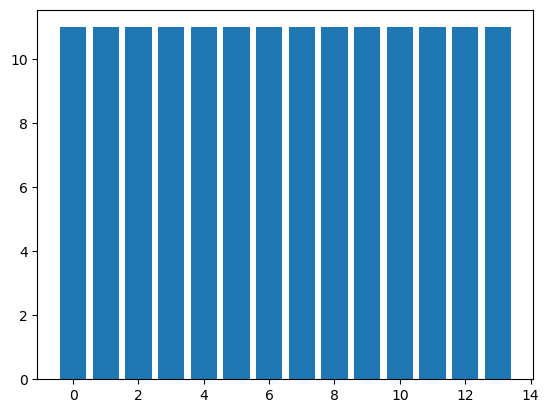

In [807]:
plt.bar(range(len(gen_vec)), gen_vec)

Text(0.5, 0, 'Parameter index')

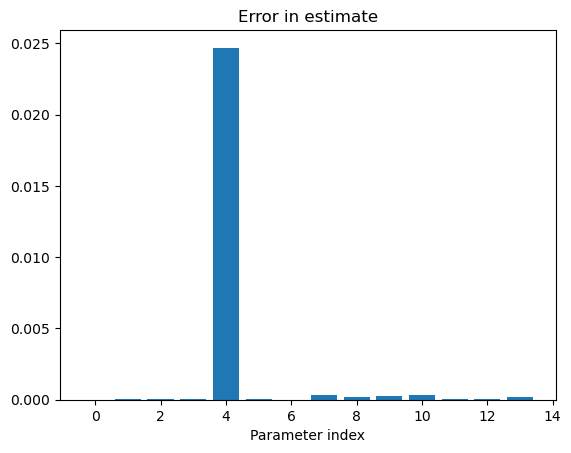

In [808]:
# plot the final estimate errors
plt.bar(range(len(x)), abs(x - evec))
plt.title('Error in estimate')
plt.xlabel('Parameter index')



In [809]:
for i in range(len(x)):
    print(f'Parameter {i} error: {abs(x[i] - evec[i])}, true value: {x[i]}, estimate: {evec[i]}')


Parameter 0 error: 3.465661919124785e-06, true value: -0.028942386030193487, estimate: -0.028945851692112612
Parameter 1 error: 1.8843145428877432e-05, true value: -0.004819023242843552, estimate: -0.004800180097414675
Parameter 2 error: 1.6555695714856947e-05, true value: -0.009901485518121802, estimate: -0.00991804121383666
Parameter 3 error: 1.5872719283063774e-05, true value: 0.06003884488115384, estimate: 0.0600547176004369
Parameter 4 error: 0.024685326515485613, true value: 0.0446716077825502, estimate: 0.019986281267064587
Parameter 5 error: 2.459282726389317e-05, true value: -0.02949665068465509, estimate: -0.029521243511918982
Parameter 6 error: 9.20139232025996e-06, true value: 0.08366642883672884, estimate: 0.0836756302290491
Parameter 7 error: 0.0003506001305614431, true value: -0.11180286119828407, estimate: -0.11215346132884552
Parameter 8 error: 0.00017840494555962372, true value: -0.1307771924147351, estimate: -0.13095559736029472
Parameter 9 error: 0.00024440714930235

In [810]:
for circ in circ_list:
    print(circ)
    print('')

Qubit Q1 ---|rho0|-|Gx_01_Q1|-|Mdefault|---
Qubit Q2 ---|rho0|-|        |-|Mdefault|---


Qubit Q1 ---|rho0|-|Gx_01_Q1|-|Gx_01_Q1|-|Mdefault|---
Qubit Q2 ---|rho0|-|        |-|        |-|Mdefault|---


Qubit Q1 ---|rho0|-|Gx_01_Q1|-|Gx_01_Q1|-|Gx_01_Q1|-|Gx_01_Q1|-|Mdefault|---
Qubit Q2 ---|rho0|-|        |-|        |-|        |-|        |-|Mdefault|---


Qubit Q1 ---|rho0|-|Gx_01_Q1|-|Gx_01_Q1|-|Gx_01_Q1|-|Gx_01_Q1|-|Gx_01_Q1|-|Gx_01_Q1|-|Gx_01_Q1|-|Gx_01_Q1|-|Mdefault|---
Qubit Q2 ---|rho0|-|        |-|        |-|        |-|        |-|        |-|        |-|        |-|        |-|Mdefault|---


Qubit Q1 ---|rho0|-|Gx_01_Q1|-|Gx_01_Q1|-|Gx_01_Q1|-|Gx_01_Q1|-|Gx_01_Q1|-|Gx_01_Q1|-|Gx_01_Q1|-|Gx_01_Q1|-|Gx_01_Q1|-|Gx_01_Q1|-|Gx_01_Q1|-|Gx_01_Q1|-|Gx_01_Q1|-|Gx_01_Q1|-|Gx_01_Q1|-|Gx_01_Q1|-|Mdefault|---
Qubit Q2 ---|rho0|-|        |-|        |-|        |-|        |-|        |-|        |-|        |-|        |-|        |-|        |-|        |-|        |-|        |-|        |-|        |-|    

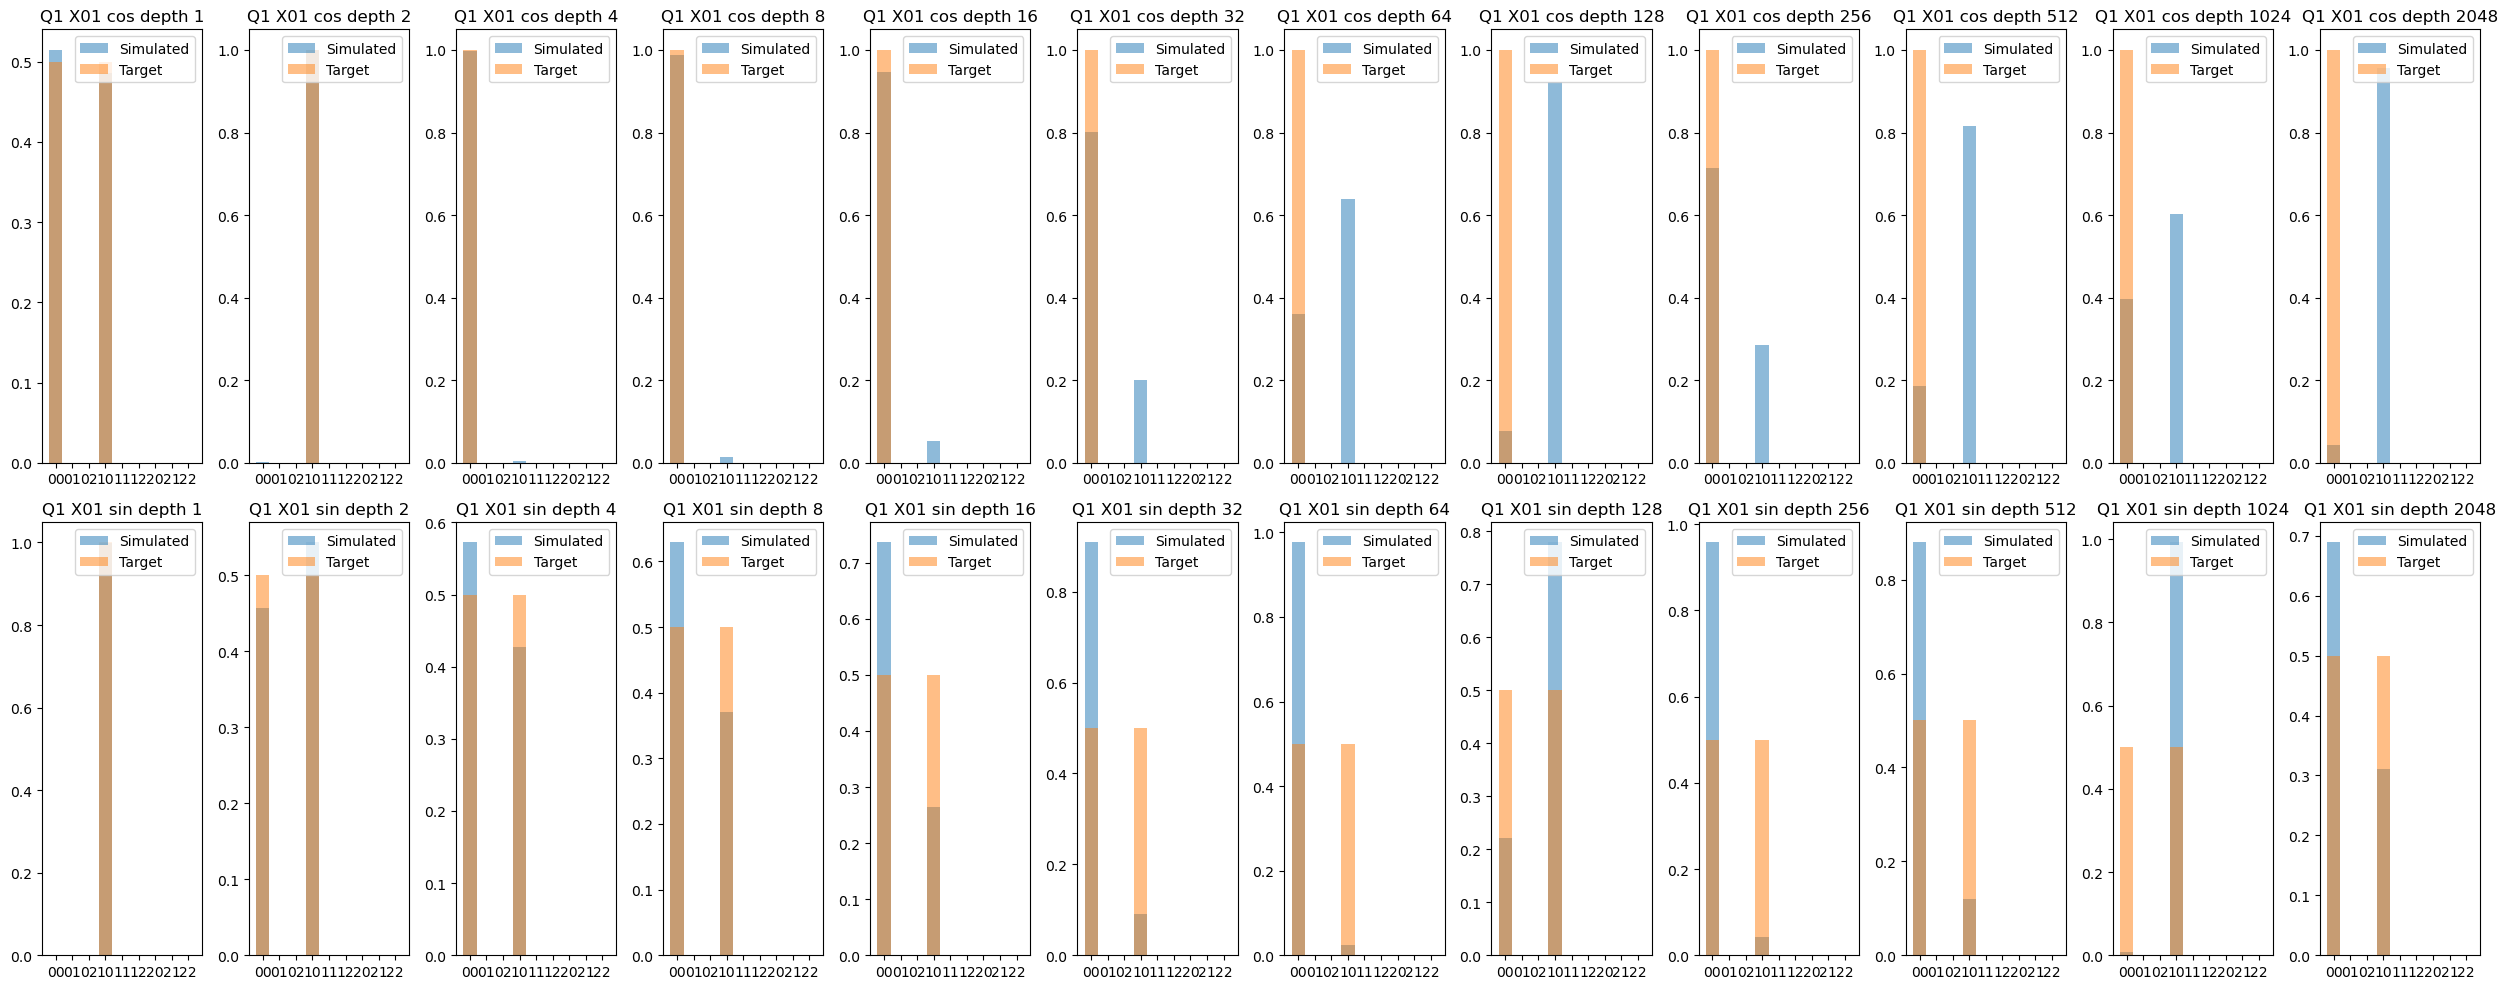

<Figure size 640x480 with 0 Axes>

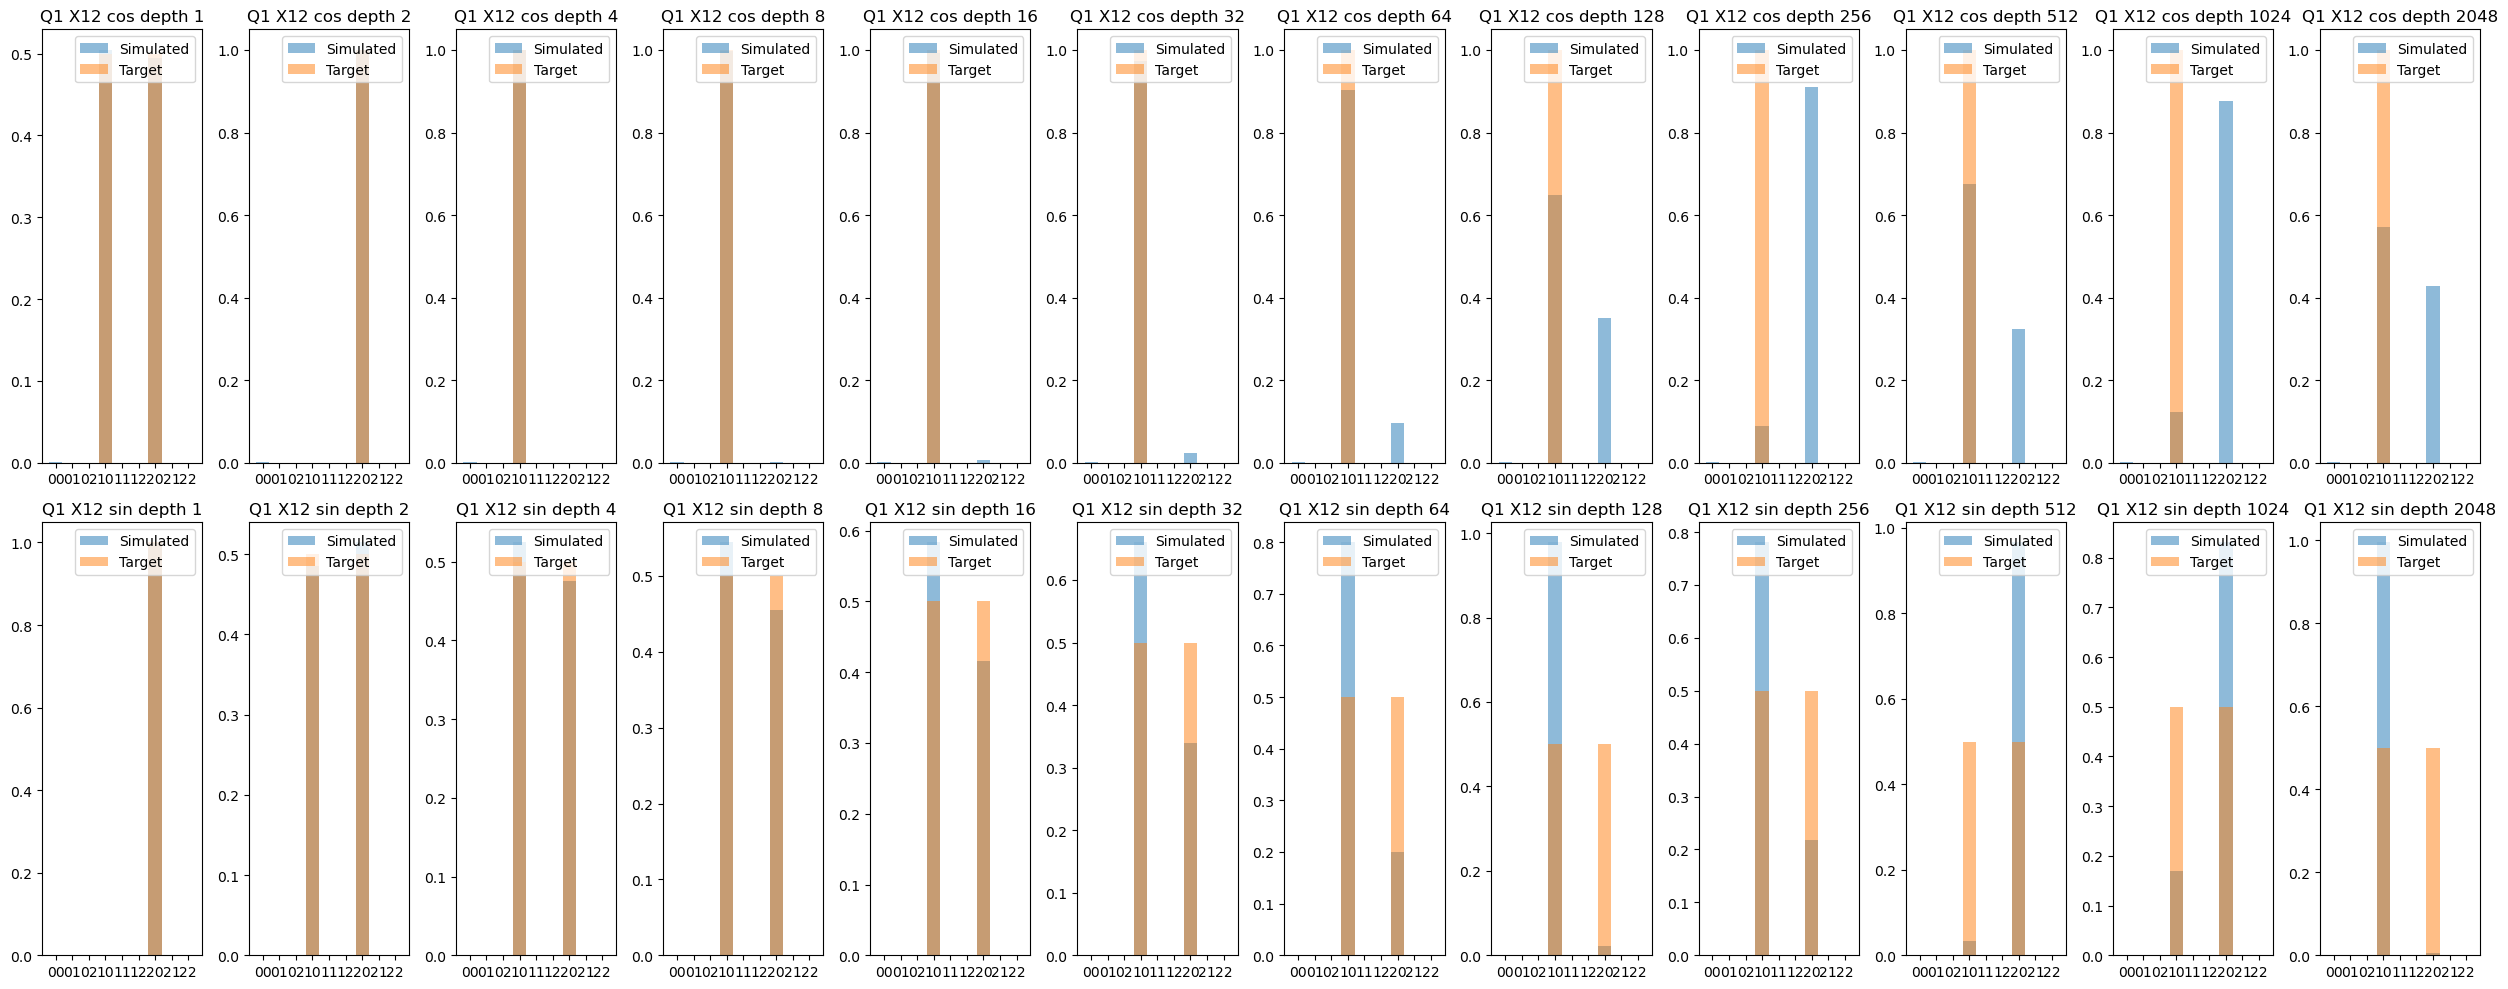

<Figure size 640x480 with 0 Axes>

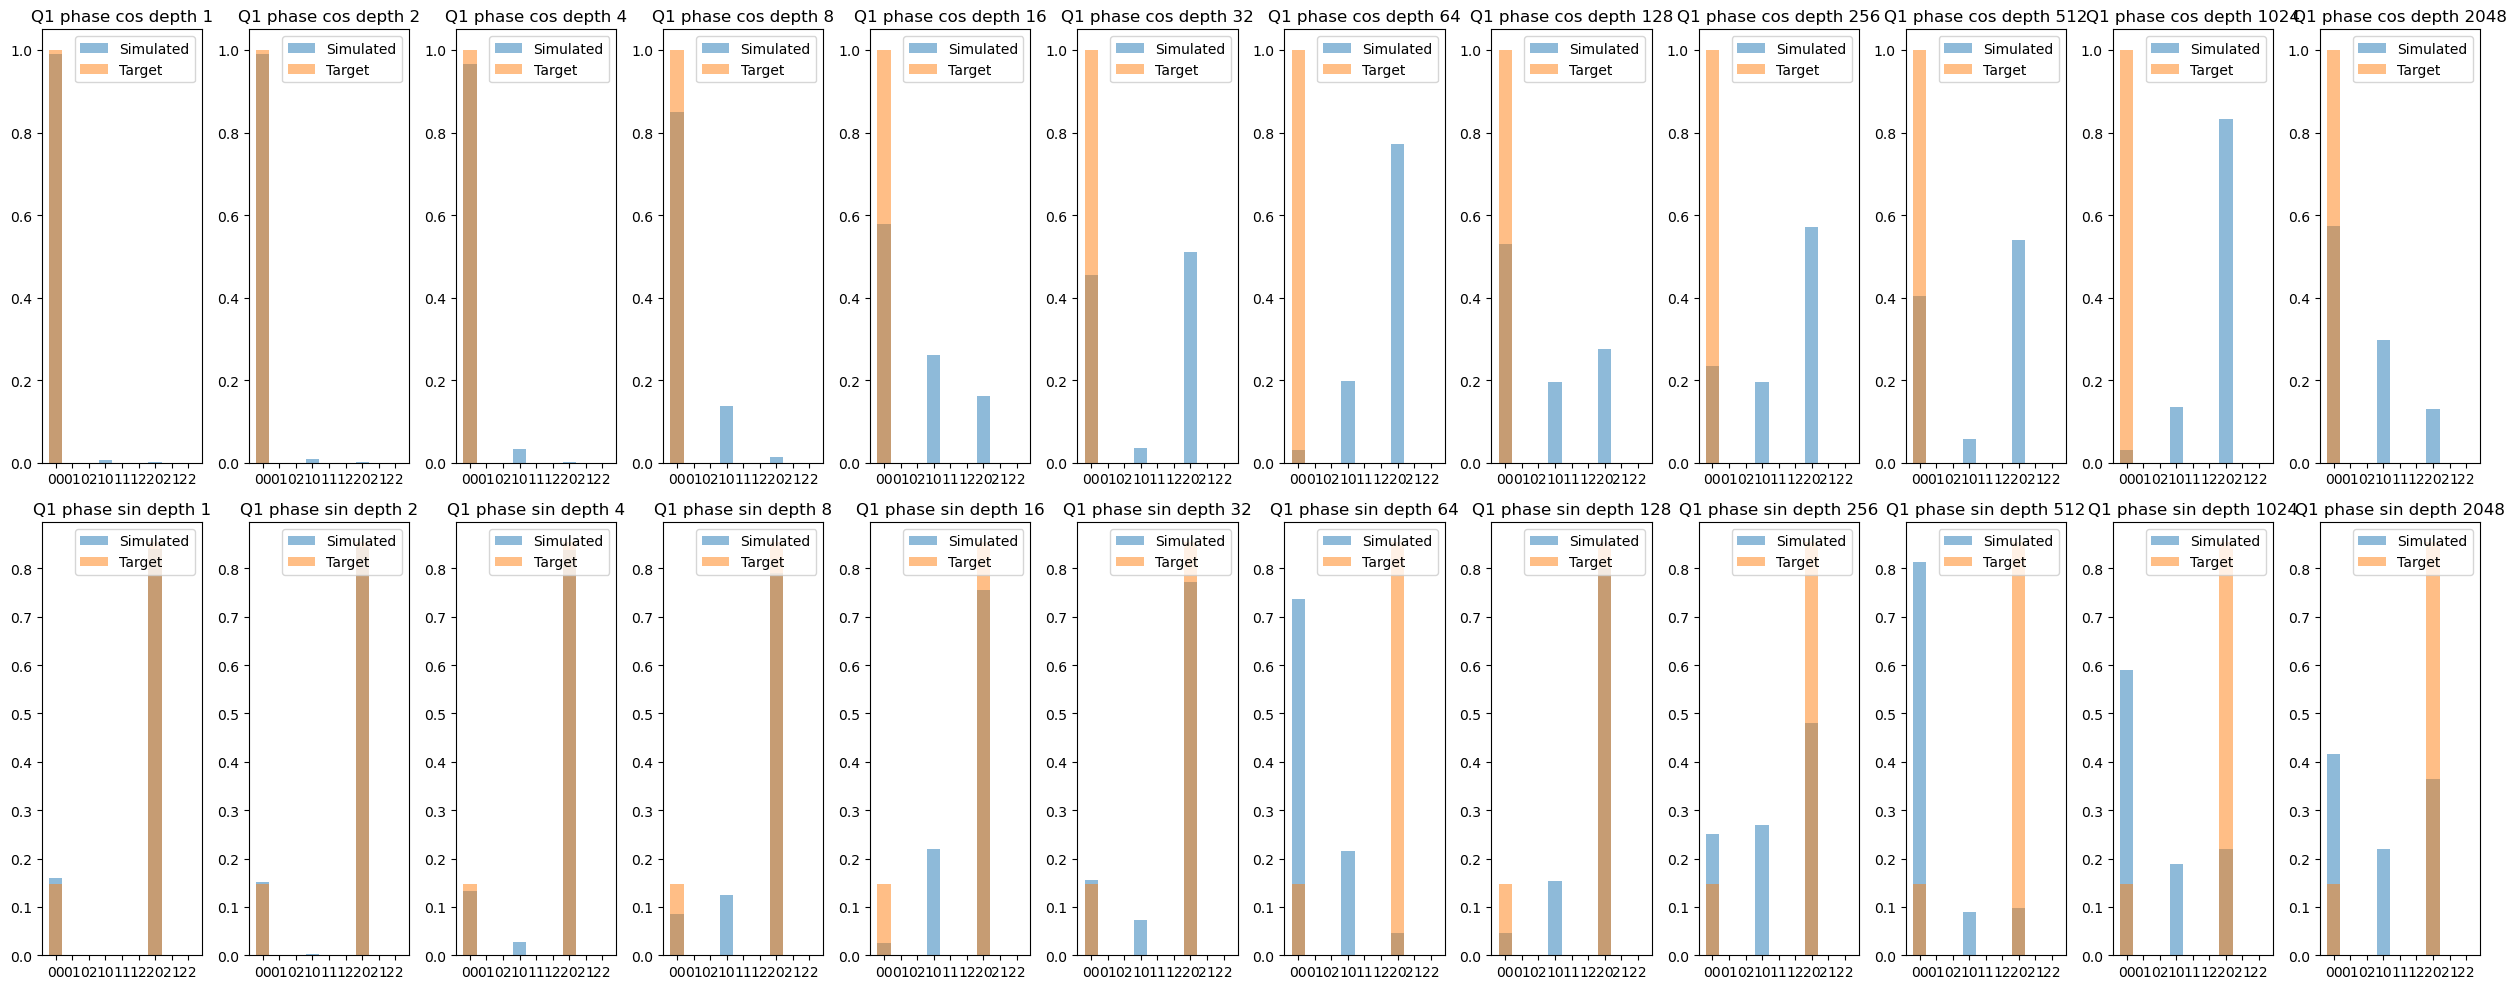

<Figure size 640x480 with 0 Axes>

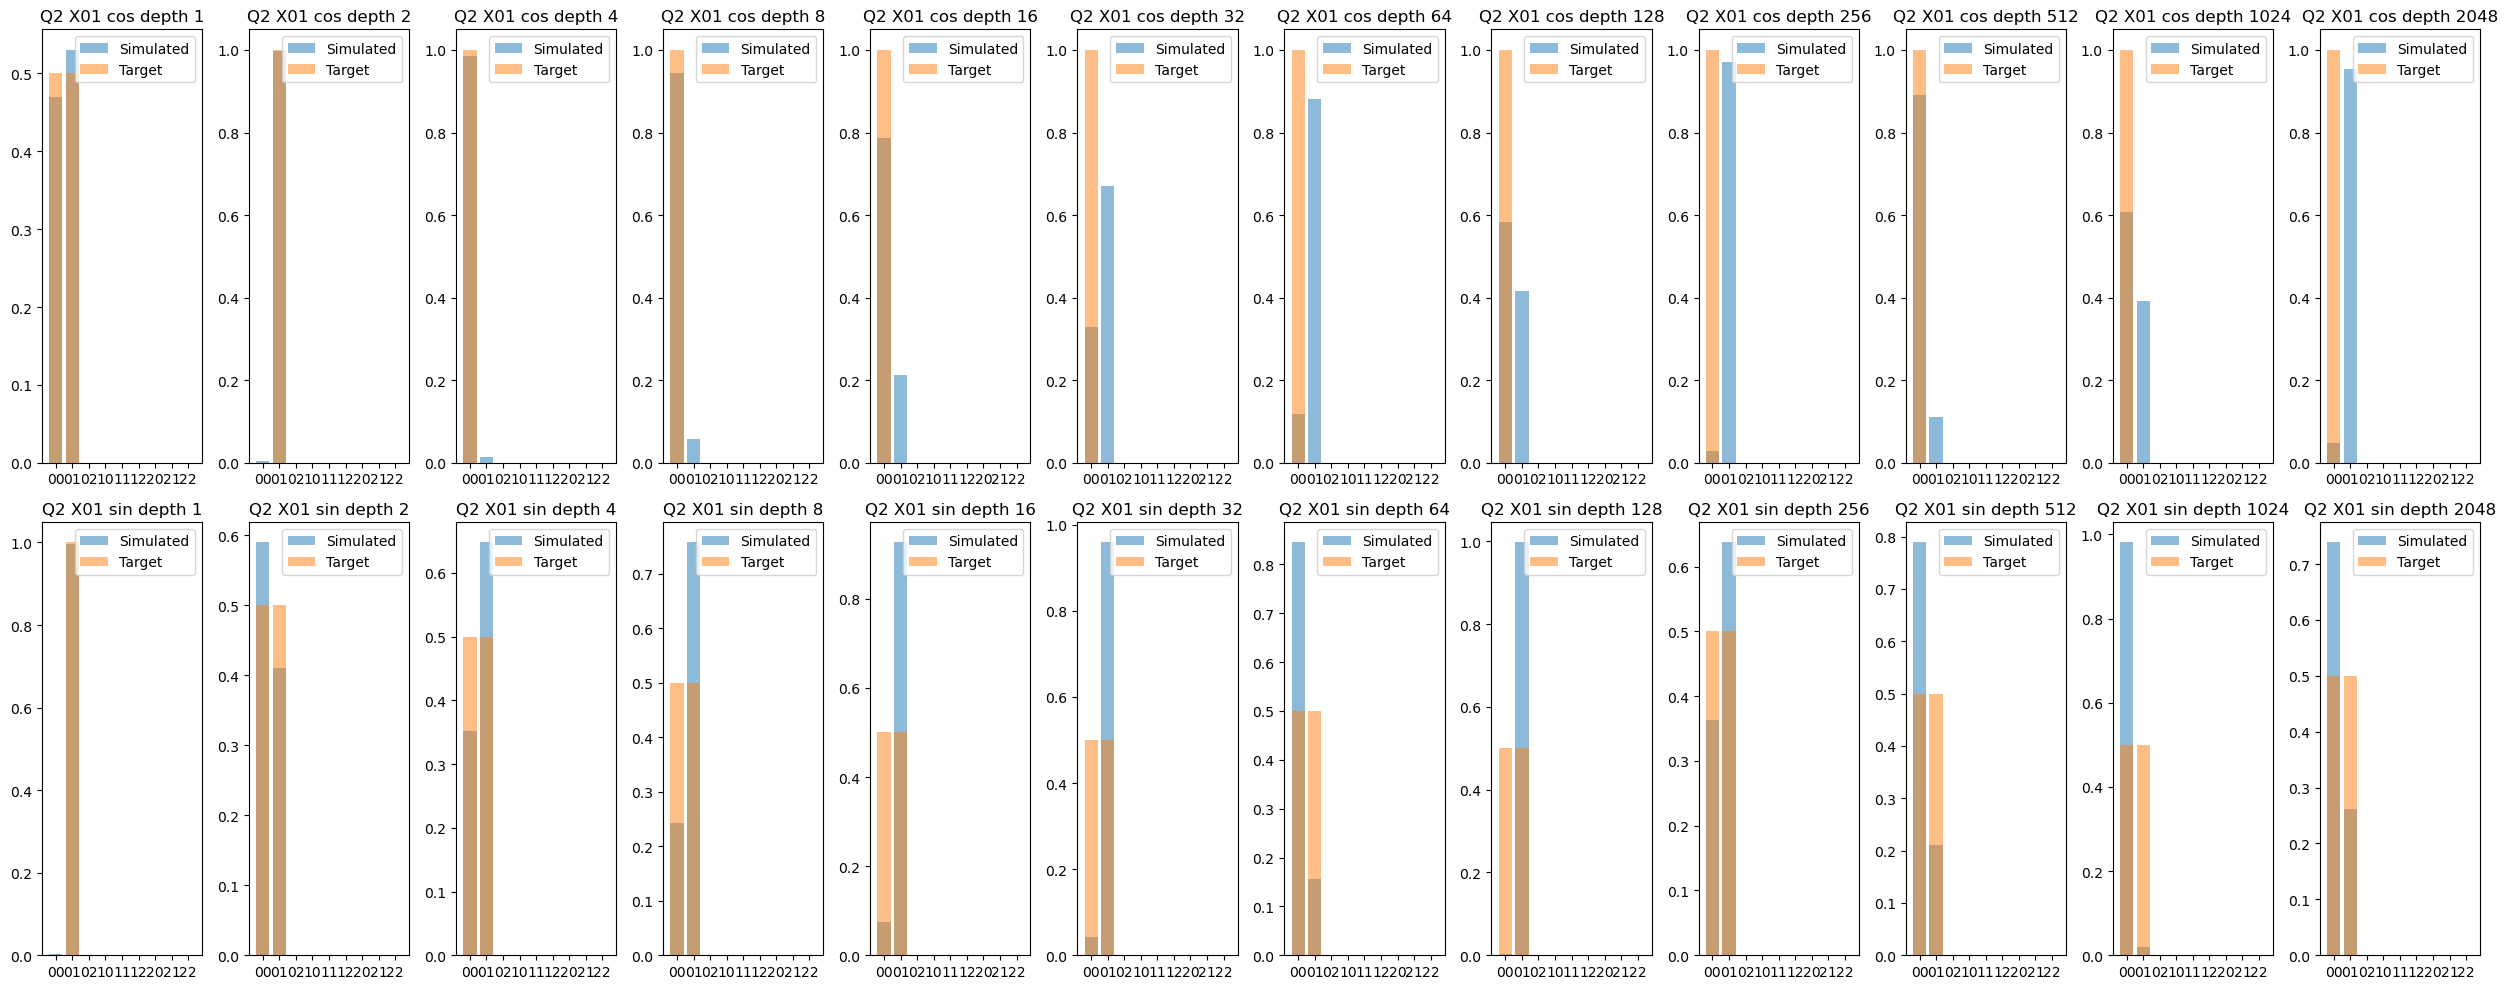

<Figure size 640x480 with 0 Axes>

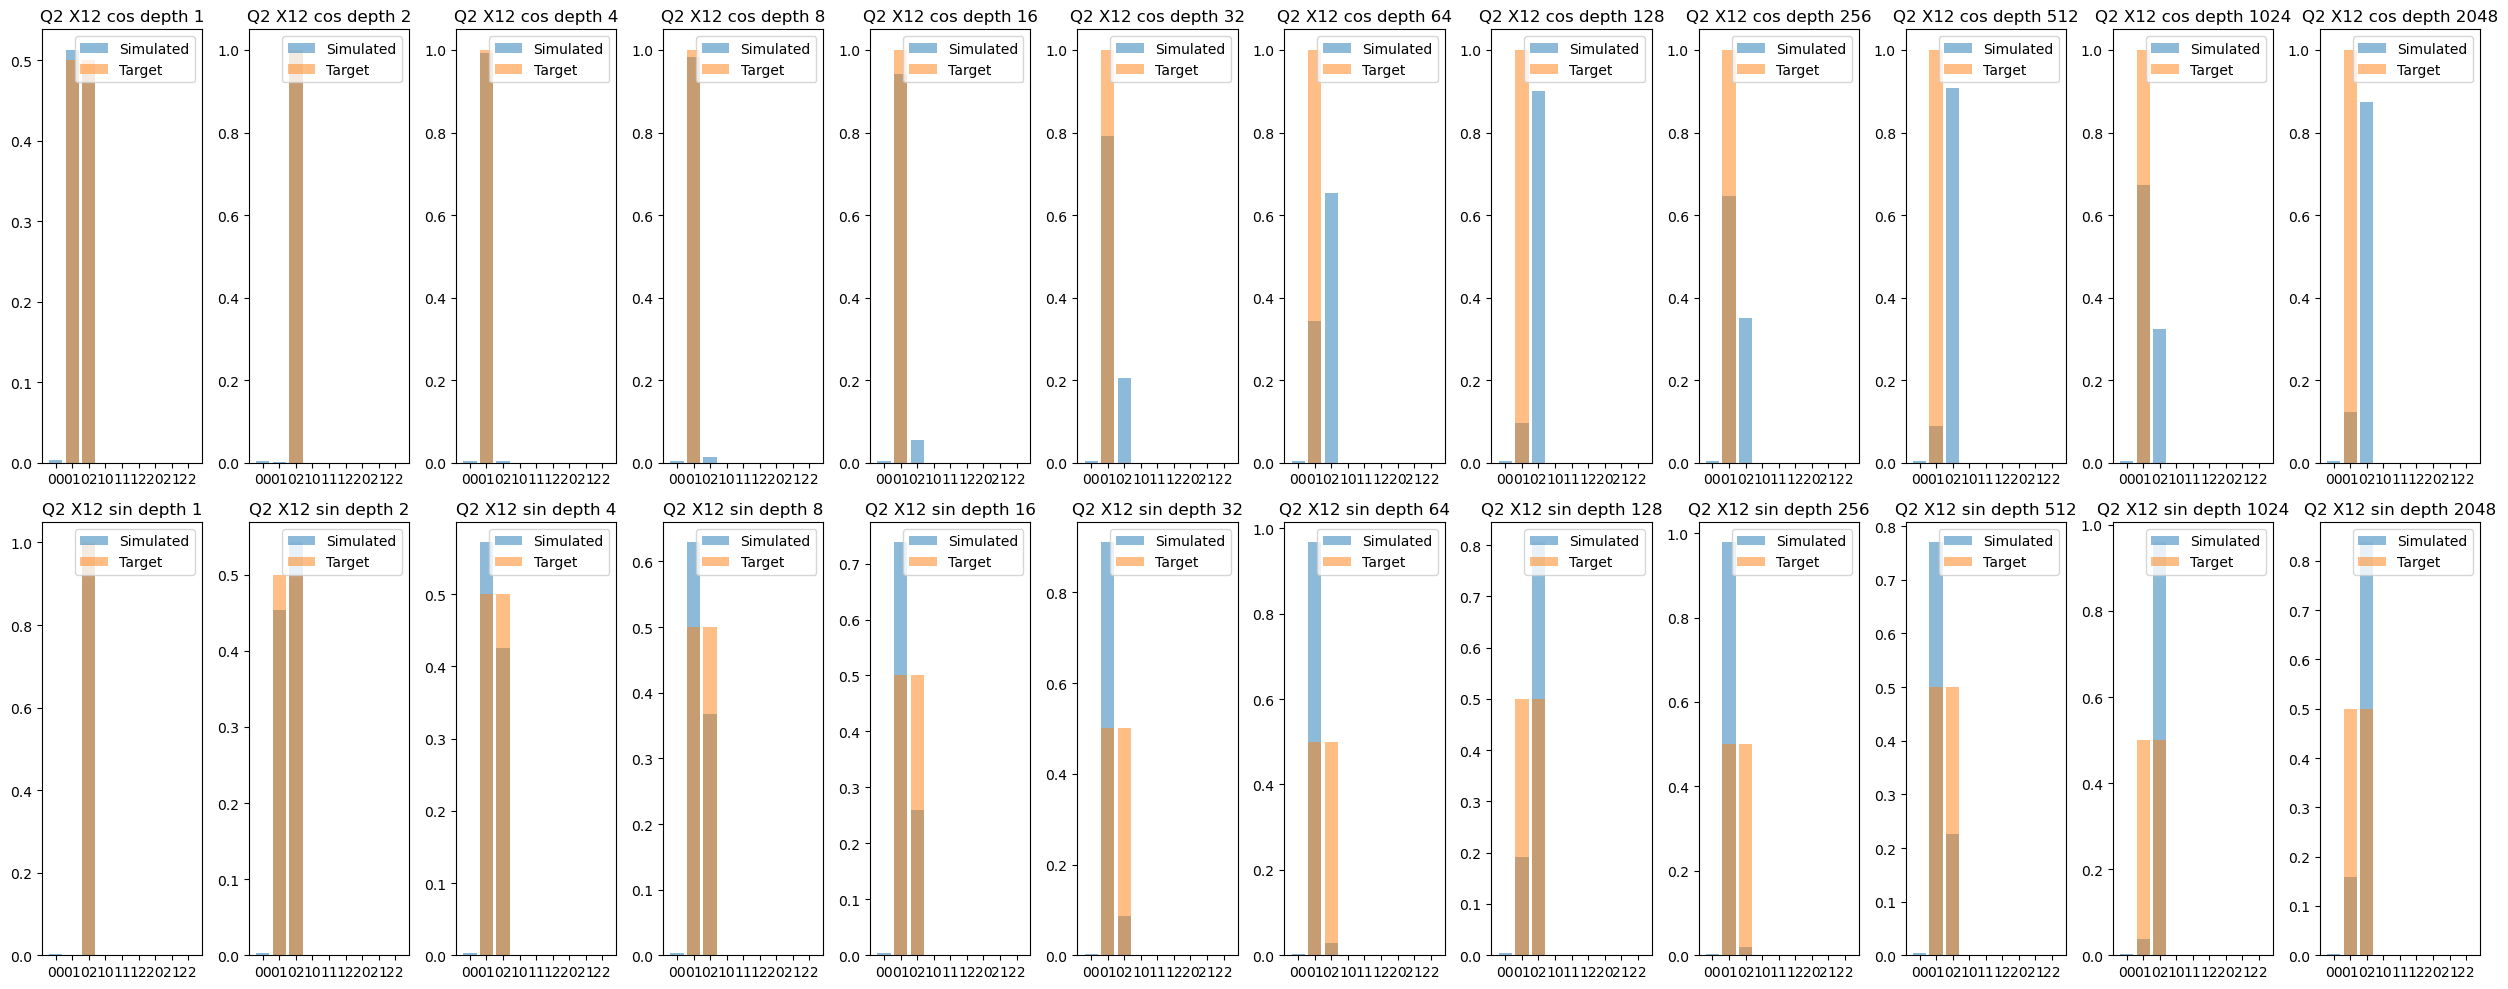

<Figure size 640x480 with 0 Axes>

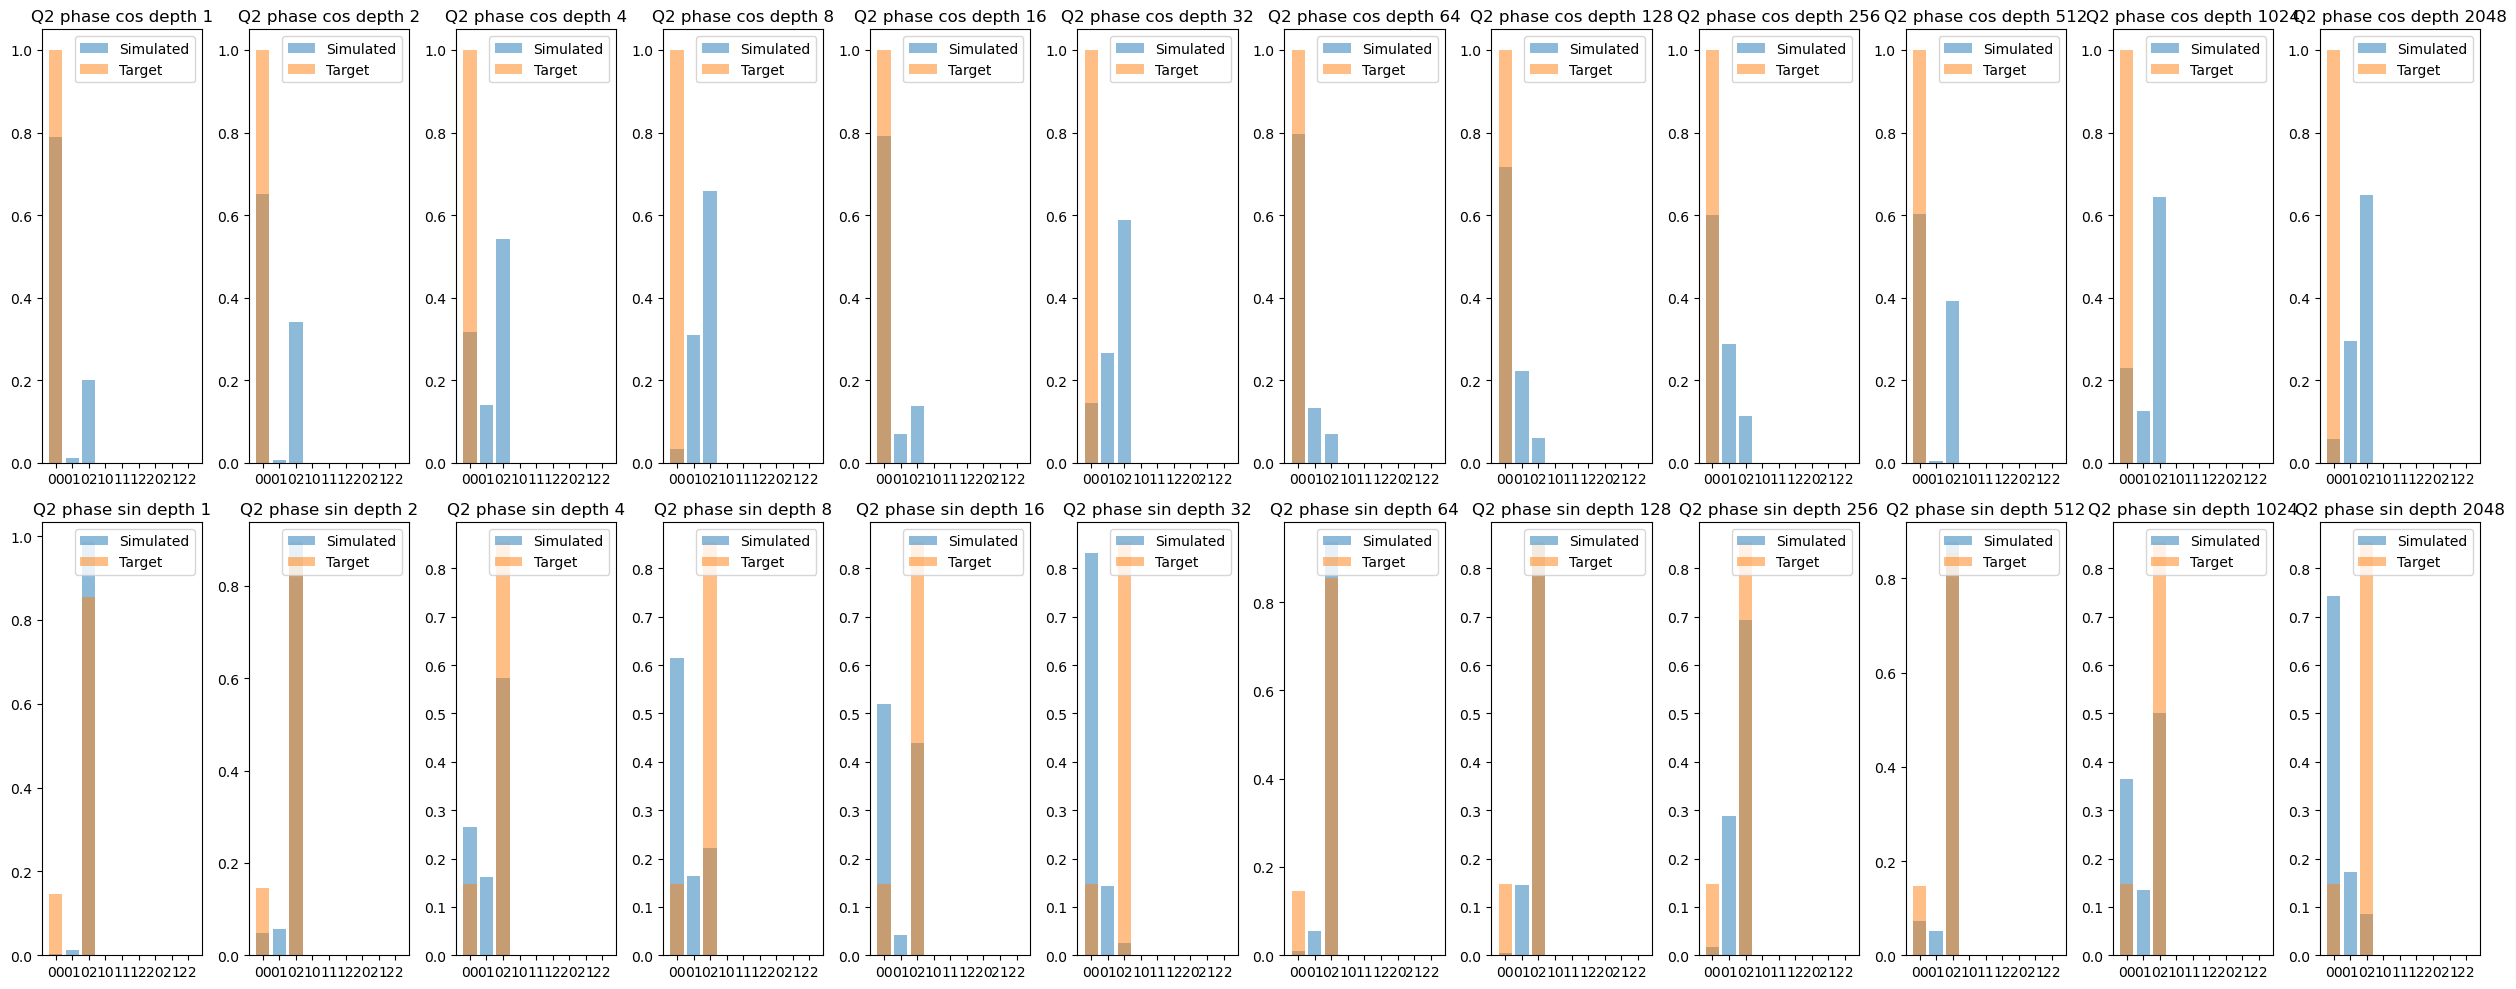

<Figure size 640x480 with 0 Axes>

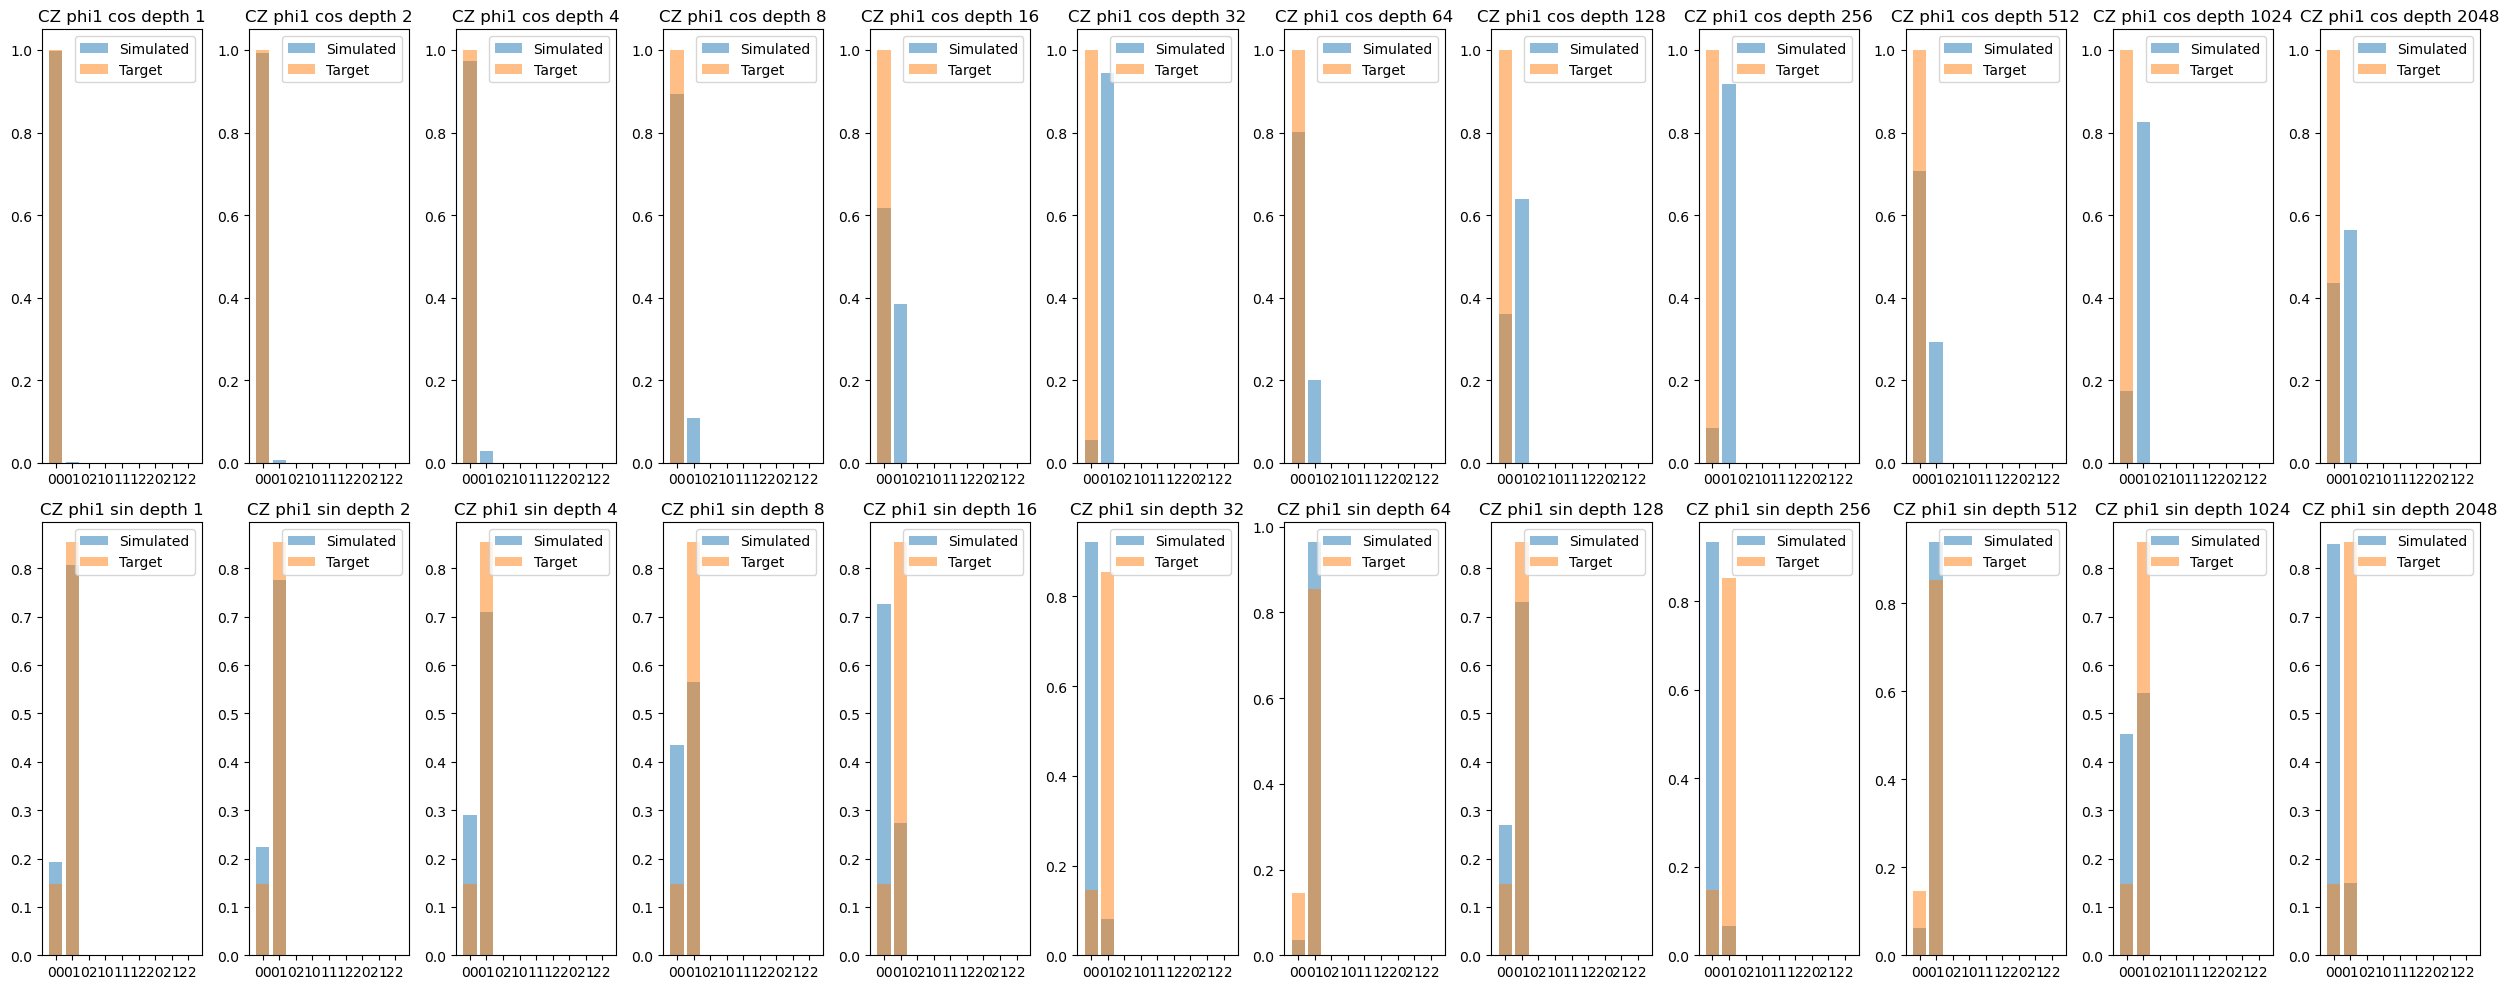

<Figure size 640x480 with 0 Axes>

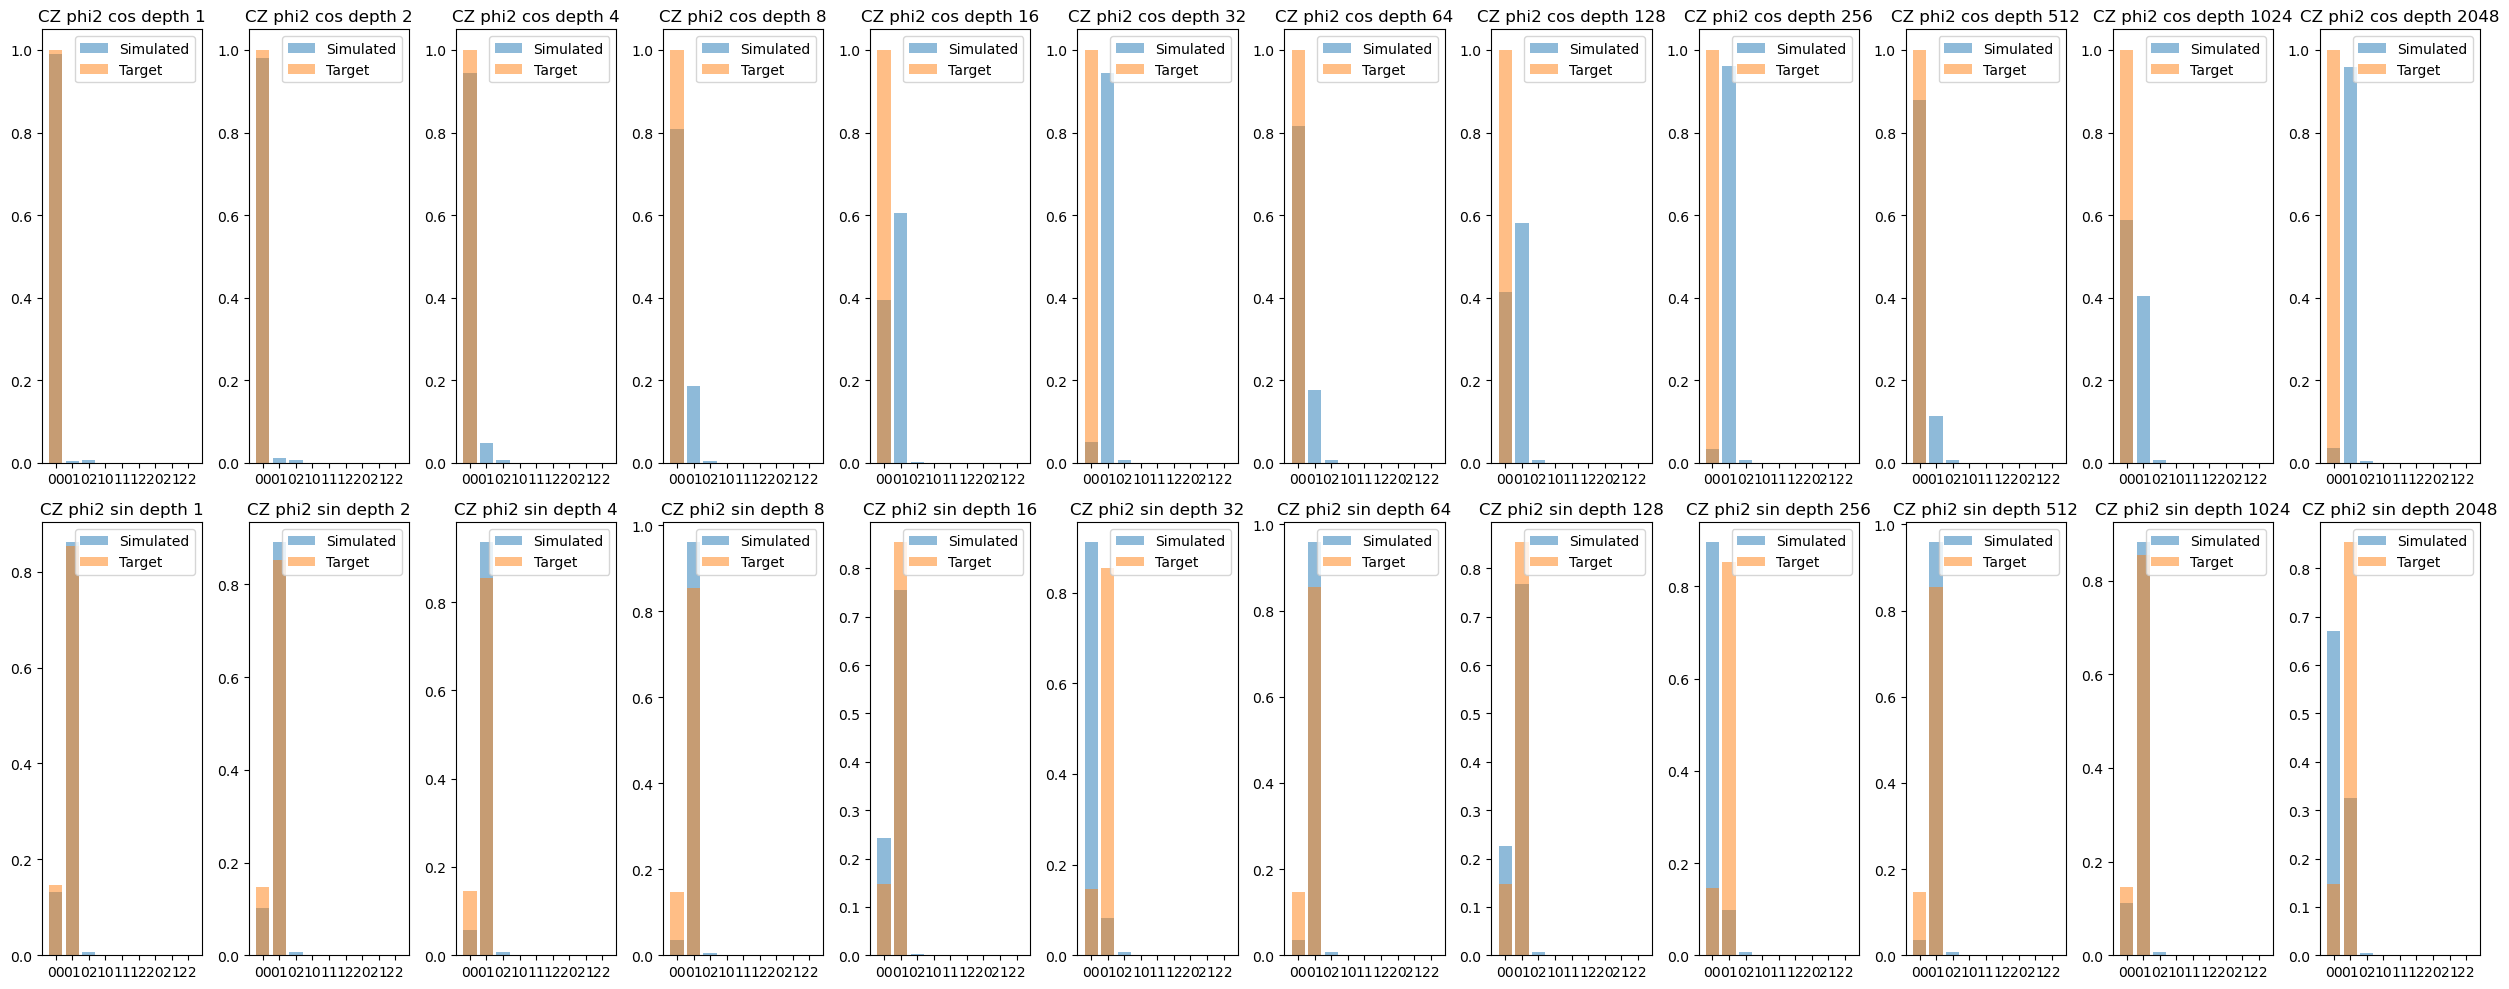

<Figure size 640x480 with 0 Axes>

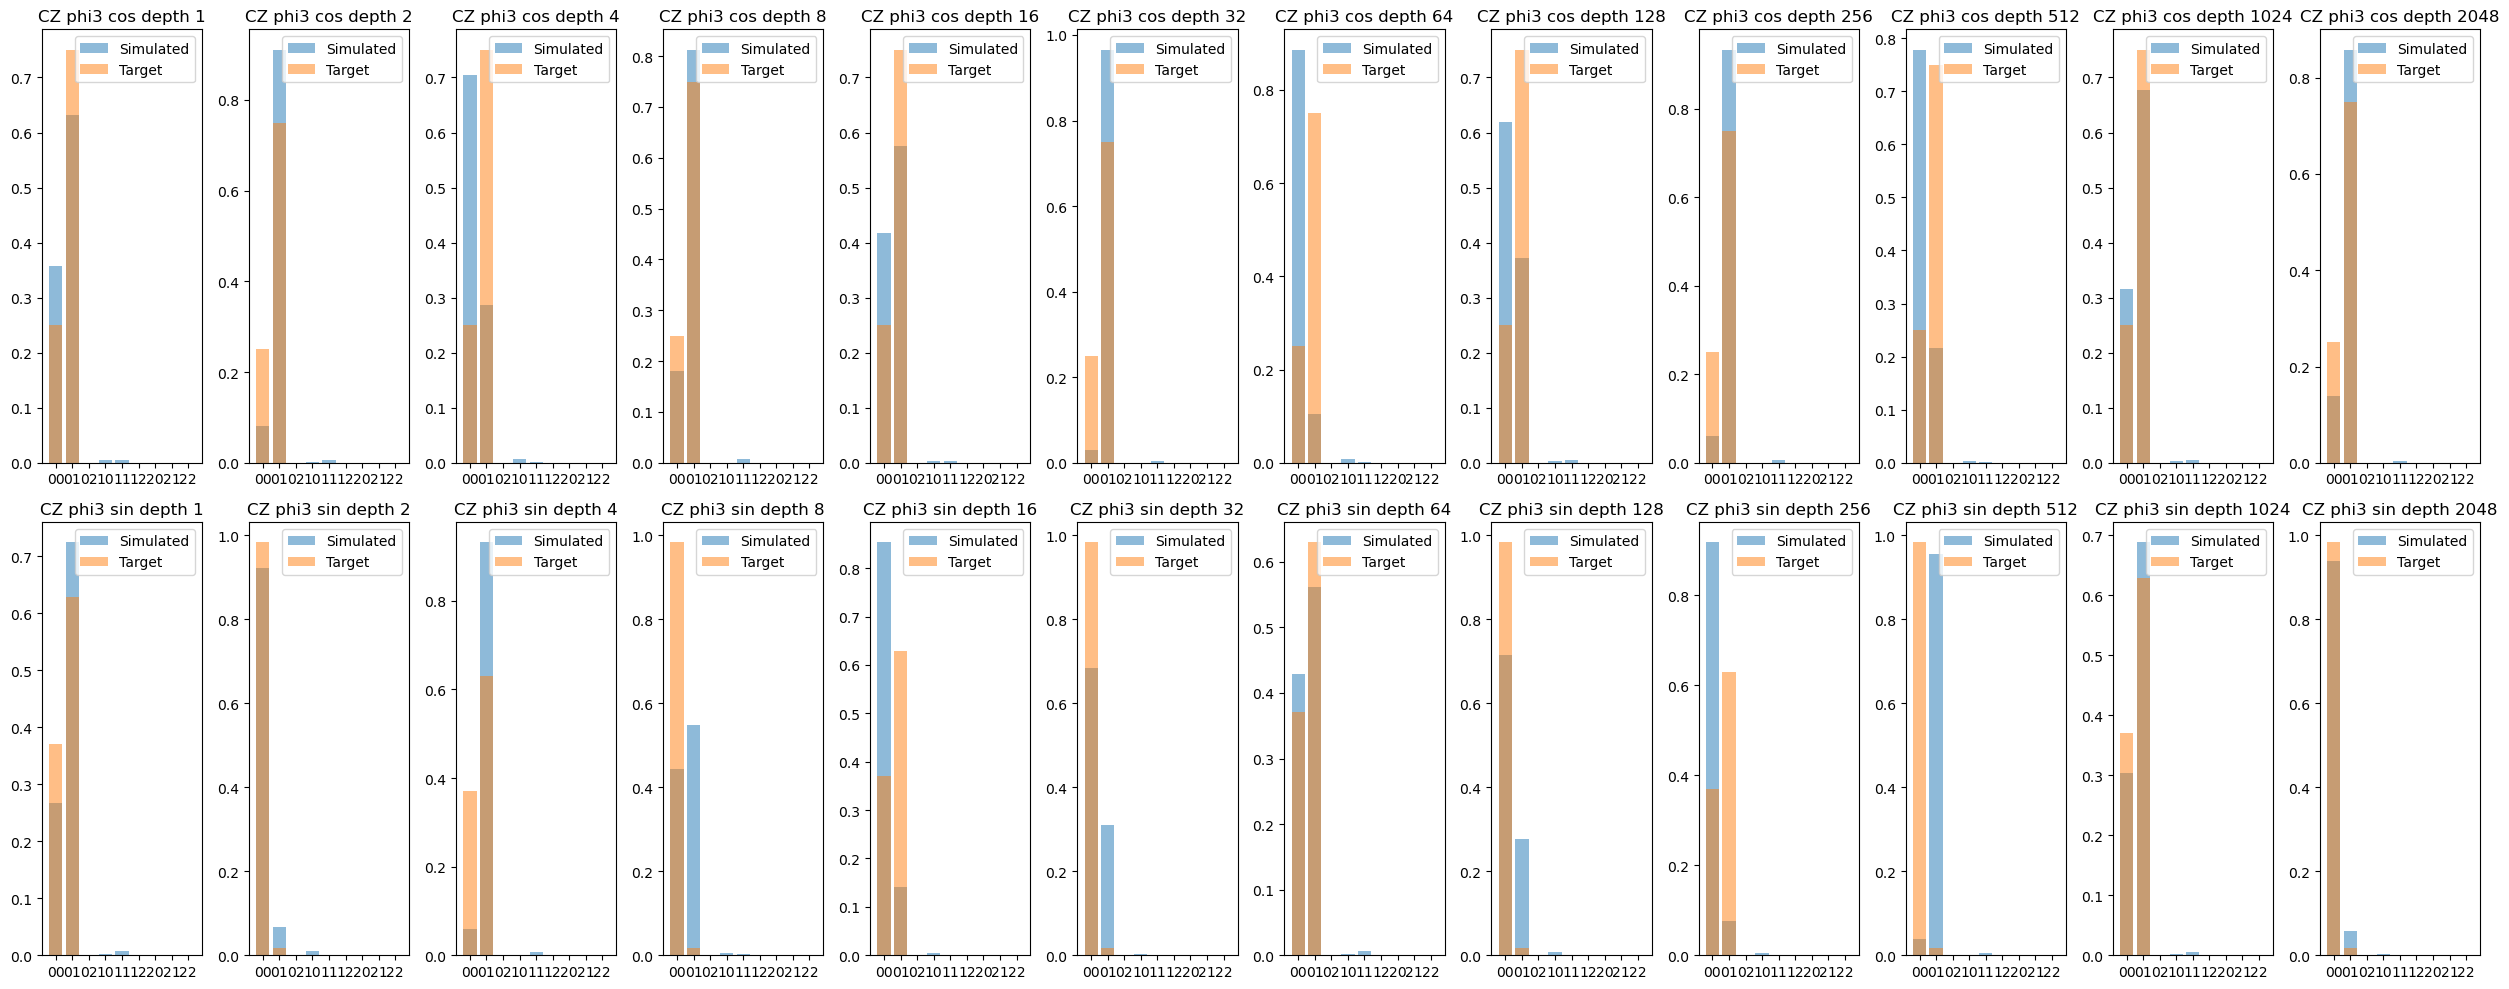

<Figure size 640x480 with 0 Axes>

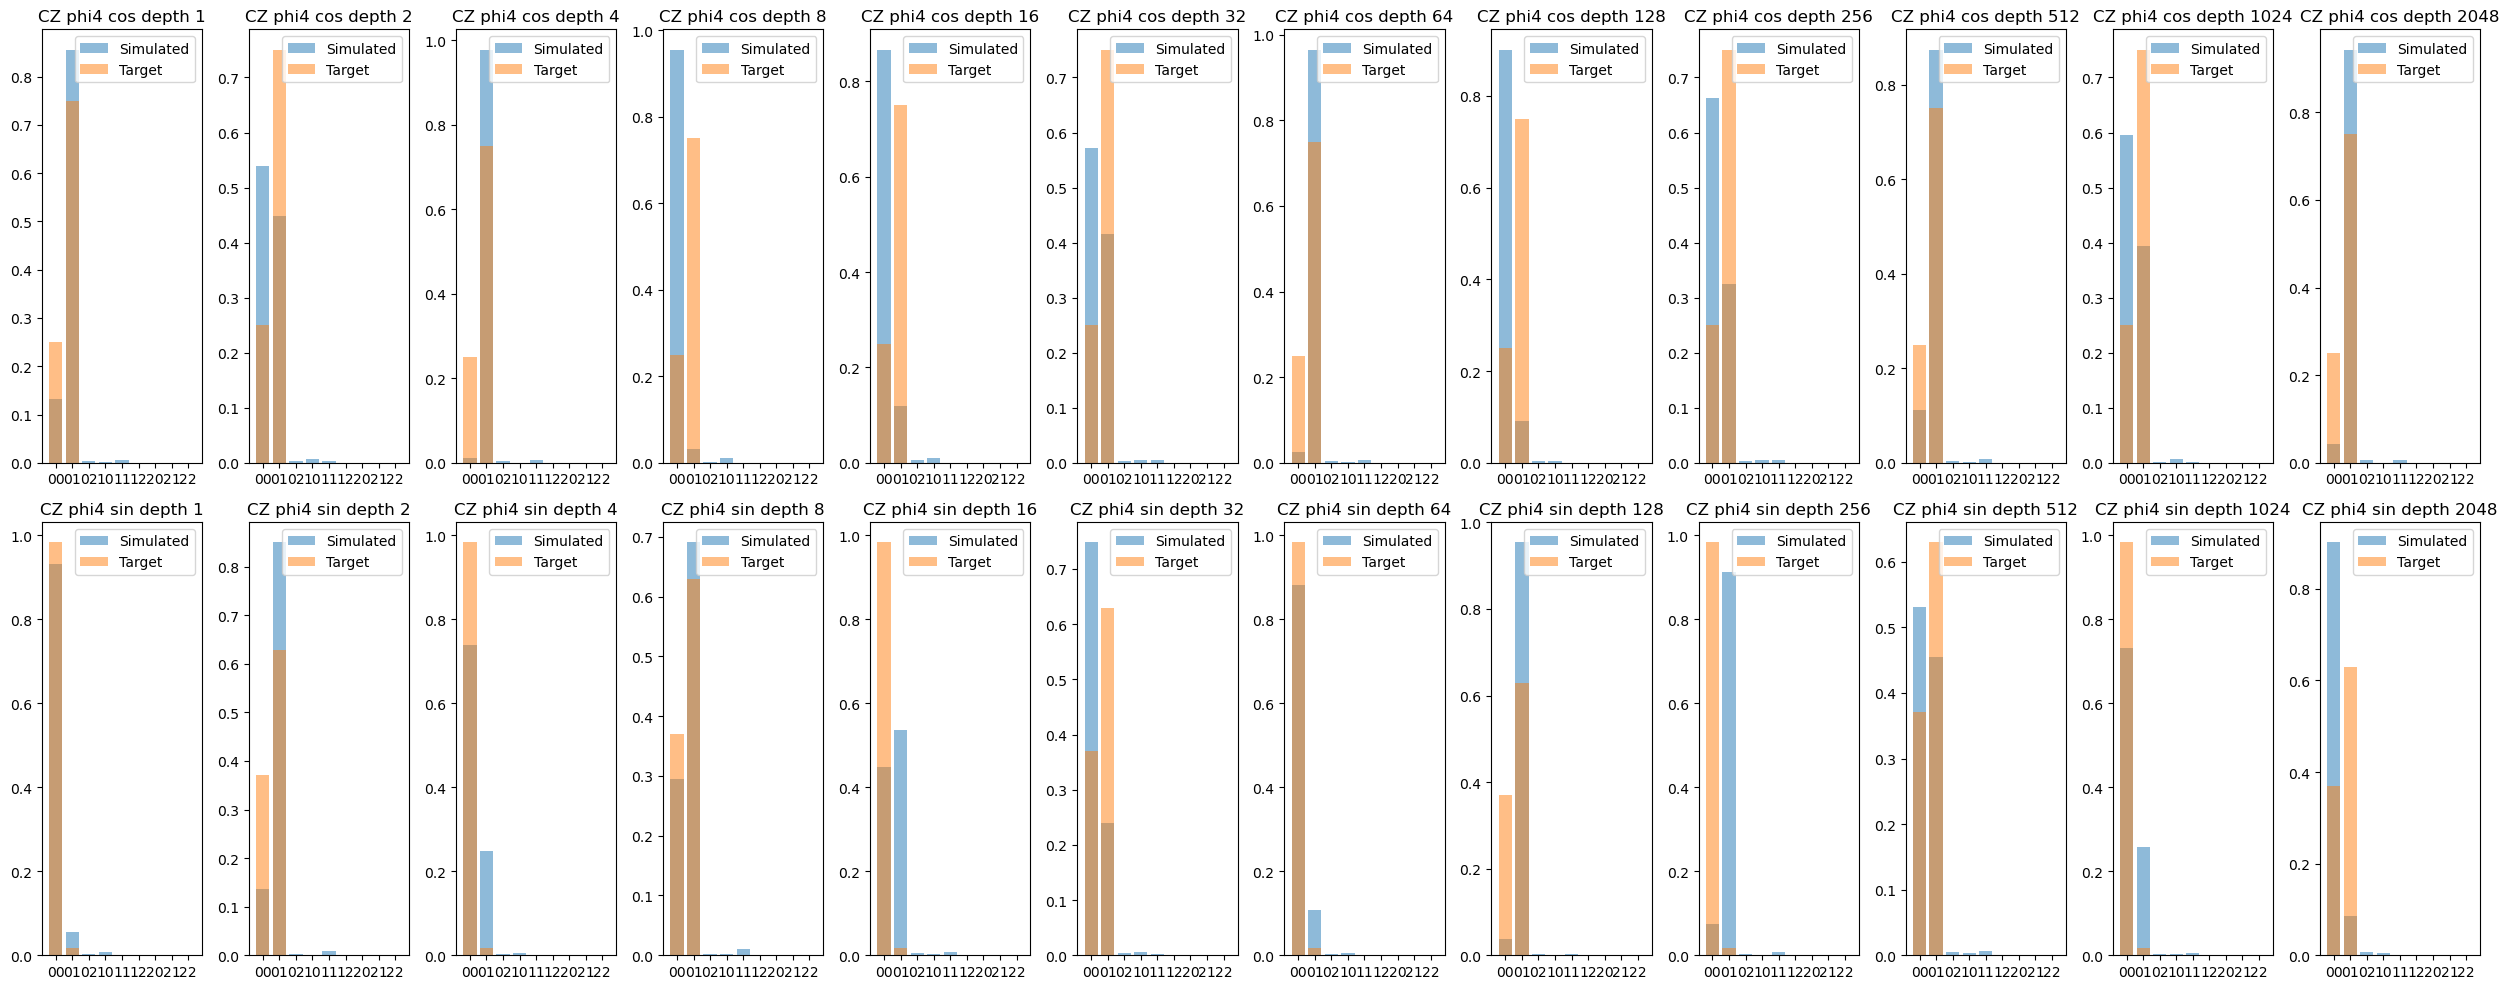

<Figure size 640x480 with 0 Axes>

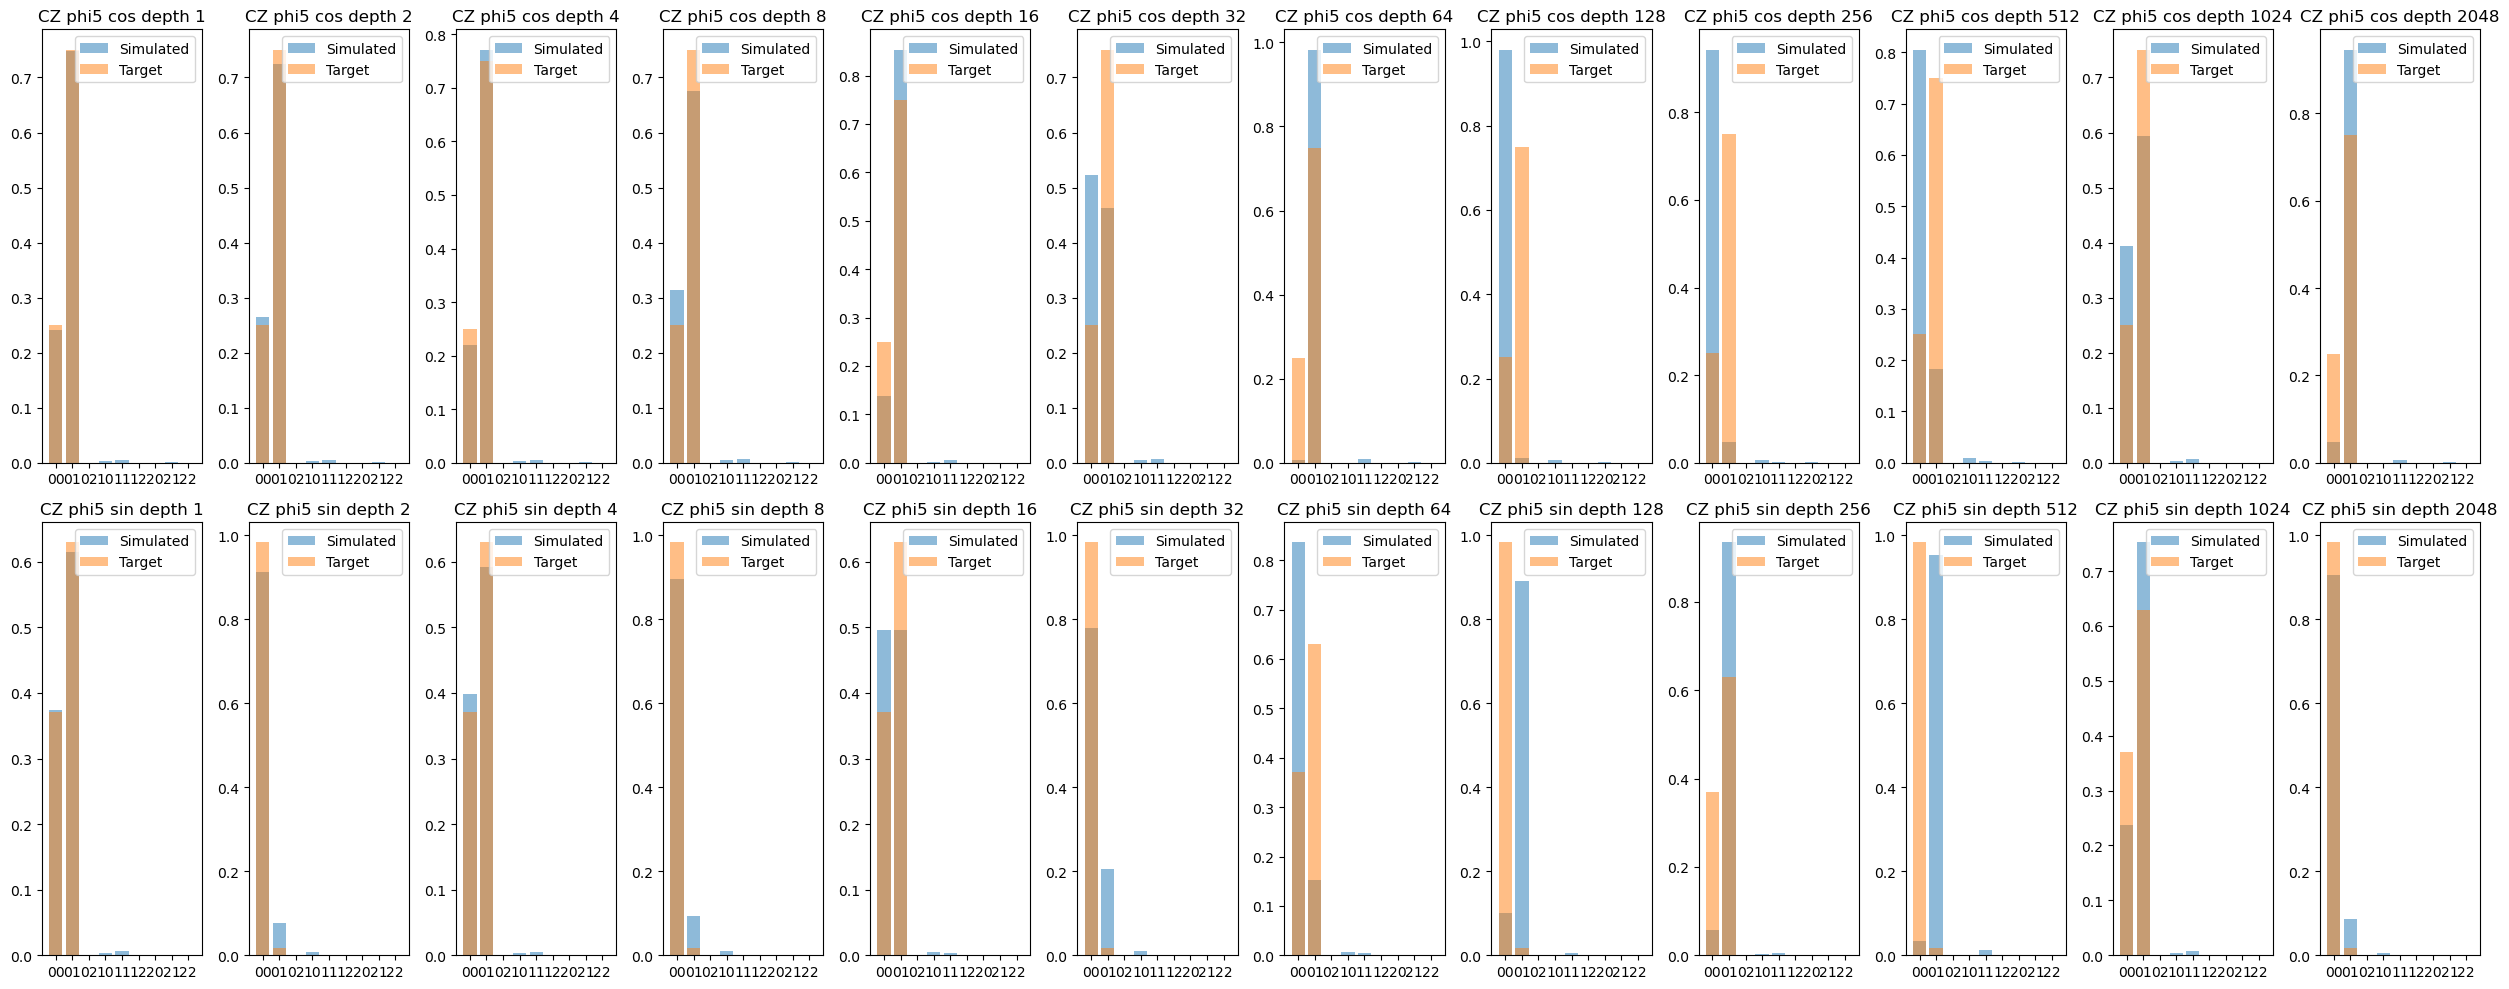

<Figure size 640x480 with 0 Axes>

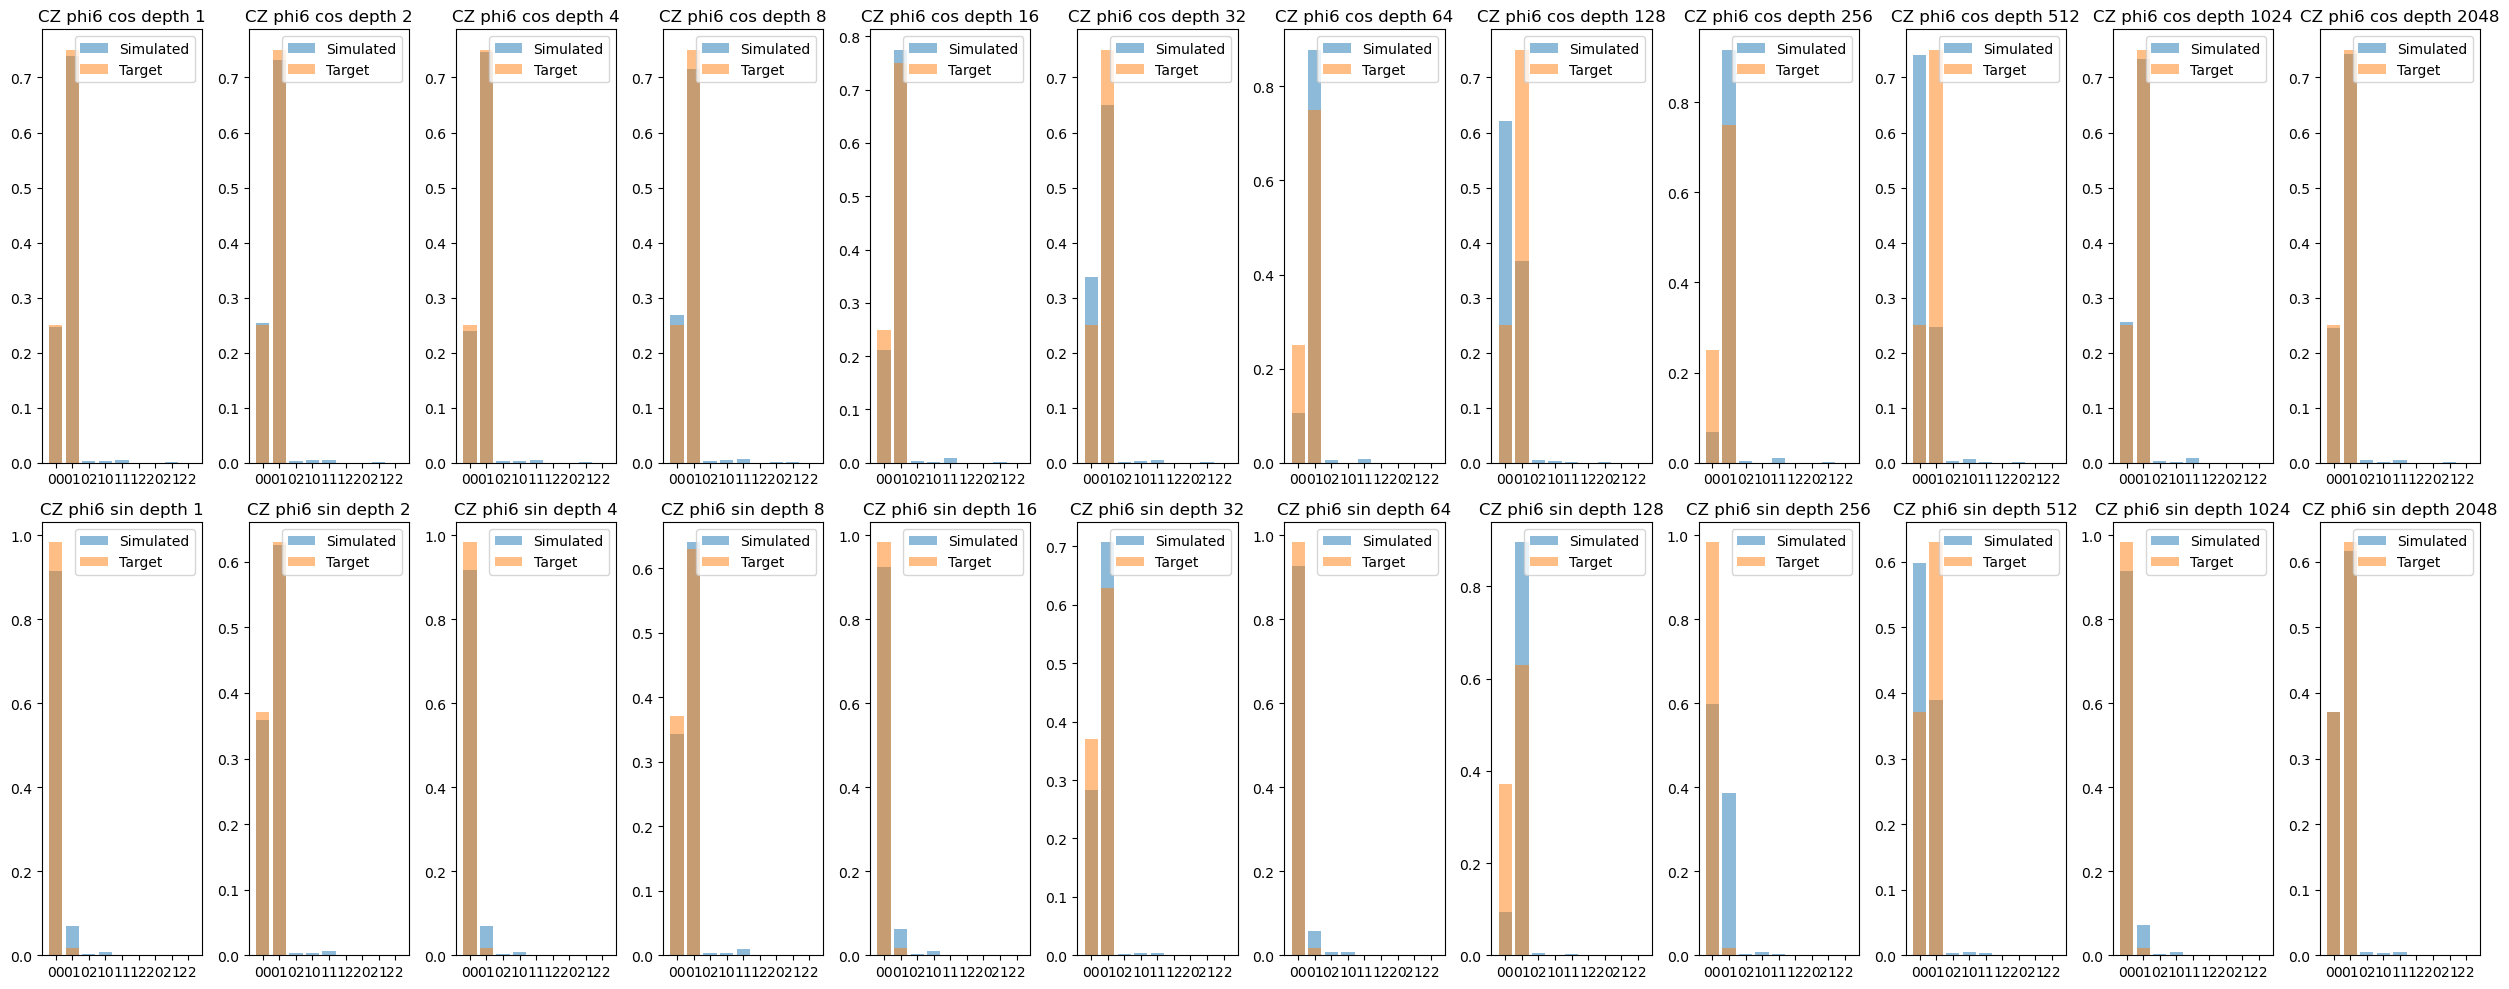

<Figure size 640x480 with 0 Axes>

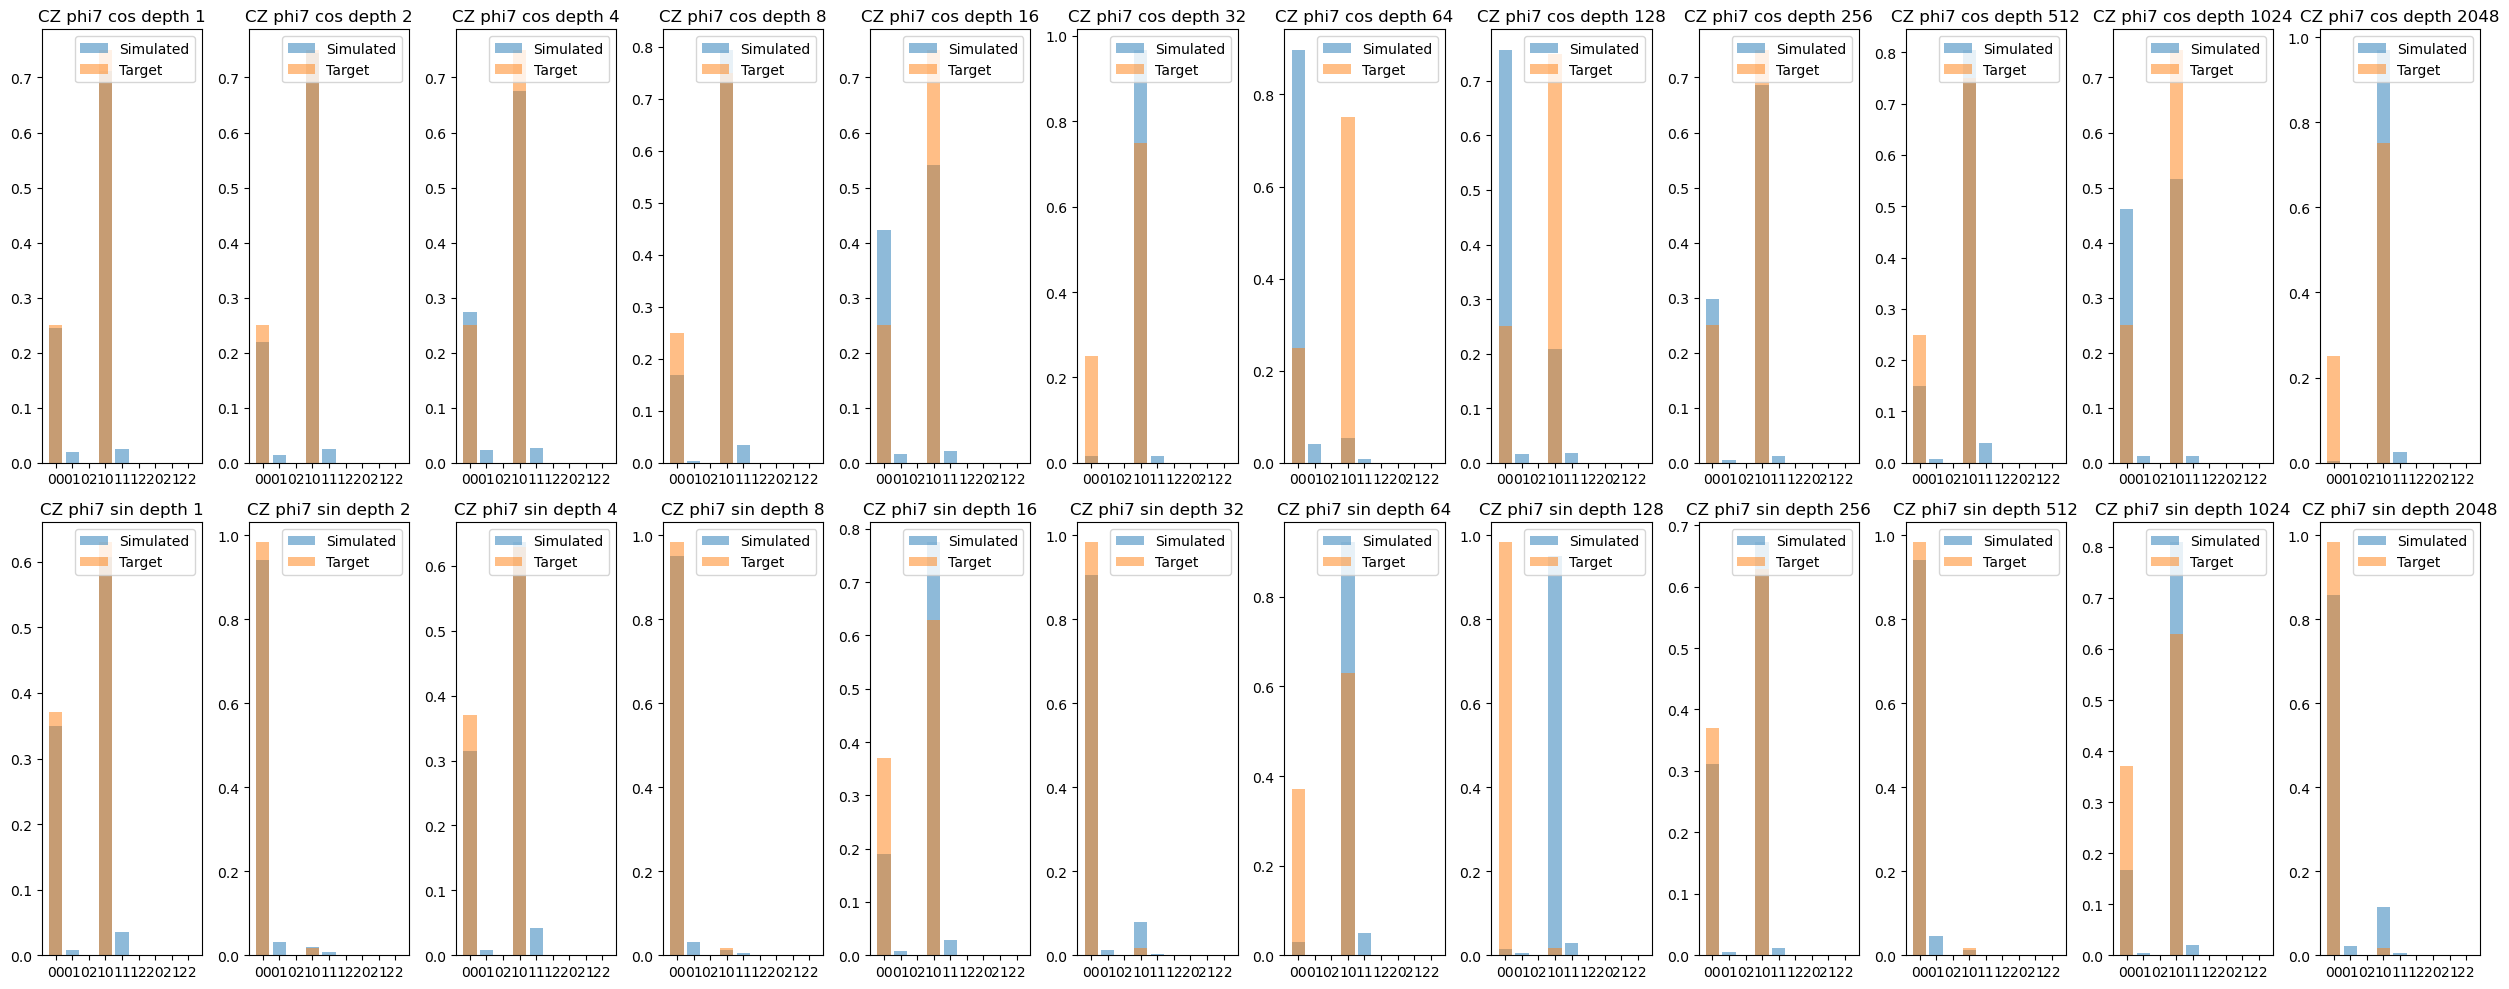

<Figure size 640x480 with 0 Axes>

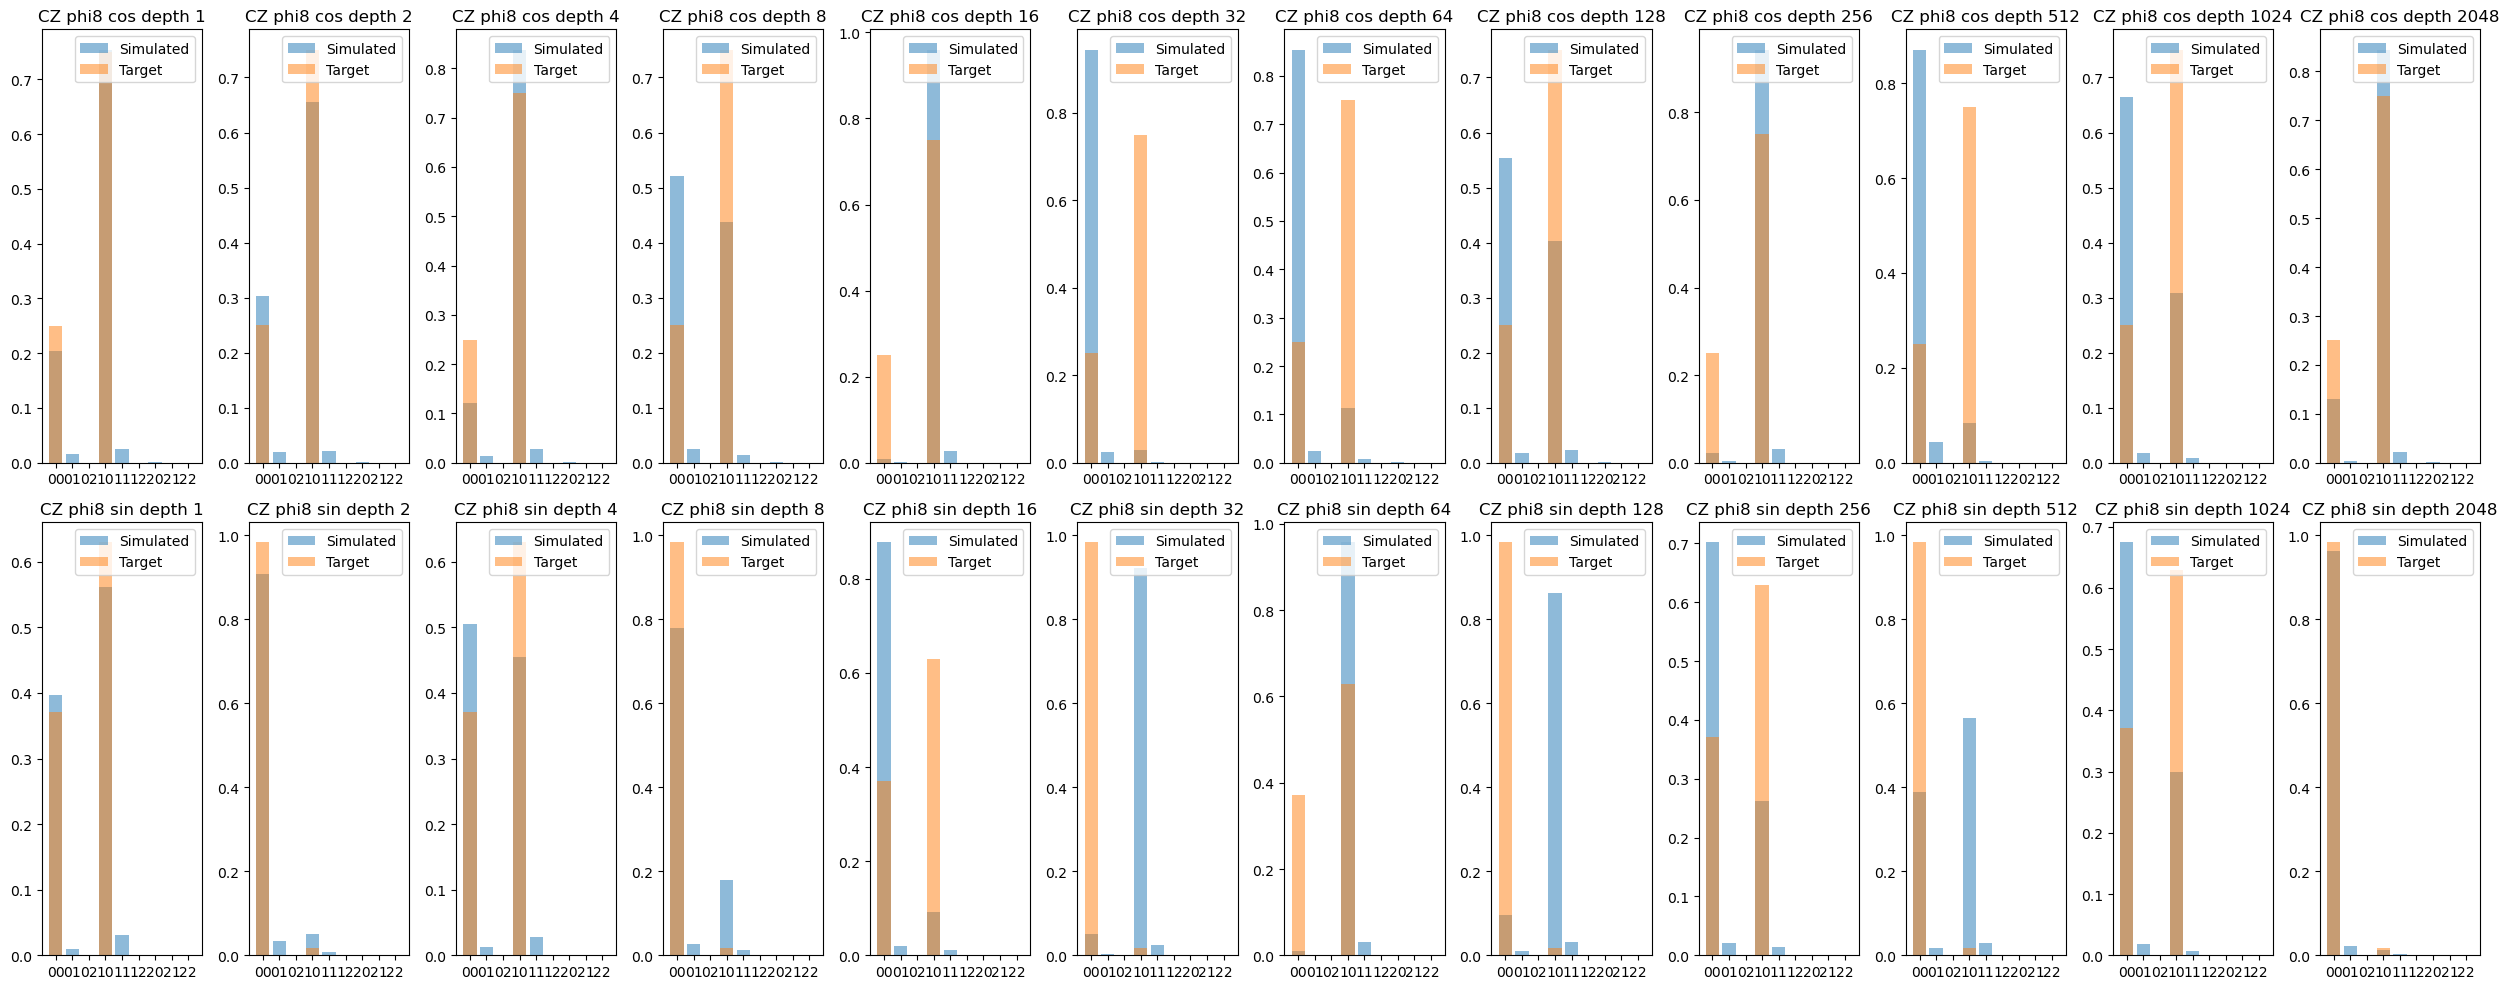

<Figure size 640x480 with 0 Axes>

In [811]:
plot_edesign_probability_from_model_and_target_2qt(edesign, depths, model, target_model)

# Save circuit list

In [825]:
depths = [2**i for i in range(6)]
edesign = make_two_qutrit_rpe_edesign_nocz(['Q1', 'Q2'], depths)
circ_list_nocz = edesign_to_circuit_list(edesign)
pygsti.io.write_circuit_list('circ_list_nocz.txt', circ_list_nocz)

In [826]:
depths = [2**i for i in range(6)]
edesign = make_two_qutrit_rpe_edesign(['Q1', 'Q2'], depths)
circ_list = edesign_to_circuit_list(edesign)
pygsti.io.write_circuit_list('circ_list.txt', circ_list)

# Error scaling

In [813]:
x = random_error_vector(0.001, 0.01)
x_hats = []
model = make_model(x, 0.001, 0.001)
last_good_gens = []

max_depth_powers = range(1, 10)
for mdp in max_depth_powers:
    depths = [2**i for i in range(mdp)]
    edesign = make_two_qutrit_rpe_edesign(['Q1', 'Q2'], depths)
    circ_list = edesign_to_circuit_list(edesign)
    ds = pygsti.data.simulate_data(model, circ_list, num_samples=1000, seed=2021)
    estimates_raw, lgg = estimate_all_phases_from_pygsti_dataset(ds, edesign, depths)
    estimates = raw_estimates_to_model_estimates(estimates_raw, lgg)
    evec = estimate_dict_to_vec(estimates)
    lvec = estimate_dict_to_vec(lgg)
    x_hats.append(evec)
    last_good_gens.append(lvec)

In [70]:
# plot estimate error scaling with max depth power
def plot_estimate_error_scaling(xtrue, xhats, max_depth_powers, axs=None):
    if axs is None:
        fig, axs = plt.subplots(len(xtrue), 1, figsize=(10, len(xtrue)*5))
        axs_was_none = True
    else:
        axs_was_none = False

    # Pre-calculate all errors
    all_errors = []
    for idx, x in enumerate(xtrue):
        errors = [np.abs(x - xhat[idx]) for xhat in xhats]
        all_errors.append(errors)

    # Now plot all at once
    for idx, errors in enumerate(all_errors):
        axs[idx].scatter(max_depth_powers, errors)
        if axs_was_none is False:
            axs[idx].set_xlabel('Max depth power')
            axs[idx].set_ylabel('Error')
            axs[idx].set_title(f'Error for x{idx}')
    if axs_was_none is False:
        plt.tight_layout()

def make_rpe_bounds(depth_power):
    return np.pi/2**depth_power

def plot_rpe_error_bounds_on_axis(ax, depth_power):
    for dp in max_depth_powers:
        ax.plot([dp, dp], [0, make_rpe_bounds(dp)], 'r--', alpha=0.5)

def plot_many_estimate_error_scaling(xtrue, xhat_vecs, max_depth_powers, ylim=0.1):
    fig, axs = plt.subplots(len(xtrue), 1, figsize=(10, len(xtrue)*5))
    for idx, xvec in enumerate(xhat_vecs):
        plot_estimate_error_scaling(xtrue, xvec, max_depth_powers, axs=axs)

    for idx, ax in enumerate(axs):
        plot_rpe_error_bounds_on_axis(axs[idx], max_depth_powers)
        ax.set_ylim(0, ylim)

    plt.tight_layout()
    plt.show()


In [ ]:
# estimate
raw_estimates, last_good_gens = estimate_all_phases_from_pygsti_dataset(ds, edesign, depths, verbose=False)
model_estimates = raw_estimates_to_model_estimates(raw_estimates, last_good_gens)
evec = estimate_dict_to_vec(model_estimates)
print(model_estimates)
gen_vec = estimate_dict_to_vec(last_good_gens)

In [71]:
from tqdm import tqdm

In [ ]:
# make the edesign and dataset
depths = [2**i for i in range(12)]
edesign = make_two_qutrit_rpe_edesign(['Q1', 'Q2'], depths)
circ_list = edesign_to_circuit_list(edesign)
print("number of circuits in edesign: ", len(circ_list))
ds = pygsti.data.simulate_data(model, circ_list, num_samples=1000, seed=2021)

In [820]:
def make_many_estimates_from_fixed_model(model, num_trials, num_shots_per_circ, max_depth_powers):
    x_hat_vecs = []
    lgg_vecs = []
    for n in tqdm(range(num_trials)):
        x_hats = []
        lgg_vec = []
        for mdp in max_depth_powers:
            depths = [2**i for i in range(mdp)]
            edesign = make_two_qutrit_rpe_edesign(['Q1', 'Q2'], depths)
            circ_list = edesign_to_circuit_list(edesign)
            ds = pygsti.data.simulate_data(model, circ_list, num_samples=num_shots_per_circ)
            estimates_raw, lgg = estimate_all_phases_from_pygsti_dataset(ds, edesign, depths)
            estimates = raw_estimates_to_model_estimates(estimates_raw, lgg)
            evec = estimate_dict_to_vec(estimates)
            x_hats.append(evec)
            lgg_vec.append(lgg)

        x_hat_vecs.append(x_hats)
        lgg_vecs.append(lgg_vec)
    return x_hat_vecs, lgg_vecs

In [823]:
max_depth_powers = range(1, 12)
xhat_vecs, lgg_vecs = make_many_estimates_from_fixed_model(model, 30, 1000, max_depth_powers)

100%|██████████| 30/30 [02:13<00:00,  4.45s/it]


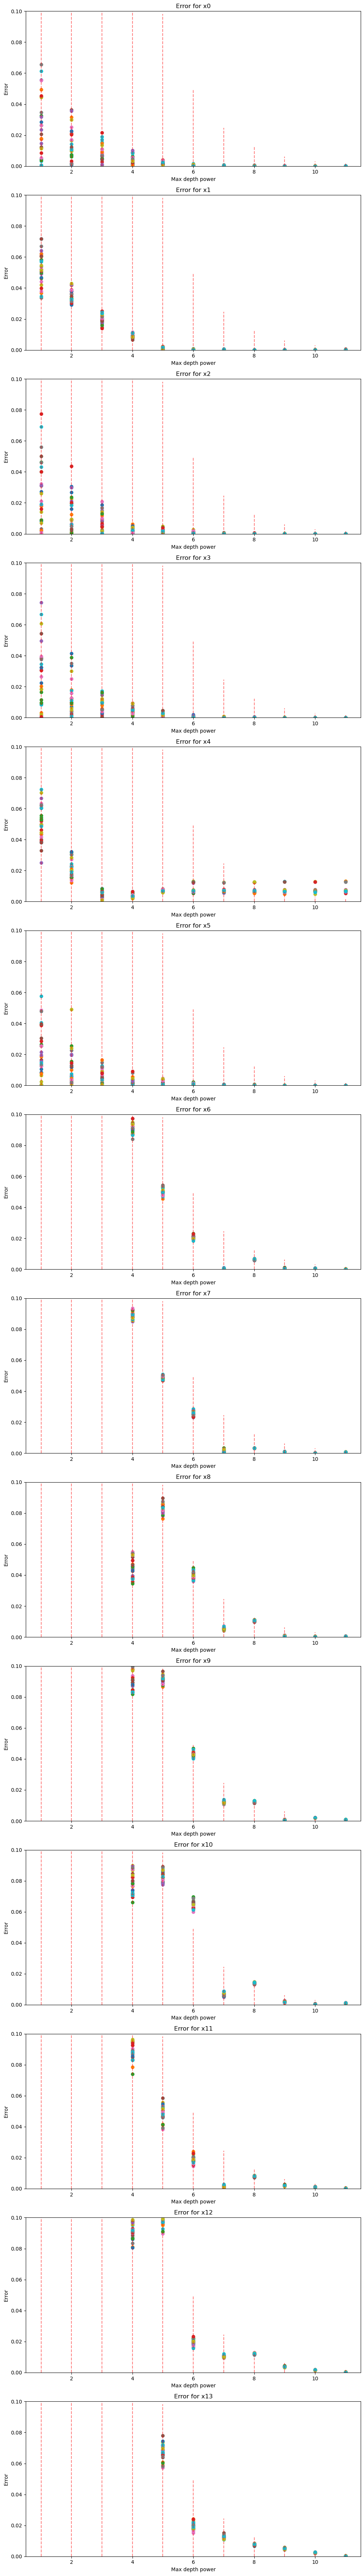

In [827]:
plot_many_estimate_error_scaling(x, xhat_vecs, max_depth_powers)